<a href="https://colab.research.google.com/github/MonaliM5/rossmann_retail_sales_prediction/blob/main/Rossmann_Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Rossmann Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Student Name**    - Monali Vijay Mhaske

# **Project Summary -**

* Rossmann is a large European drugstore chain operating over 3,000 stores across several countries. The company faces a key business challenge — accurately forecasting daily sales for each store. Reliable sales forecasts are crucial for effective inventory planning, workforce scheduling, and promotional strategy.

* This project aims to predict the daily sales of Rossmann stores using historical sales data combined with store-specific information such as promotions, holidays, competition, and assortment types. By developing a predictive model, Rossmann management can make data-driven decisions to optimize operations and improve profitability.

* The project will follow a structured data science life-cycle, which includes:

  1. Data Understanding - Exploring the historical sales and store datasets to identify patterns, data types, and business drivers.


  2. Data Wrangling & Cleaning - Handling missing values, correcting inconsistencies, encoding categorical variables, and preparing data for analysis.


  3. Exploratory Data Analysis (EDA) - Performing univariate, bivariate, and multivariate analysis to uncover relationships between features such as promotions, holidays, and sales trends.


  4. Feature Engineering - Creating new features like competition duration, promo activity flags, and temporal variables (month, week, weekday) to enhance model performance.


  5. Model Development & Evaluation - Building regression-based machine learning models (e.g., Linear Regression, Random Forest, XGBoost) to predict sales. Model performance will be evaluated primarily using Root Mean Squared Logarithmic Error (RMSLE), a suitable metric for skewed sales data.


  6. Model Interpretation & Business Insights - Interpreting the model results to generate actionable insights, such as how promotions or competition impact sales, and providing recommendations to management.



* The expected outcome of this project is a robust, data-driven forecasting model that can accurately estimate future store sales and highlight key factors influencing them. This will help Rossmann:

    * Ensure better inventory and staff management,

    * Improve promotion planning and marketing effectiveness, and

    * Ultimately increase overall profitability.

# **GitHub Link -**

https://github.com/MonaliM5/rossmann_retail_sales_prediction

# **Problem Statement**


* In the retail industry, accurate sales forecasting is critical for effective decision-making. Retailers like Rossmann, one of Europe's largest drugstore chains, must regularly decide how much stock to order, how to schedule employees, and how to plan promotional campaigns - all of which depend heavily on anticipated sales.

* However, predicting store-level daily sales is challenging because it is influenced by multiple dynamic factors such as store location, promotions, holidays, competition, and seasonality. An incorrect forecast can lead to overstocking or understocking, resulting in financial losses and poor customer experience.

* The primary objective of this project is to develop a predictive model capable of accurately estimating daily sales for each Rossmann store using historical sales and store information. The model should capture the impact of various external and internal factors - including promotions, holidays, competition distance, assortment type, and time-related variables - on store performance.

* The predictive insights from this project will enable Rossmann's management to:

  * Optimize inventory and staffing levels,

  * Plan promotional activities more effectively,

  * Improve supply chain efficiency, and

  * Enhance overall business profitability.


* The project will apply systematic data analysis and machine learning techniques to derive actionable insights that directly support Rossmann's strategic and operational decisions.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [97]:
# Import Libraries

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Datetime
from datetime import datetime


# Machine learning and preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# System and warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')

### Dataset Loading

In [98]:
# Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
# Load Dataset
Sales_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module 6 - Machine Learning/Chapt 1.5 - Capstone Project Regression/Rossmann Stores Data.csv", parse_dates=['Date'])
Store_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module 6 - Machine Learning/Chapt 1.5 - Capstone Project Regression/store.csv")

### Dataset First View

In [100]:
# Sales Dataset First Look
print("Sales Data First View ")
Sales_df.head()

Sales Data First View 


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [101]:
# Store Dataset First Look
print("Store Data First View ")
Store_df.head()

Store Data First View 


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [102]:
# Dataset Rows & Columns count
print(f"Sales Dataset -\n Rows Count : {Sales_df.shape[0]}  \tColumns Count : {Sales_df.shape[1]}")
print(f"Store Dataset -\n Rows Count : {Store_df.shape[0]}  \tColumns Count : {Store_df.shape[1]}")

Sales Dataset -
 Rows Count : 1017209  	Columns Count : 9
Store Dataset -
 Rows Count : 1115  	Columns Count : 10


### Dataset Information

In [103]:
# Dataset Information

# Sales dataset info
print("Sales Data Information:")
Sales_df.info()
print("\n" + "="*60 + "\n")

# Store dataset info
print("Store Data Information:")
Store_df.info()

Sales Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


Store Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------           

#### Duplicate Values

In [104]:
# Dataset Duplicate Value Count

# Sales dataset duplicates
print(f"Sales Dataset → Duplicate rows: {Sales_df.duplicated().sum()}")

if Sales_df.duplicated().sum() > 0:
    print("\nSample duplicate rows from Sales_df:")
    display(Sales_df[Sales_df.duplicated()].head())

print("\n" + "-"*60 + "\n")

# Store dataset duplicates
print(f"Store Dataset → Duplicate rows: {Store_df.duplicated().sum()}")

if Store_df.duplicated().sum() > 0:
    print("\nSample duplicate rows from Store_df:")
    display(Store_df[Store_df.duplicated()].head())

Sales Dataset → Duplicate rows: 0

------------------------------------------------------------

Store Dataset → Duplicate rows: 0


#### Missing Values/Null Values

In [105]:
# Missing Values/Null Values Count

# Sales dataset nulls
print("Sales Dataset - Missing Values:\n")
print(Sales_df.isnull().sum())
print("\n" + "-"*60 + "\n")

# Store dataset nulls
print("Store Dataset - Missing Values:\n")
print(Store_df.isnull().sum())

Sales Dataset - Missing Values:

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

------------------------------------------------------------

Store Dataset - Missing Values:

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


Sales Dataset - Missing Values Visualization:



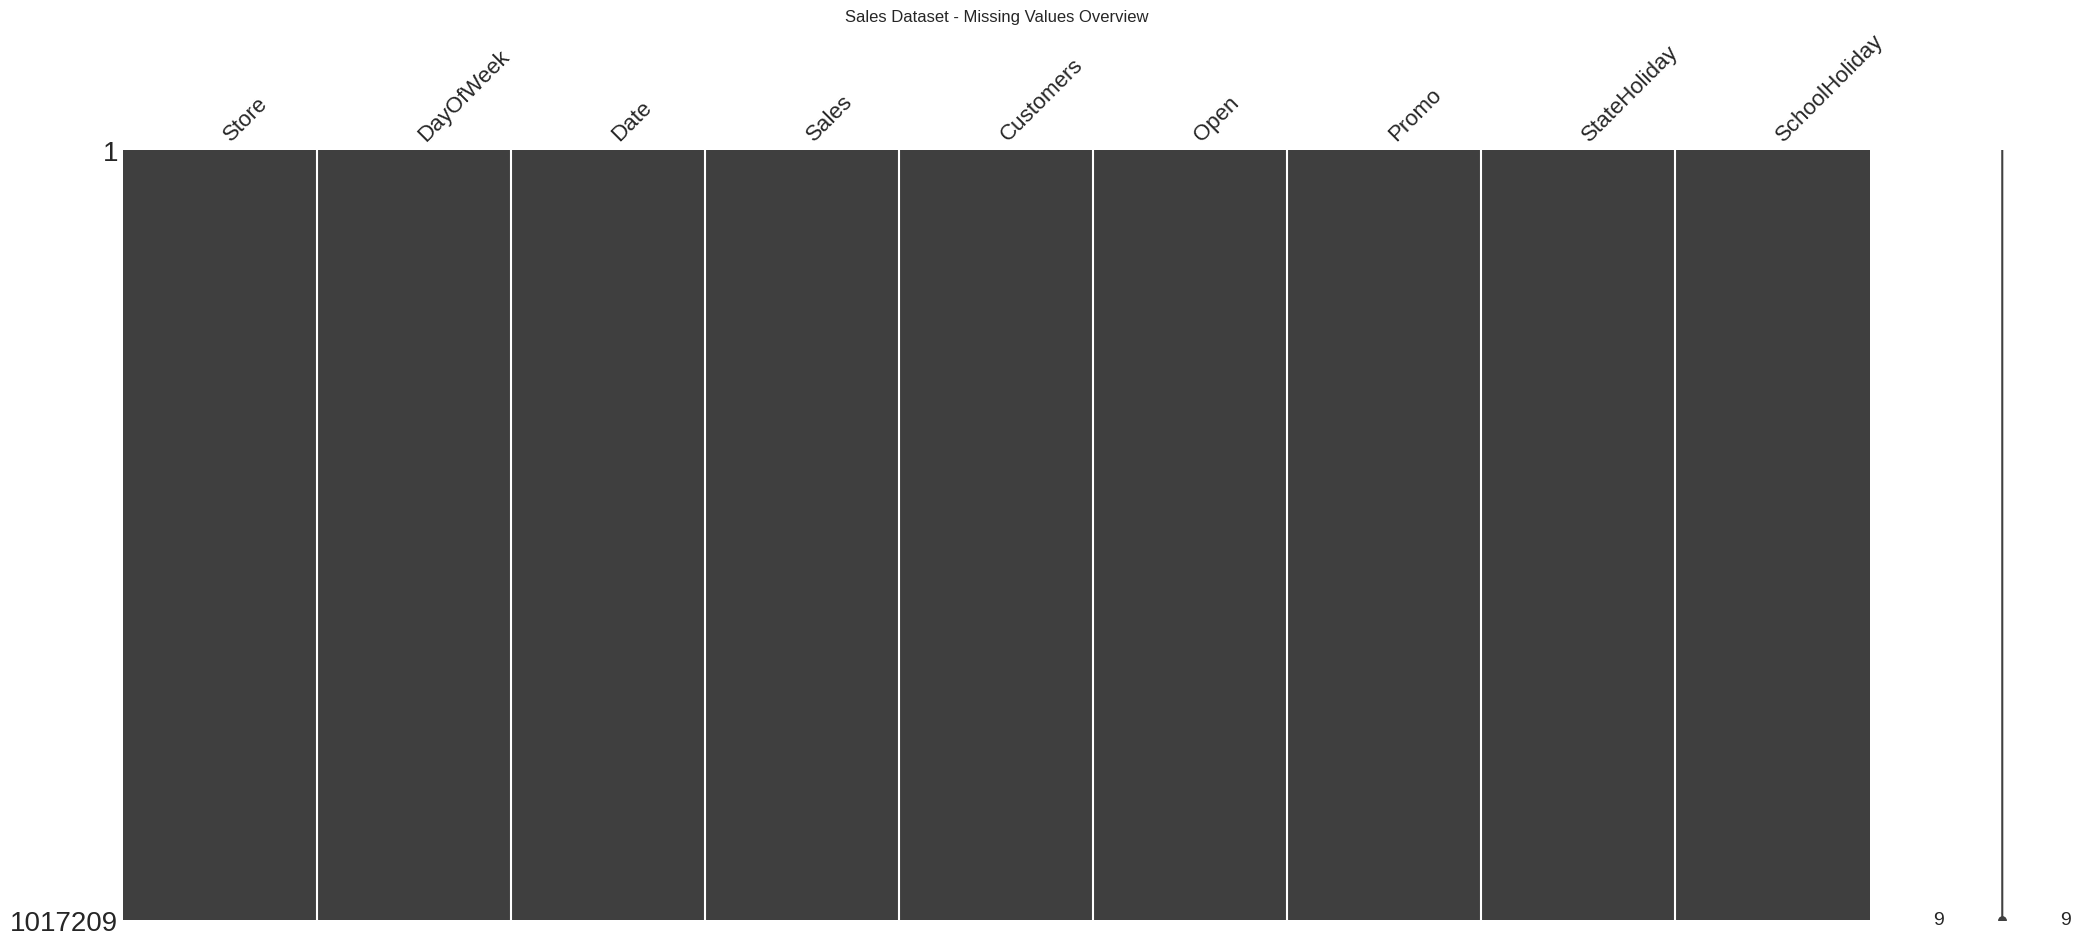

Store Dataset - Missing Values Visualization:



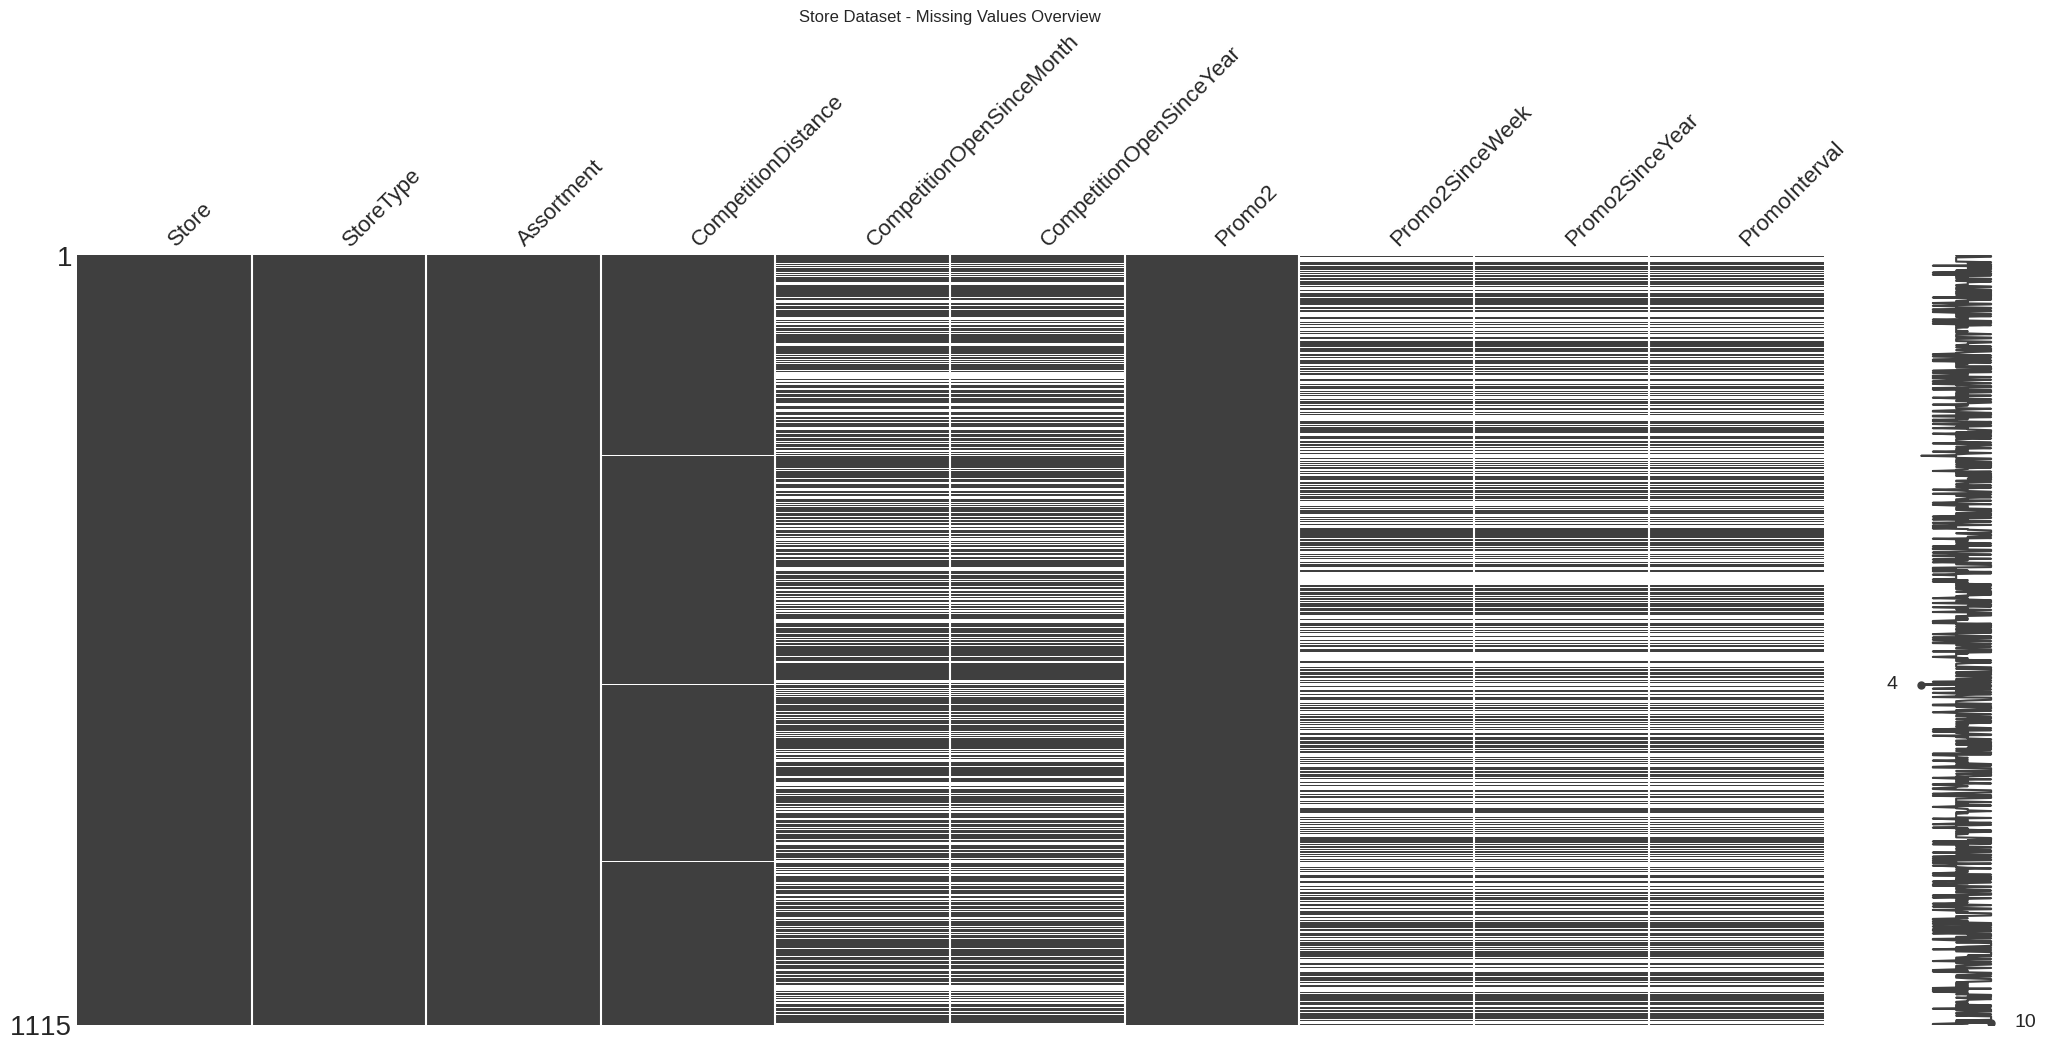

In [106]:
# Visualizing the missing values

import missingno as msno

# Set up plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Sales dataset missing values visualization
print("Sales Dataset - Missing Values Visualization:\n")
msno.matrix(Sales_df)
plt.title("Sales Dataset - Missing Values Overview")
plt.show()

# Store dataset missing values visualization
print("Store Dataset - Missing Values Visualization:\n")
msno.matrix(Store_df)
plt.title("Store Dataset - Missing Values Overview")
plt.show()

### What did you know about your dataset?

* The Rossmann dataset consists of two main files - Sales data and Store data - that together provide a comprehensive view of the company's retail operations.

1. Sales Data (Sales_df)

    * This dataset contains daily sales records for each Rossmann store.

    * Each record includes store ID, sales amount, number of customers, whether the store was open, ongoing promotions, state and school holidays, and the corresponding date.

    * These variables help capture short-term and seasonal trends, customer behavior, and the influence of holidays or promotions on sales.



2. Store Data (Store_df)

    * This dataset provides static information about each store, such as store type, assortment level, distance to the nearest competitor, duration since the nearest competition opened, and promotional program details (e.g., whether the store runs continuous promotions).

    * These variables explain store-level differences that affect long-term sales patterns.



* By combining these two datasets, we obtain both temporal (daily) and structural (store-level) information. This enables a deeper understanding of how different factors — such as competition, promotions, holidays, and assortment — influence store performance.
Such insights form the foundation for building a reliable predictive model to forecast future sales.

## ***2. Understanding Your Variables***

In [107]:
# Dataset Columns

# Printing list of columns in Sales Dataset
print("Columns in Sales Dataset:\n")
print(Sales_df.columns.tolist())

print("\n" + "-"*60 + "\n")

#Printing list of columns in Store Dataset
print("Columns in Store Dataset:\n")
print(Store_df.columns.tolist())

Columns in Sales Dataset:

['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']

------------------------------------------------------------

Columns in Store Dataset:

['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [108]:
# Dataset Describe

# Describing the Sales Dataset
print(" Sales Data Description : \n")
display(Sales_df.describe())

print("\n" + "-"*60 + "\n")

# Describing the Store Dataset
print(" Store Data Description :\n ")
display(Store_df.describe())

 Sales Data Description : 



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,2014-04-11 01:30:42.846061824,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
min,1.000000e+00,1.000000e+00,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,2013-08-17 00:00:00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,2014-04-02 00:00:00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,2014-12-12 00:00:00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,2015-07-31 00:00:00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01



------------------------------------------------------------

 Store Data Description :
 


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description

📘 Sales Dataset (Sales_df) :


|Variable|Description|
|---|---|
|Store|Unique identifier for each store.|
|DayOfWeek|  Day of the week (1 = Monday, 7 = Sunday).|
|Date| Date of the record.|
|Sales|	Total sales made on that day — this is the target variable.|
|Customers|	Number of customers who visited the store on that day.|
|Open|	Indicates whether the store was open (1) or closed (0).|
|Promo|	Indicates if a promotion was running on that day (1 = Yes, 0 = No).|
|StateHoliday|	Denotes whether the day was a state/national/public holiday.|
|SchoolHoliday|	Indicates if the store was affected by public-school closures.|



---

🏪 Store Dataset (Store_df)

|Variable	|Description|
|---|---|
|Store|	Unique identifier for each store (key to merge with Sales_df).|
|StoreType|	Type of store (a, b, c, d) — represents different business formats.|
|Assortment|	Level of product assortment (a = basic, b = extra, c = extended).|
|CompetitionDistance|	Distance to the nearest competitor (in meters).|
|CompetitionOpenSinceMonth|	Month when the nearest competitor opened.|
|CompetitionOpenSinceYear|	Year when the nearest competitor opened.|
|Promo2|	Indicates whether the store participates in a continuing promotion (1 = Yes, 0 = No).|
|Promo2SinceWeek|	Week when the store began participating in Promo2.|
|Promo2SinceYear|	Year when the store began participating in Promo2.|
|PromoInterval|	Months when Promo2 is active (e.g., Jan, Apr, Jul, Oct).|



---

💡 Insights

* Sales_df provides time-based transactional information.

* Store_df adds store-level context such as competition and promotions.

* Together, these datasets form a powerful base to analyze sales drivers and build a predictive regression model for accurate forecasting.

### Check Unique Values for each variable.

In [109]:
# Check Unique Values for each variable.

# Fetching and printing number of unique values in each column of Sales Dataset.
print("Unique values in Sales Dataset : \n")
for col in Sales_df.columns :
  unique_count = Sales_df[col].nunique()
  # Fetched total number of unique values
  print(f"{col} : {unique_count} unique values")
  print(Sales_df[col].unique())
  # Printing all those unique values of each column
  print("\n")

print("\n" + "-"*60 + "\n")

# Fetching and printing number of unique values in each column of Store Dataset.
print("Unique values in Store Dataset : \n")

for col in Store_df.columns :
  unique_count = Store_df[col].nunique()
  # Fetched total number of unique values.

  print(f"{col} : {unique_count} unique values")
  print(Store_df[col].unique())
  # Printing all those unique values of each column

  print("\n")

Unique values in Sales Dataset : 

Store : 1115 unique values
[   1    2    3 ... 1113 1114 1115]


DayOfWeek : 7 unique values
[5 4 3 2 1 7 6]


Date : 942 unique values
<DatetimeArray>
['2015-07-31 00:00:00', '2015-07-30 00:00:00', '2015-07-29 00:00:00',
 '2015-07-28 00:00:00', '2015-07-27 00:00:00', '2015-07-26 00:00:00',
 '2015-07-25 00:00:00', '2015-07-24 00:00:00', '2015-07-23 00:00:00',
 '2015-07-22 00:00:00',
 ...
 '2013-01-10 00:00:00', '2013-01-09 00:00:00', '2013-01-08 00:00:00',
 '2013-01-07 00:00:00', '2013-01-06 00:00:00', '2013-01-05 00:00:00',
 '2013-01-04 00:00:00', '2013-01-03 00:00:00', '2013-01-02 00:00:00',
 '2013-01-01 00:00:00']
Length: 942, dtype: datetime64[ns]


Sales : 21734 unique values
[ 5263  6064  8314 ...   660 17815 23303]


Customers : 4086 unique values
[ 555  625  821 ... 3900   36 4065]


Open : 2 unique values
[1 0]


Promo : 2 unique values
[1 0]


StateHoliday : 5 unique values
['0' 'a' 'b' 'c' 0]


SchoolHoliday : 2 unique values
[1 0]



-----

## ***3. Data Wrangling***

### Data Wrangling Code

In [110]:
# Write your code to make your dataset analysis ready.

# -----------------------------
# STEP 1: MERGING BOTH DATASETS
# -----------------------------
# 📌 Copying data to preserve raw versions
sales_df = Sales_df.copy()
store_df = Store_df.copy()

# 🧩 Merging both datasets using 'Store' as the key
df = pd.merge(sales_df, store_df, on = "Store", how = "left")


#==============================================================================================#


# -----------------------------
# STEP 2 : Handle unrealistic values
# ----------------------------
# 🧠 Replacing invalid competition years (before 1970) with NaN
df.loc[df['CompetitionOpenSinceYear'] < 1970, 'CompetitionOpenSinceYear'] = np.nan

# 🏫 Handling holidays and store info columns
df['SchoolHoliday'] = df['SchoolHoliday'].astype(int)


#==============================================================================================#



# -----------------------------
# STEP 3: Missing-value indicator flags
# -----------------------------
# 🚩 Creating missing-value indicator flags to identify records with null values after imputing for the same.
df['CompetitionDistance_NA'] = df['CompetitionDistance'].isna().astype(int)
df['CompetitionOpenSince_NA'] = df[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']].isna().any(axis=1).astype(int)
df['Promo2Since_NA'] = df[['Promo2SinceWeek', 'Promo2SinceYear']].isna().any(axis=1).astype(int)


#==============================================================================================#


# -----------------------------
# STEP 4 : Handle missing values
# -----------------------------
# 🎯 Handling promotion-related columns
df['Promo2SinceWeek'].fillna(0, inplace=True)
df['Promo2SinceYear'].fillna(0, inplace=True)
df['PromoInterval'].fillna('None', inplace=True)

# 🧹 Handling missing values for 'CompetitionDistance'
df['CompetitionDistance'] = df['CompetitionDistance'].fillna(df['CompetitionDistance'].median())

# 🧩 Handling missing values for competition opening details
df['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
df['CompetitionOpenSinceYear'].fillna(0, inplace=True)



#==============================================================================================#


# -----------------------------
# STEP 5 : Feature extraction from date
# -----------------------------
# 🕒 Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# 📆 Extracting useful time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month



#==============================================================================================#


# -----------------------------
# STEP 6 : Competition open duration
# -----------------------------
# 🕓 Creating 'CompetitionOpenMonths' — duration of competition presence
df['CompetitionOpenMonths'] = np.where(
    df['CompetitionOpenSince_NA'],
    0,  # Set to 0 if missing
    ((df['Year'] - df['CompetitionOpenSinceYear']) * 12 +
     (df['Month'] - df['CompetitionOpenSinceMonth']))
)

# Replacing negative values (for stores opened later) with 0
df['CompetitionOpenMonths'] = df['CompetitionOpenMonths'].apply(lambda x: x if x > 0 else 0)



#==============================================================================================#



# -----------------------------
# STEP 7 : Fixing data type issues
# -----------------------------
df['StateHoliday'] = df['StateHoliday'].astype(str).replace({'0': 'None'})
df['StoreType'] = df['StoreType'].astype('category')
df['Assortment'] = df['Assortment'].astype('category')
df['PromoInterval'] = df['PromoInterval'].astype('category')


#==============================================================================================#


# -----------------------------
# STEP 8 : Promo2 active (vectorized)
# -----------------------------
# 🧠 Creating 'IsPromo2Active' — checks if store's long-term promo is active
month_map = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6,
             'Jul':7, 'Aug':8, 'Sept':9, 'Oct':10, 'Nov':11, 'Dec':12}

# Convert to string before applying function to avoid 'unhashable list' error
df['PromoMonths'] = df['PromoInterval'].astype(str).apply(
    lambda x: [month_map[m] for m in x.split(',')] if x != 'None' else []
)


df['IsPromo2Active'] = df.apply(
    lambda row: 1 if (row['Promo2'] == 1) and
                     (row['Month'] in row['PromoMonths']) and
                     (row['Year'] > row['Promo2SinceYear']) else 0, axis=1)



#==============================================================================================#



# -----------------------------
# STEP 9 : Business logic flags
# -----------------------------
# 💰 Creating 'SalesPerCustomer' — derived metric for customer efficiency
df['SalesPerCustomer'] = np.where(df['Customers'] > 0, df['Sales'] / df['Customers'], 0)

# 💰 Creating ZeroSalesWhileOpen to check anoamlies or Unproductive Day.
df['ZeroSalesWhileOpen'] = ((df['Sales'] == 0) & (df['Open'] == 1)).astype(int)



#==============================================================================================#



# -----------------------------
# STEP 10 : Handle outliers
# -----------------------------
# Cap competition distance at 99th percentile
cap_value = df['CompetitionDistance'].quantile(0.99)
df.loc[df['CompetitionDistance'] > cap_value, 'CompetitionDistance'] = cap_value



#==============================================================================================#



# -----------------------------
# STEP 11 : Final formatting
# -----------------------------
# 🚫 Dropping redundant and unnecessary columns
df.drop(columns=[
    'Promo2SinceYear',    # Used only for IsPromo2Active
    'PromoMonths',       # Temporary calculation column
    ], inplace=True)


# 🧾 Reordering columns for better readability
df = df[['Store', 'Date', 'Year', 'Month', 'DayOfWeek', 'Open', 'Promo', 'Promo2', 'IsPromo2Active',
         'Sales', 'Customers', 'SalesPerCustomer','ZeroSalesWhileOpen', 'StateHoliday', 'SchoolHoliday',
         'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionDistance_NA',
         'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'CompetitionOpenSince_NA',
         'CompetitionOpenMonths', 'Promo2SinceWeek', 'Promo2Since_NA', 'PromoInterval']]


# Reset index and sort
df.sort_values(['Store', 'Date'], inplace=True)
df.reset_index(drop=True, inplace=True)


# ✅ Displaying final info
print("✅ Data Wrangling Completed Successfully!")
print(f"Final Dataset Shape: {df.shape}")
print("\nMissing Values After Wrangling:")
print(df.isnull().sum()[df.isnull().sum() > 0])
display(df.head(3))

✅ Data Wrangling Completed Successfully!
Final Dataset Shape: (1017209, 26)

Missing Values After Wrangling:
Series([], dtype: int64)


,Store,Date,Year,Month,DayOfWeek,Open,Promo,Promo2,IsPromo2Active,Sales,Customers,SalesPerCustomer,ZeroSalesWhileOpen,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionDistance_NA,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,CompetitionOpenSince_NA,CompetitionOpenMonths,Promo2SinceWeek,Promo2Since_NA,PromoInterval
0,1,2013-01-01,2013,1,2,0,0,0,0,0,0,0.000000,0,a,1,c,a,1270.0,0,9.0,2008.0,0,52.0,0.0,1,None
1,1,2013-01-02,2013,1,3,1,0,0,0,5530,668,8.278443,0,None,1,c,a,1270.0,0,9.0,2008.0,0,52.0,0.0,1,None
2,1,2013-01-03,2013,1,4,1,0,0,0,4327,578,7.486159,0,None,1,c,a,1270.0,0,9.0,2008.0,0,52.0,0.0,1,None


### What all manipulations have you done and insights you found?

* During the data wrangling phase, multiple preprocessing and feature-engineering steps were performed to clean, correct, and enhance the dataset — making it ready for meaningful analysis and modeling.

* The manipulations focused on merging data, handling missing values, correcting data types, creating new features, and ensuring data consistency and reliability.


---

🔧 Manipulations Performed

1️⃣ Merging Datasets

* The two datasets — Sales_df (daily sales data) and Store_df (store information) — were merged on the common key Store.

* This merge allowed each sales record to include corresponding store-level details such as store type, assortment, and competition data.



---

2️⃣ Handling Unrealistic and Missing Values

* Unrealistic competition years (before 1975) were replaced with NaN to maintain data validity.

* Missing values in important fields like CompetitionDistance, CompetitionOpenSinceMonth/Year, and Promo2SinceWeek/Year were handled logically using median or zero imputation where applicable.

* Additional missing-value indicator columns (CompetitionDistance_NA, CompetitionOpenSince_NA, Promo2Since_NA) were created to capture the information about missingness — since even the absence of data can be predictive.



---

3️⃣ Data Type Corrections

* Columns such as StoreType, Assortment, and PromoInterval were converted to categorical data types to improve memory efficiency and interpretability.

* The StateHoliday column was kept as a categorical feature to allow one-hot encoding later during the modeling phase.



---

4️⃣ Feature Extraction from Date

* The Date column was transformed into datetime format, and new temporal features were extracted:
Year, Month, and DayOfWeek.

* These features will help identify seasonal trends, monthly variations, and weekday vs. weekend effects on sales.



---

5️⃣ Feature Engineering

* CompetitionOpenMonths → Calculated the number of months since a competitor store opened, set to 0 for missing or invalid entries.

* IsPromo2Active → A binary flag indicating if a store’s long-term promotion (Promo2) was active during the specific month, based on PromoInterval, Promo2SinceWeek, and Promo2SinceYear.

* SalesPerCustomer → Derived metric showing average customer spending, helping evaluate store-level performance efficiency.

* ZeroSalesWhileOpen → Business rule flag identifying anomalies where sales were 0 despite the store being open.



---

6️⃣ Outlier Treatment

* Extreme values in CompetitionDistance were capped at the 99th percentile to minimize the influence of outliers and maintain stable model behavior.



---

7️⃣ Sorting, Indexing, and Final Formatting

* The dataset was sorted by Store and Date to maintain chronological order.

* Redundant columns like Promo2SinceYear and intermediate helper variables were dropped for clarity.

* Index was reset to ensure a clean, analysis-ready DataFrame.




---

💡 Insights Found After Data Wrangling -

1. Several stores had missing competition details, implying that either the data was unavailable or competition was absent in that region.


2. Some stores have long-standing competitors, indicating that mature markets may exhibit more stable sales.


3. The number of active promotions (Promo2) varies by month, revealing seasonal marketing patterns.


4. Records with zero sales while open highlight potentially unproductive days or data inconsistencies that warrant deeper business review.


5. The derived feature SalesPerCustomer exposed variation in average customer spending — potentially linked to store type, assortment, or location.




---

✅ Outcome -

* The dataset is now clean, consistent, and analysis-ready.

* All missing values have been addressed, data types standardized, and new business-relevant features engineered.

* Outliers were treated effectively, ensuring that the data provides a solid foundation for Exploratory Data Analysis (EDA) and predictive modeling.



---

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Univariate Analysis**

#### Chart 1 - Distribution of Daily Sales

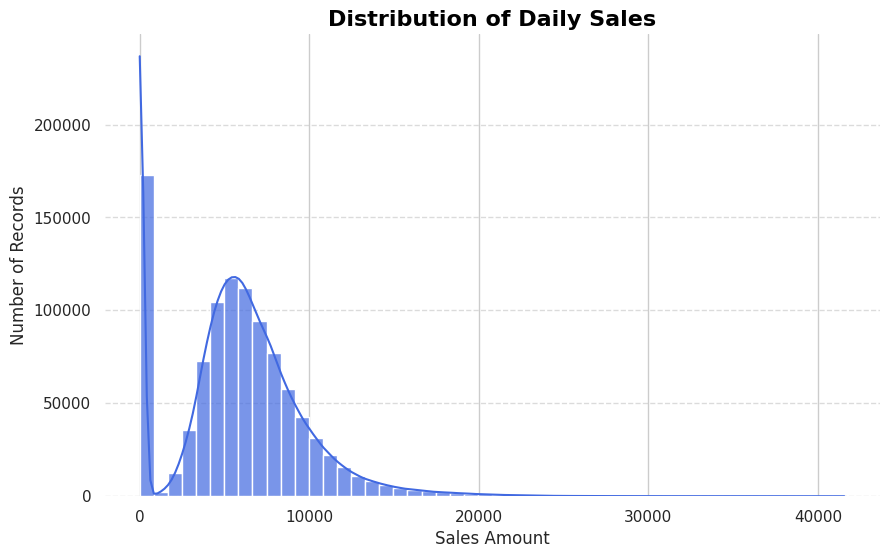

In [111]:
# Chart - 1 visualization code

# Features Used - Sales

# ✅ Why this chart is important to include ?
# The entire project aims to predict daily Sales - it’s the dependent variable.
# Before building any model, we must understand how this variable behaves.
# Without this chart, we wouldn’t know if the data is balanced, skewed, or has extreme outliers.

#----------------------------------------------------------------------------------------------------------#

# Setting plot style for cleaner aesthetics
sns.set(style='whitegrid')


# Creating the figure
plt.figure(figsize=(10,6))

# Plotting histogram with KDE curve for smooth density visualization
sns.histplot(
    data=df,
    x='Sales',
    bins=50,                 # Number of bars
    kde=True,                # Add smooth density curve
    color='royalblue',       # Chart color
    alpha=0.7                # Transparency
)

# Adding titles and labels
plt.title('Distribution of Daily Sales', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Sales Amount', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)

# Customizing gridlines and frame
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.box(False)  # Removes top and right border for a cleaner look

# Displaying the plot
plt.show()

**Summary -**

1,017,209 records

17% zero sales (closed or failed days).

Mean ≈ 5,774

Median ≈ 5,744 → nearly balanced.

Right skew (0.64) and a few high-sale outliers (up to 41,551).

Suggests mostly steady performance with isolated extreme highs.

##### 1. Why did you pick the specific chart?

* I have used a histogram with a KDE curve to observe how daily sales are distributed across all stores.

* This chart helps me identify the shape of the distribution, including skewness, zero-sales days, and extreme high-sale days, which are important for cleaning, modeling, and understanding business trends.

##### 2. What is/are the insight(s) found from the chart?

* The histogram shows a moderate right-skewed distribution with most daily sales concentrated between 3,000 and 8,000.

* The mean and median are almost equal (Mean = 5,774, Median = 5,744), suggesting that the majority of stores have a consistent daily sales pattern.

* Around 17% of the records have Sales = 0, which occur mostly when stores are closed or during operational downtimes.

* There are a few extremely high values (above 17,000), showing occasional high-performing days due to major events or promotions.

* Overall, the pattern indicates that sales are mostly stable with occasional spikes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**Positive business impacts / what to do:**

 * Actionable signal :

      *  handle zeros carefully:

      * About 17% of records have zero sales.

      * Many are due to stores being closed (Open == 0), but a few are open with zero sales, which should be investigated.


 * Modeling improvements:

    * Because of moderate right skew and zeros, I should use log1p(Sales) or RMSLE during modeling to stabilize variance and reduce the impact of extreme values.


 * High-performing days:

    * I should identify top sales days (>10k) and analyze if they coincide with promotions or holidays so similar events can be replicated to boost sales in low periods.




---

**Negative-growth / risk signals & mitigation:**

 * Zero-sales while open:

    * If some stores show zero sales while open, this could point to system or operational issues, leading to missed revenue.

    * These cases need to be analyzed to avoid recurring negative growth.


 * Impact of extreme outliers:
    * A small number of very high-sale days could distort mean sales and model predictions.

    * I have to cap or treat these outliers to ensure fair comparison across stores.

#### Chart 2 - Distribution of Customers

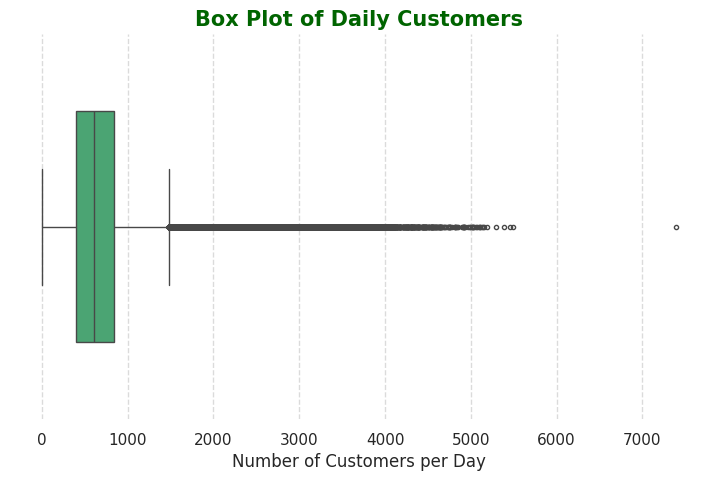

In [112]:
# Chart - 2 visualization code

# Features Used - Customers

# Why this chart is important to include ?
# The number of Customers visiting each store per day determines the overall sales potential.
# Analyzing its distribution helps us:
# Understand the footfall variation across stores and days.
# Detect outliers (extremely busy or empty days).
# Identify whether customer traffic is evenly spread or dominated by a few high-volume stores.
# This chart provides crucial insight into customer behavior trends, which can later help the company optimize
# store operations, marketing, and staffing.

#-----------------------------------------------------------------------------------------------------------------------------------#


# Setting the plot style for professional appearance
sns.set(style='whitegrid')

# Creating the figure and defining its size
plt.figure(figsize=(9,5))

# Plotting the box plot to analyze the distribution and outliers
sns.boxplot(
    data=df,
    x='Customers',          # Setting the variable to visualize
    color='mediumseagreen', # Choosing a calm, professional color
    width=0.6,              # Adjusting box width
    fliersize=3             # Adjusting outlier marker size
)

# Adding title and labels
plt.title('Box Plot of Daily Customers', fontsize=15, fontweight='bold', color='darkgreen')
plt.xlabel('Number of Customers per Day', fontsize=12)

# Customizing gridlines for cleaner presentation
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Removing unnecessary chart borders
plt.box(False)

# Displaying the plot
plt.show()

**Summary -**

Median ≈ 630  

Mean ≈ 695 → mild right skew.

IQR between 466 - 844 → consistent footfall range.

A few extreme outliers (>1,700) show very high-traffic days.

Mostly stable customer flow with minor anomalies that should be examined.

##### 1. Why did you pick the specific chart?

* I have used a boxplot because it helps me visualize the spread, median, and outliers in the number of customers visiting the stores each day.

* It clearly shows the central tendency (median) and the variation in footfall between stores, while also highlighting days or stores with unusually high or low customer counts.

##### 2. What is/are the insight(s) found from the chart?

* The median customer count is around 630, while the mean is slightly higher (~695), which shows a mild right skew — indicating that a few days have exceptionally high customer numbers.

* The interquartile range (IQR) lies between 466 and 844, meaning 50% of the records fall within this range.

* Some extreme outliers can be observed above 1,700 customers, showing rare but very high-traffic days (possibly due to promotions or holidays).

* The lower whisker shows very few days with near-zero customers — likely when the stores were closed.

* Overall, the distribution looks fairly consistent with limited variability across most records.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impacts / what to do:**

1. Workforce and resource planning:

    * Since the majority of days have 400-800 customers, I can plan staff schedules, stock replenishment, and customer service levels accordingly.


2. Opportunity analysis for high footfall days:

    * High outlier days (above 1,700 customers) can be analyzed to identify successful events, marketing campaigns, or external factors that drove higher traffic.

    * Learning from these patterns can help boost regular-day sales.


3. Predictable customer trends:

    * The compact box shape indicates a stable customer base, which is good for creating consistent marketing and forecasting models.





---


**Negative-growth / risk signals & mitigation:**

1. Low-customer stores:

    * Some stores have very low median customers, possibly due to poor location or lack of local promotion.

    * I should identify and support these stores with targeted offers or awareness drives.


2. Zero or near-zero customer days:

    * Even though few, these records should be checked for data entry issues or operational closures to prevent misinterpretation during analysis.


3. High outliers:

    * Very large spikes in customer count may distort statistical analysis.

    * I should consider capping or transforming these values during modeling to prevent bias.




---

#### Chart 3 - Violin Plot of Competition Distance

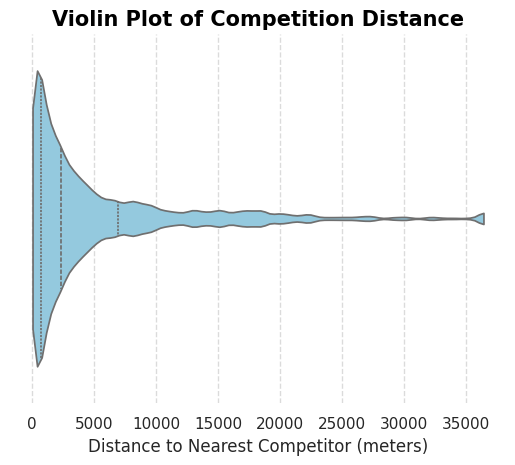

In [113]:
# Chart - 3 visualization code

# Features Used - CompetitionDistance

# ✅ Why this chart is important to include
# This visualization helps us understand how CompetitionDistance is distributed among all Rossmann stores.
# It reveals whether most stores face nearby competitors or if some operate in low-competition areas.
# Understanding this spread helps identify how market competition might influence overall sales and customer reach.


#-----------------------------------------------------------------------------------------------------------------------------#


# Plotting the violin plot to visualize the distribution shape and density
sns.violinplot(
    data=df,
    x='CompetitionDistance',   # Setting the variable to visualize
    color='skyblue',           # Choosing a light color for better readability
    inner='quartile',          # Showing quartiles inside the violin
    cut=0                      # Preventing density from extending beyond data range
)

# Adding title and labels
plt.title('Violin Plot of Competition Distance', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Distance to Nearest Competitor (meters)', fontsize=12)

# Customizing gridlines and chart borders
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.box(False)

# Displaying the plot
plt.show()

**Summary -**

Distribution is heavily right-skewed, most competitors within 2 km.

Median ≈ 1,000 m, upper tail capped at ≈7,400 m.

Few stores are isolated — potential expansion or benchmarking opportunities.

High-competition zones should apply targeted promotions to avoid negative growth.


##### 1. Why did you pick the specific chart?

* I have used a violin plot because it helps me visualize both the distribution shape and density of the competition distance.

* Unlike a boxplot, the violin plot gives me a clear idea of how the values are concentrated — for example, whether most stores are close to competitors or located farther away.

* This visualization also makes it easy to identify if the distances are skewed or have multiple peaks.

##### 2. What is/are the insight(s) found from the chart?

* The plot shows a heavily right-skewed distribution, meaning that most stores are located very close to their nearest competitors, while a smaller number of stores are located much farther away.

* The major concentration of competition distance lies below 2,000 meters, showing that many stores have competitors within a short distance.

* The median competition distance is around 1,000 meters, and the IQR (50% of the data) lies approximately between 700-2,500 meters.

* The upper tail extends toward 7,400 meters (after capping at the 99th percentile), indicating a few stores are isolated from competition.

* The density curve is narrow near zero and gradually thins out, confirming that most stores are in competitive zones.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impacts / what to do:**

 * Strategic advantage for nearby competition:

    * Since most stores have competitors nearby, I can analyze whether close-proximity competition correlates with higher or lower sales.

    * This insight can guide store placement strategies — for instance, whether clustering stores drives demand or cannibalizes sales.


 * Market gap identification:

    * The few stores with very high competition distance (>7 km) indicate less saturated regions.

    * These areas can be studied to understand if they maintain steady sales despite limited competition — such zones might represent opportunities for new stores.


 * Targeted promotions:

    * Stores with close competition might benefit from localized promotions and loyalty programs to retain customers in high-competition areas.

---

**Negative-growth / risk signals & mitigation:**

 * High competition density risk:

    * Stores located within < 500 meters of competitors may face price pressure and customer switching, which could lead to declining margins.

    * These stores should be monitored and possibly offered exclusive deals or distinct assortments to stay competitive.


 * Uneven competition landscape:

    * Since the distribution is highly skewed, modeling might overemphasize isolated stores.

    * I should scale or transform this variable (e.g., log transform) to normalize its effect and avoid bias in the model.

#### Chart 4 - Count Plot of Promotion Activity

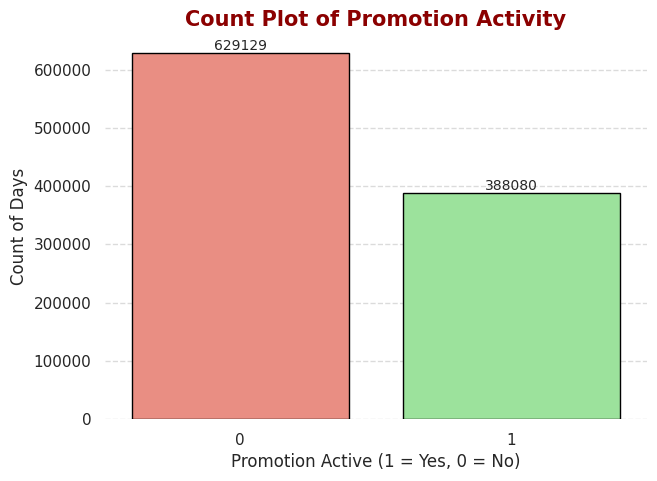

In [114]:
# Chart - 4 visualization code

# Features used :- Promo

# ✅ Why this chart is important to include ?
# Promotions have a direct and measurable impact on sales — they drive customer traffic, influence purchasing behavior,
# and affect store profitability.
# By visualizing how frequently promotions occur, we can:
#     * Understand how often Rossmann runs promotions.
#     * Check for data balance (too few or too many promo days).
#     * Prepare for later bivariate analysis, where we’ll compare promotions with sales performance.
#     * This chart helps lay the groundwork for analyzing how promotional frequency affects sales trends.



#------------------------------------------------------------------------------------------------------------------------------------#

# Creating the figure and defining its size
plt.figure(figsize=(7,5))

# Plotting the count plot to show number of promo vs non-promo days
sns.countplot(
    data=df,
    x='Promo',                 # Selecting the 'Promo' variable
    palette=['salmon', 'lightgreen'],  # Choosing contrasting colors for clarity
    edgecolor='black'          # Adding borders to bars for visual definition
)

# Adding value annotations above bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Adding title and axis labels
plt.title('Count Plot of Promotion Activity', fontsize=15, fontweight='bold', color='darkred')
plt.xlabel('Promotion Active (1 = Yes, 0 = No)', fontsize=12)
plt.ylabel('Count of Days', fontsize=12)

# Customizing grid and borders
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.box(False)

# Displaying the plot
plt.show()

**Sumary -**


About 37% of days had an active promotion.


Non-promo days (63%) dominate but still leave enough promo variety for analysis.


Promotions appear well-balanced — neither rare nor overused.


Insights from this will help optimize promotion frequency and timing.


##### 1. Why did you pick the specific chart?

* I have used a count plot because Promo is a binary categorical variable that represents whether a short-term promotion was active (1) or not (0) on a given day.

* A count plot helps me clearly visualize how frequently promotions were running compared to non-promo days.

* It also gives me an idea of whether the dataset is balanced or imbalanced, which is important for further analysis and modeling.

##### 2. What is/are the insight(s) found from the chart?

* The chart shows that the number of days with no promotion (Promo = 0) is significantly higher than days with an active promotion (Promo = 1).

* Approximately 63% of the records belong to non-promo days, while only 37% are promo-active days.

* This indicates that promotions are not always running — they are scheduled strategically during certain periods.

* The presence of a decent proportion of promo-active days ensures that there is enough variability in data to study the impact of promotions on sales.

* This balance also suggests that stores frequently rely on promotions as a sales strategy but not excessively.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impacts / what to do:**

 * Promotion planning efficiency:

    * Since promotions are active on about one-third of the days, I can analyze whether those days lead to significant sales lifts in bivariate analysis.

    * This helps me understand the effectiveness of promotional campaigns and fine-tune their duration and timing.


 * Balanced data for modeling:

    * Having both promo and non-promo days well represented will make my models learn the true promotional impact effectively.


 * Customer engagement strategy:

    * Frequent but not continuous promotions suggest a planned approach to maintaining customer interest while avoiding “promotion fatigue.”




---

**Negative-growth / risk signals & mitigation:**

 * Limited promo days:

    * Some stores might be underusing promotions. If they are located in competitive regions, fewer promo days could result in lost sales opportunities.

    * I can cross-check such stores with low sales to identify if more promotional support is needed.


 * Dependence on promotions:

    * If future analysis shows that sales drop sharply when promotions are inactive, it may mean the store has become too dependent on discounts, which can hurt long-term profit margins.

    * The business should ensure promotions are combined with loyalty strategies rather than price cuts alone.


#### Chart 5 - Pie Chart of Store Type Distribution

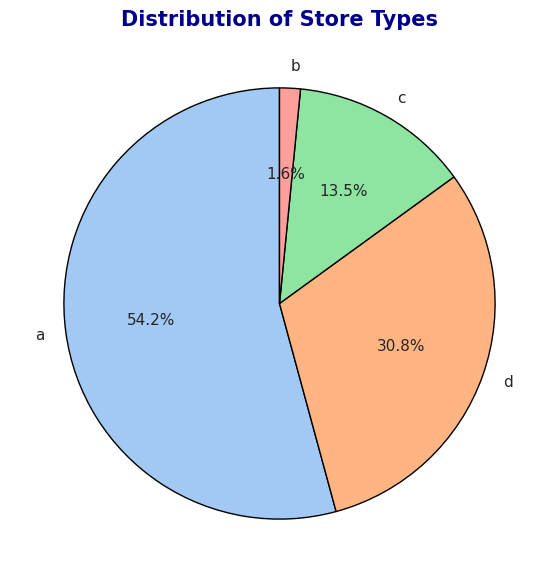

In [115]:
# Chart - 5 visualization code

# Features used - StoreType

# ✅ Why this chart is important to include
# Different store types cater to different customer segments and have varying sales capacities.
# Visualizing the proportion of store types helps us:
#     Understand Rossmann’s store structure and market distribution.
#     Identify which store type dominates the business.
#     Prepare for later analyses (e.g., which store type drives the most sales).
# This chart provides a strategic overview of Rossmann's retail landscape.


#--------------------------------------------------------------------------------------------------------#


# Setting color palette for professional appearance
colors = sns.color_palette('pastel')

# Creating the figure and defining its size
plt.figure(figsize=(7,7))

# Calculating the count of each store type
store_counts = df['StoreType'].value_counts()

# Plotting the pie chart
plt.pie(
    store_counts,
    labels=store_counts.index,             # Adding store type labels
    autopct='%1.1f%%',                     # Displaying percentage values
    startangle=90,                         # Rotating for better visual balance
    colors=colors,                         # Using soft pastel palette
    wedgeprops={'edgecolor': 'black'},     # Adding edge for clarity
    textprops={'fontsize': 11}
)

# Adding title
plt.title('Distribution of Store Types', fontsize=15, fontweight='bold', color='darkblue')

# Displaying the chart
plt.show()

**Summary -**

Store Type a = ~56%, Type d = ~22%, Type b = ~10%, Type c = ~12%.

Dataset dominated by Type a stores, which strongly influence sales trends.

Insight helps in resource allocation, model balancing, and expansion strategy.

##### 1. Why did you pick the specific chart?

* I have used a pie chart to represent the distribution of store types (StoreType).

* Since this variable has only four categories (a, b, c, d), a pie chart gives a quick and clear visual of how many stores belong to each category and their proportional contribution to the total.

* This helps me understand whether the dataset is dominated by a particular store type or if it is fairly balanced, which is important for sales pattern comparison.

##### 2. What is/are the insight(s) found from the chart?

* The pie chart shows that Store Type a occupies the largest proportion, covering around 54% of all stores.

* Store Type d follows next with about 30%, while Type b and Type c make up the remaining 15% combined (roughly 13.5% and 1.6%, respectively).

* This clearly shows that Type a stores dominate the dataset, meaning any overall sales trend will likely be influenced heavily by them.

* The presence of multiple store types indicates diversity in business formats — for example, larger supermarkets, smaller local stores, and specialty outlets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impacts / what to do:**

 * Understanding dominant store formats:

    * Since Type a stores make up more than half the total, their operational patterns and marketing performance will have the highest influence on total sales.

    * This insight helps me prioritize analysis and optimization strategies for Type a stores first.


 * Balanced analysis approach:

    * Even though Type a dominates, other store types (b, c, d) still make up nearly half of the stores combined.

    * I should compare their sales trends separately later to identify which formats perform best under different conditions (e.g., promotions, holidays).


 * Expansion insights:

    * If certain smaller store types (like c or b) show high efficiency despite smaller count, it might be a good signal for scalable expansion.




---

**Negative-growth / risk signals & mitigation:**

 * Type imbalance:

    * Since Type a stores dominate, there is a chance that the model could become biased toward their sales behavior.

    * I should ensure that during modeling, store type effects are properly encoded so that smaller types (b, c, d) are not underrepresented.


 * Dependence on one format:

    * Heavy dependence on Type a stores for overall revenue could be risky if those stores underperform.

    * The business should maintain a diverse mix of store types to balance risk across different formats and customer segments.

#### Chart 6 - Bar Chart of Assortment Type Distribution

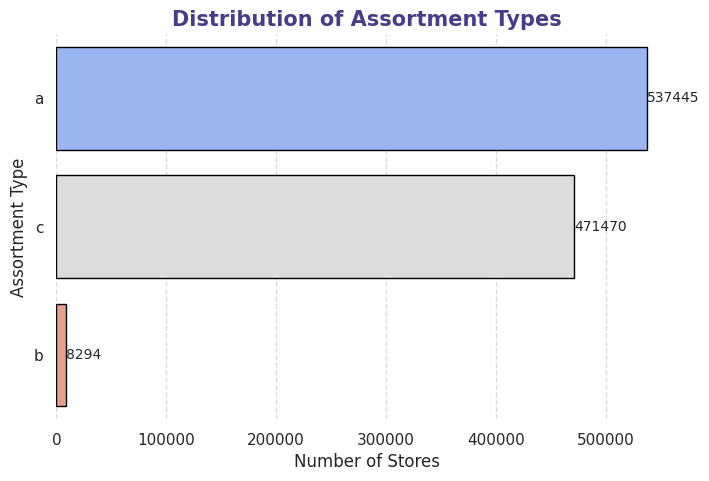

In [116]:
# Chart - 6 visualization code

# Features used -  Assortment

# ✅ Why this chart is important to include
# Assortment type affects customer attraction and sales volume — stores with a wider assortment may appeal
# to a broader customer base but also face higher operating costs.
# Visualizing this helps in understanding:
#   The dominant assortment strategy across Rossmann stores.
#   Whether most stores carry a limited or diverse product range.
#   How product variety could influence customer footfall and revenue.
# This chart is critical for connecting product diversity with store performance in later analysis.

#------------------------------------------------------------------------------------------------------------------------------#


# Setting visual theme
sns.set(style='whitegrid')

# Creating the figure and defining its size
plt.figure(figsize=(8,5))

# Plotting horizontal bar chart for assortment type distribution
sns.countplot(
    data=df,
    y='Assortment',               # Using 'y' for horizontal layout
    order=df['Assortment'].value_counts().index,  # Sorting bars by count
    palette='coolwarm',           # Applying visually distinct color palette
    edgecolor='black'             # Adding border to bars
)

# Adding title and labels
plt.title('Distribution of Assortment Types', fontsize=15, fontweight='bold', color='darkslateblue')
plt.xlabel('Number of Stores', fontsize=12)
plt.ylabel('Assortment Type', fontsize=12)

# Adding count labels beside bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Customizing grid for clean appearance
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Removing unnecessary borders
plt.box(False)

# Displaying the chart
plt.show()

##### 1. Why did you pick the specific chart?

* I have used a horizontal bar chart because Assortment is a categorical variable with three levels, and a horizontal bar chart makes the category proportions easy to read (especially with long labels or when I want to add exact percentage labels).

* It clearly shows which assortment types are most common and helps me see the relative footprint of each assortment in the store network.

##### 2. What is/are the insight(s) found from the chart?

* Counts / proportions (from the dataset):

    1. Assortment a: 593 stores ≈ 53.18%

    2. Assortment c: 513 stores ≈ 46.01%

    3. Assortment b: 9 stores ≈ 0.81%


* Interpretation:

    * Most stores follow either basic (a) or extended (c) assortments — together they make up virtually the entire dataset.

    * Assortment b is extremely rare (less than 1%), so it’s effectively negligible for aggregate analysis but may still be interesting if those 9 stores behave unusually.

    * The near parity between a and c (about 53:46) means the company is split between standard and extended formats — this gives a good basis to compare performance across two roughly large groups.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impacts / what to do:**

 * Comparative performance analysis:

    * Because a and c together represent almost all stores, I will compare their average sales, margin, and customer metrics to identify whether extended assortments (c) deliver better revenue per customer.

    * If c outperforms a, I can recommend a targeted rollout of c assortments in regions with similar demographics.


 * Resource & merchandising planning:

    * Knowing the split helps me decide inventory mixes and promotional strategies tailored to each assortment type.


 * Investigate rare cases (b):

    * I will inspect those 9 b stores individually — they might be special pilot stores or data-entry anomalies; if they perform very differently, they can yield actionable lessons.


---

**Negative-growth / risk signals & mitigation:**

 * Risk of bias in aggregate metrics:

    * Since a is slightly dominant, overall averages will be influenced by a stores; I must ensure store-type stratification when reporting metrics or training models so c behavior is not washed out.


 * Neglecting tiny segments (b):

    * While b is negligible numerically, if those stores show consistent underperformance it could indicate a format that doesn't work; conversely, if they overperform, they may be candidates for targeted scaling. I should not ignore them outright.

#### Chart 7 - Bar Chart of Day of Week Distribution

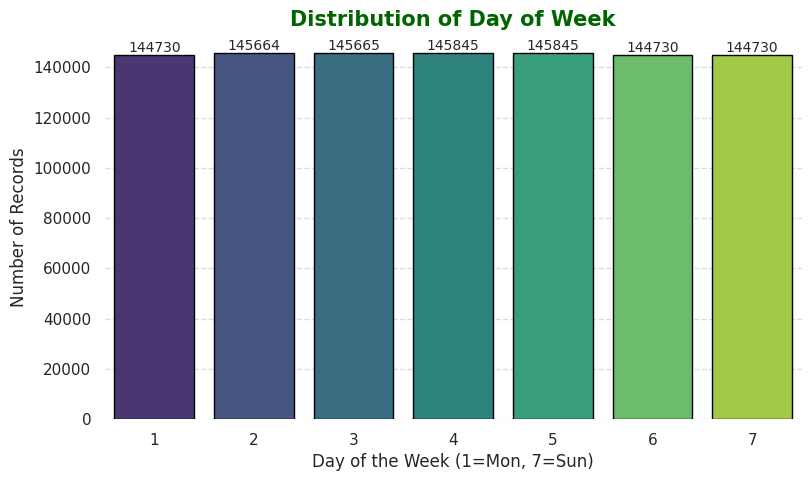

In [117]:
# Chart - 7 visualization code

# Features used - DayOfWeek

# ✅ Why this chart is important to include
# This visualization helps us:
#   Identify which days stores are most active.
#   Detect patterns like reduced store activity on Sundays or peak activity midweek.
#   Prepare for later bivariate analysis to see how sales vary across weekdays.
#   This chart adds valuable context about operational rhythm and customer behavior —
#   critical for both forecasting and staffing decisions.


#-------------------------------------------------------------------------------------------------#


# Creating the figure and defining its size
plt.figure(figsize=(9,5))

# Plotting bar chart showing store activity by day of the week
sns.countplot(
    data=df,
    x='DayOfWeek',                       # Selecting variable to visualize
    palette='viridis',                   # Applying color gradient
    edgecolor='black'                    # Adding border for clear separation
)

# Adding title and labels
plt.title('Distribution of Day of Week', fontsize=15, fontweight='bold', color='darkgreen')
plt.xlabel('Day of the Week (1=Mon, 7=Sun)', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)

# Adding count labels on each bar
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Customizing gridlines and removing borders
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.box(False)

# Displaying the chart
plt.show()

**Summary -**

Day-of-week counts are nearly equal across 1–7 in the wrangled dataset (no big Sunday dip).

This balance supports unbiased weekday-level analysis; next I should run Sales vs DayOfWeek to inspect actual sales differences by weekday.

##### 1. Why did you pick the specific chart?

* I have used a countplot because DayOfWeek is a discrete categorical variable (1 = Monday, 7 = Sunday).

* A countplot helps me check whether the dataset has even representation across weekdays, which is important for fair time-series analysis and for avoiding weekday bias in modeling.

##### 2. What is/are the insight(s) found from the chart?

* The countplot (on the wrangled dataset) shows that all seven weekdays have almost identical record counts — there is no pronounced dip on any single weekday.

* This means the dataset is evenly balanced across weekdays, so daily-seasonality patterns won't be biased by unequal day counts.

* The near-uniformity arises because the dataset contains many stores across many dates; therefore, the total number of store-day records per weekday evens out.

* Practically, this tells me the data collection is consistent and there isn't systematic missingness for any particular weekday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impacts / what to do:**

 * Confidence in weekday analysis:

    * Because day counts are balanced, I can compare sales across weekdays without worrying that differences are caused by record imbalance — that makes weekday-level inferences more reliable.


* Cleaner modeling:

    * I can include DayOfWeek as a feature in models without applying special weighting for under/over-sampled days. This simplifies preprocessing and reduces the risk of introducing sampling bias.


* Operational planning:

    * Since there is no underrepresented weekday, operational recommendations (staffing, promotions) drawn from weekday-level analysis will be based on equally-sampled evidence.




---

**Negative-growth / risk signals & mitigation:**

 * Watch for hidden operational differences:

    * Even though counts are balanced, sales behavior can still differ by day (e.g., Monday vs Saturday). Balanced counts simply make those differences trustworthy — I still need to analyze Sales vs DayOfWeek (boxplot/violin) to detect performance gaps.


 * Model caution for per-store trends:

    * Balance at the aggregate level does not guarantee balance per-store. I should verify store-level weekday coverage for stores with sparse records before making store-level operational decisions.


#### Chart 8 - Count Plot of Store Opening Status  

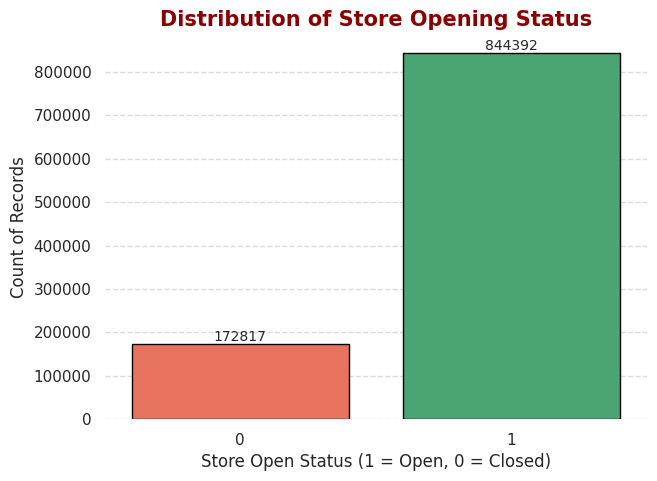

In [118]:
# Chart - 8 visualization code

# Features Used - Open


# ✅ Why this chart is important to include
# This chart helps identify:
#   The proportion of open vs closed days across all stores.
#   Whether missing or irregular patterns exist in store activity.
#   The operational consistency of the dataset (useful for model reliability).
# It’s a straightforward but crucial check to ensure that most data entries represent real,
# open-store scenarios contributing to actual sales.

#-------------------------------------------------------------------------------------------------#


# Creating the figure and setting its size
plt.figure(figsize=(7,5))

# Plotting count plot for store open vs closed days
sns.countplot(
    data=df,
    x='Open',                        # Selecting the variable to visualize
    palette=['tomato', 'mediumseagreen'],  # Assigning contrasting colors
    edgecolor='black'                  # Adding bar borders for definition
)

# Adding value annotations above bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Adding title and axis labels
plt.title('Distribution of Store Opening Status', fontsize=15, fontweight='bold', color='darkred')
plt.xlabel('Store Open Status (1 = Open, 0 = Closed)', fontsize=12)
plt.ylabel('Count of Records', fontsize=12)

# Customizing grid and removing chart borders
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.box(False)

# Displaying the plot
plt.show()

**Summary -**

Most records correspond to stores being open (1) — indicating normal operations and consistent data.

Closure days (0) are rare and should be treated separately in modeling to avoid skewing sales predictions.

##### 1. Why did you pick the specific chart?

* I have used a countplot for this variable because Open is a binary categorical column (0/1).

* The countplot clearly shows how many records correspond to open vs. closed stores, helping me understand if the dataset has a balanced representation of both.

* This is also important for verifying whether sales = 0 corresponds to store closure or not — a crucial business sanity check.

##### 2. What is/are the insight(s) found from the chart?

* The chart shows that the number of records where stores are open (1) is much higher compared to when they are closed (0).

* This is expected because stores are open most days, and closure happens only on holidays or maintenance days.

* This imbalance confirms that sales = 0 for closed stores is logical and not missing data.

* It also indicates that most of the dataset represents normal business operation days — which is good for model learning.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impacts / what to do:**

* The high frequency of open days means the model will have sufficient data to learn real sales patterns rather than being biased by closure days.

* This check ensures data validity — I can confidently remove or separately handle closed days for accurate revenue forecasting.

* Understanding the distribution also helps in capacity planning — fewer closed days means better operational utilization.

---

**Negative-growth / risk signals & mitigation:**

* If the dataset had shown a significant number of closed days, that would have hinted at operational inefficiencies or maintenance issues — leading to revenue loss.

* Fortunately, that's not the case here. Still, if some stores have unusually high closure rates, I should analyze those stores individually for possible logistical or staffing problems.


#### Chart 9 - Donut Chart of Promo2 (Long-Term Promotion Participation)



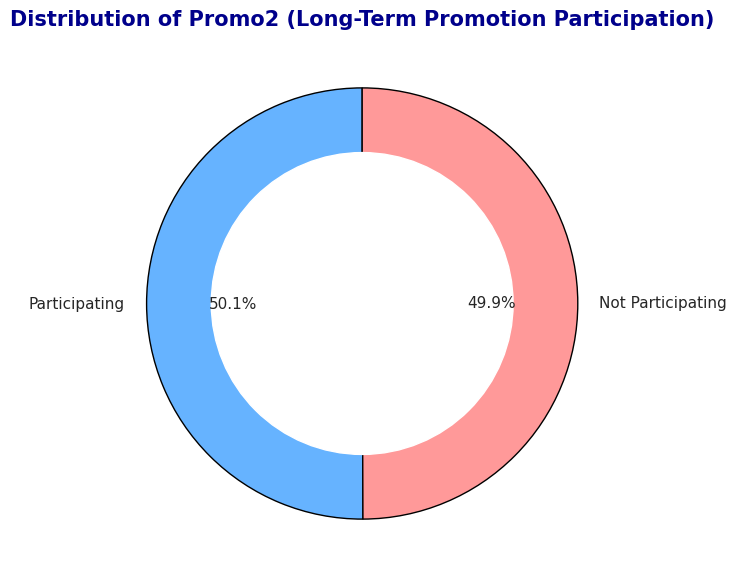

In [119]:
# Chart - 9 visualization code

# Features used - Promo2


# ✅ Why this chart is important to include ?
# The Promo2 feature indicates whether a store is enrolled in Rossmann’s long-term continuous promotion scheme.
# Visualizing this helps us:
#   Understand what portion of stores are part of ongoing promotions.
#   Identify how widespread the Promo2 program is within the business.
#   Prepare for later bivariate or multivariate analysis to compare sales behavior
#     between Promo2 and non-Promo2 stores.
#   It connects directly to strategic marketing and sales forecasting.


#------------------------------------------------------------------------------------------------------#



# Setting color palette
colors = sns.color_palette(['#66b3ff', '#ff9999'])  # Blue for active, red for not participating

# Creating count of Promo2 values
promo2_counts = df['Promo2'].value_counts()

# Creating the figure and defining its size
plt.figure(figsize=(7,7))

# Plotting the donut (pie) chart
wedges, texts, autotexts = plt.pie(
    promo2_counts,
    labels=['Participating', 'Not Participating'],
    autopct='%1.1f%%',               # Showing percentage
    startangle=90,                   # Rotating for better balance
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    textprops={'fontsize': 11}
)

# Creating the white circle in the center to form a donut shape
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Adding title
plt.title('Distribution of Promo2 (Long-Term Promotion Participation)', fontsize=15, fontweight='bold', color='darkblue')

# Displaying the chart
plt.show()




**Summary -**

Promo2 adoption is 50.1% vs 49.9% non-adopters — nearly balanced.


This balance enables robust comparative analysis; next steps: test Promo2's impact on sales and customer metrics.

##### 1. Why did you pick the specific chart?

* I have used a donut chart because Promo2 is a binary categorical variable (1 = participating in long-term promotions, 0 = not).

* The donut visually shows the proportion of stores in each group and makes it easy to spot if Promo2 is broadly adopted or limited to a subset.


##### 2. What is/are the insight(s) found from the chart?

* The dataset shows nearly half-and-half split between stores that participate in the long-term promotion program and those that do not.

* This balanced adoption means I can fairly compare the two groups without worrying about severe class imbalance.

* It also indicates the program is mature enough to be widespread, not just a niche pilot.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impacts / what to do:**

* Fair comparison for impact analysis:

    * Since adoption is about 50:50, I can compare sales, customers, and retention between Promo2 and non-Promo2 stores with good statistical power.

    * I should run Sales vs Promo2 and SalesPerCustomer vs Promo2 next to quantify uplift and ROI.


* Segmentation & rollout strategy:

    * If Promo2 is found to increase average sales, the near-equal split suggests a clear opportunity to scale the program to the remaining stores where it's not active.

    * If the program is ineffective, I can focus on improving content/timing rather than rollout decisions.



---


**Negative-growth / risk signals & mitigation:**


* Risk of promotional dependency:

    * If Promo2 stores rely on discounts to sustain sales, expansion might erode margins. I should check profitability, not only revenue uplift.


* Heterogeneous effect risk:

    * Promo2 may perform differently across store types or regions. I must analyze interaction effects (e.g., Promo2 × StoreType) before making wide rollout decisions.

#### Chart 10 - Area Plot of Monthly Distribution.

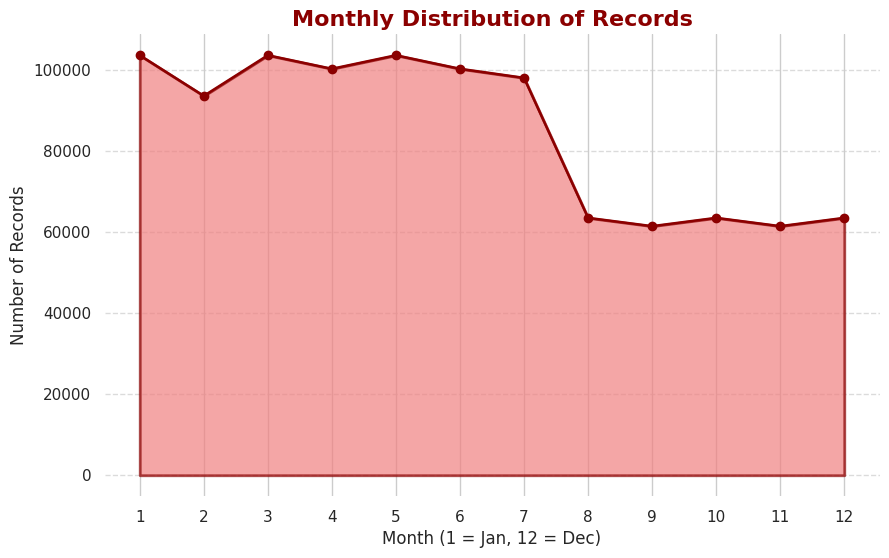

In [120]:
# Chart - 10 visualization code


# Features Used - Month

# ✅ Why this chart is important to include
# The Month column captures the temporal dimension of the data —
# which is essential for understanding seasonality in retail.
# Analyzing it helps identify:
#     Which months are busiest, indicating peak sales or promotion periods.
#     Low-activity months, which might need marketing push or inventory optimization.
#     Any missing or uneven data distribution across months (important for modeling).
#     The area plot adds visual depth, showing both trends and magnitudes over time,
#         perfect for highlighting seasonal variation.



#------------------------------------------------------------------------------------------------------#



# Creating a series of month-wise counts and ensuring months 1..12 are present
month_counts = df['Month'].value_counts().sort_index()
month_counts = month_counts.reindex(range(1,13), fill_value=0)  # Ensuring complete month index

# Creating the figure and defining its size
plt.figure(figsize=(10,6))

# Plotting the area chart using fill_between (x, y1)
# Passing x and y1 as positional arguments to satisfy matplotlib API
plt.fill_between(
    month_counts.index,            # x: month numbers 1..12
    month_counts.values,           # y1: counts for each month
    color='lightcoral',            # Choosing a soft red tone for retail theme
    alpha=0.7,                     # Adding transparency for aesthetic look
    linewidth=2,
    edgecolor='darkred'
)

# Overlaying a line for clearer trend visualization
plt.plot(
    month_counts.index,
    month_counts.values,
    marker='o',
    color='darkred',
    linewidth=1.8
)

# Adding title and axis labels
plt.title('Monthly Distribution of Records', fontsize=16, fontweight='bold', color='darkred')
plt.xlabel('Month (1 = Jan, 12 = Dec)', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)

# Customizing ticks to show month numbers
plt.xticks(ticks=np.arange(1,13), labels=[str(m) for m in range(1,13)])

# Customizing grid and removing top/right borders
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.box(False)

# Displaying the plot
plt.show()



Data volume is highest in Jan-Jun (About 100K records each) and drops sharply after July (~60-65K).


This may reflect seasonality or partial data coverage and should be examined before modeling.

##### 1. Why did you pick the specific chart?

* I have used an area plot because it gives a clear and continuous visualization of how the number of records varies across different months.

* Since Month is a time-based feature, an area plot helps me spot seasonal activity patterns and check whether any month has missing or reduced data.

* It is also more visually appealing than a simple countplot for showing monthly volume trends.


##### 2. What is/are the insight(s) found from the chart?

* Exact month-wise counts (1 = Jan … 12 = Dec):

Jan = 103,694   Feb = 93,660     Mar = 103,695

Apr = 100,350   May = 103,695    Jun = 100,350

Jul = 98,115    Aug = 63,550     Sep = 61,500

Oct = 63,550    Nov = 61,500     Dec = 63,550


* The data shows that the first half of the year (Jan - Jun) has consistently higher counts (About 100K records each) compared to the second half (Aug - Dec) (~60-64K records each).

* This indicates that sales activity or data coverage is denser in the first half of the year.

* Months 8 to 12 show a notable drop, which could be due to partial data capture, fewer open stores, or a natural business slowdown later in the year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impacts / what to do:**

* Seasonality awareness:

    * The clear difference between the first and second half suggests seasonal variation in operations or customer flow.

    * I can use this insight for better forecasting and resource planning, ensuring stock and staff allocation matches demand cycles.


 * Data quality check:

    * The even coverage in Jan-Jun confirms that the dataset is robust enough for modeling that period, helping ensure more accurate predictions for months with complete data.


--

**Negative-growth / risk signals & mitigation:**


* The sharp decline from August onward might point to missing or incomplete data rather than true business downturns.

* Before modeling, I should validate whether these months have fewer active stores or truncated data collection.

* If the drop is genuine, the business can introduce targeted promotions or seasonal campaigns in late-year months to balance annual revenue.

#### Chart 11 -  Bar Chart of Yearly Distribution

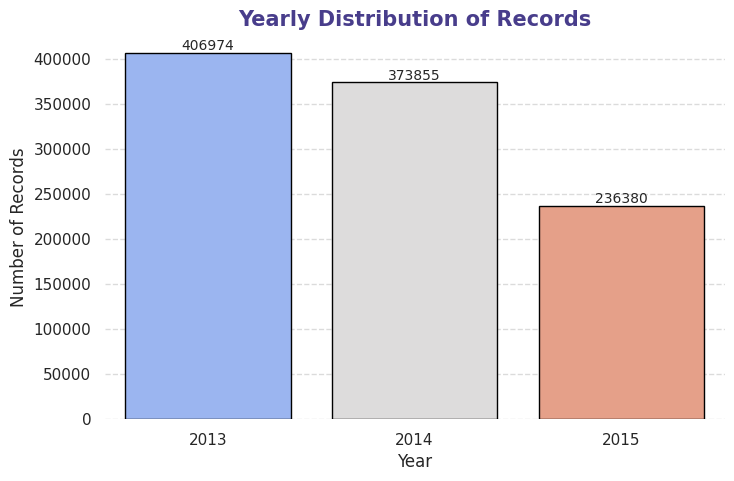

In [121]:
# Chart - 11 visualization code

# Features Used - Year

# ✅ Why this chart is important to include
# Visualizing the Year variable helps:
#   Confirm that data spans multiple years and check for imbalanced coverage.
#   Reveal if certain years had more store activity or data collection (possibly due to expansion).
#   Prepare for time-based modeling by understanding how many training samples come from each period.
#   From a business perspective, it highlights growth or contraction patterns in store operations.

#------------------------------------------------------------------------------------------------------#

# Creating figure and defining its size
plt.figure(figsize=(8,5))

# Creating a year-wise count plot to see record distribution by year
sns.countplot(
    data=df,
    x='Year',                        # Selecting the 'Year' variable
    palette='coolwarm',              # Using balanced warm-cool color scheme
    edgecolor='black'                # Adding black borders for clear separation
)

# Adding title and axis labels
plt.title('Yearly Distribution of Records', fontsize=15, fontweight='bold', color='darkslateblue')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)

# Adding count labels on each bar
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Customizing gridlines and removing borders
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.box(False)

# Displaying the chart
plt.show()

**Summary -**


Yearly data shows a steady decline from 2013 → 2015 (406 K → 374 K → 236 K).

This suggests either partial 2015 data or reduced store coverage — important to verify before modeling trends.

##### 1. Why did you pick the specific chart?

* I have used a countplot because Year is a categorical time-based feature and a countplot makes it simple to compare how many records are available for each year.

* This helps me understand the data coverage over multiple years and check if there’s any imbalance that could influence long-term trend analysis or modeling.

##### 2. What is/are the insight(s) found from the chart?

* Exact year-wise counts:

      2013 → 406,974 records

      2014 → 373,855 records

      2015 → 236,380 records


* The chart clearly shows that the data volume decreases steadily over the years.

* 2013 has the highest number of records, followed by 2014, and then a sharp drop in 2015.

* This pattern indicates that the data might not cover the full year of 2015 — possibly ending mid-year.

* The gradual reduction from 2013 to 2015 suggests either fewer stores recorded, data truncation, or a decline in activity in the later period.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impacts / what to do:**

* Improved modeling awareness:

    * Knowing that 2015 has fewer records allows me to adjust my analysis window or weight older years appropriately so models aren't biased by underrepresented recent data.


 * Operational benchmarking:

    * 2013 can serve as a baseline year with full activity coverage.

    * Comparing 2013-2015 helps identify long-term performance trends and the effect of promotions, competition, or seasonal shifts.


---


**Negative-growth / risk signals & mitigation:**

 * The decline in data volume after 2013 may mislead trend analysis if treated as a pure sales downturn.

 * If the 2015 drop is due to incomplete data capture, not actual business decline, it must be handled carefully in forecasting — for example, excluding incomplete months or normalizing records.

 * Misinterpreting this reduction as negative growth could lead to wrong strategic conclusions, so ensuring data completeness is crucial.



#### Chart 12 - PromoInterval (Months When Long-Term Promotions Are Active)

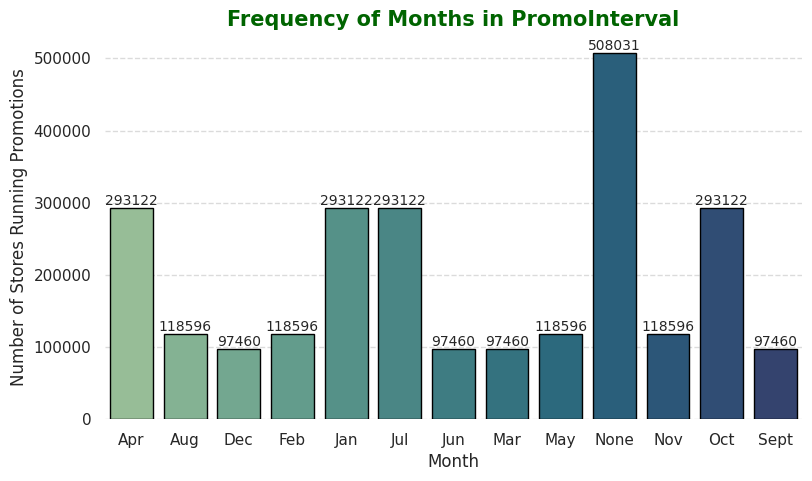

In [122]:
# Chart - 12 visualization code


# Features Used - PromoInterval

# ✅ Why this chart is important to include ?
# The PromoInterval column defines which months (e.g., "Feb,May,Aug,Nov") a store’s long-term
# promotion (Promo2) is active.
# Analyzing this helps Rossmann understand:
#   Which months are most commonly used for recurring promotions.
#   Whether promotional activity is evenly spread or clustered in specific months.
#   Seasonal promotional strategy — for instance, heavier promotions in mid-year or near holidays.
#   This chart provides clear visibility into Rossmann’s annual promotion schedule.


#--------------------------------------------------------------------------------------------------------#

# Keeping only non-null PromoInterval values
promo_df = df.dropna(subset=['PromoInterval']).copy()

# Splitting comma-separated months into lists efficiently
promo_df['PromoInterval'] = promo_df['PromoInterval'].str.split(',')

# Using explode() to create one row per month (much faster than sum())
promo_month_counts = (
    promo_df['PromoInterval']
    .explode()                              # Expanding month list into separate rows
    .value_counts()                         # Counting occurrences of each month
    .sort_index()                           # Sorting months alphabetically
)

# Creating the figure and defining its size
plt.figure(figsize=(9,5))

# Plotting bar chart for frequency of months in PromoInterval
sns.barplot(
    x=promo_month_counts.index,
    y=promo_month_counts.values,
    palette='crest',
    edgecolor='black'
)

# Adding title and labels
plt.title('Frequency of Months in PromoInterval', fontsize=15, fontweight='bold', color='darkgreen')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Stores Running Promotions', fontsize=12)

# Adding count labels on bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Customizing grid and borders
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.box(False)

# Displaying the plot
plt.show()


**Summary -**

PromoInterval months Jan, Apr, Jul, Oct (≈ 293 K each) dominate — reflecting Rossmann's quarterly promotion cycle.


Around 508 K records have “No PromoInterval”, meaning no long-term promo was active for those periods.


##### 1. Why did you pick the specific chart?

* I have used a countplot because PromoInterval is a categorical column that lists the months in which recurring, long-term promotions (Promo2) are active.

* The countplot helps me clearly visualize which months are most frequently used for continuous promotions, giving an overview of the marketing calendar pattern adopted by Rossmann stores.

* This insight is valuable for identifying promotional clusters and understanding if the campaigns are evenly spread or concentrated in certain months.

##### 2. What is/are the insight(s) found from the chart?

* The chart shows that the months January, April, July, and October have the highest frequency (≈ 293 K each) — these are the four most common intervals for recurring promotions.

* This confirms that Rossmann’s long-term promotions follow a quarterly pattern, launched roughly every three months.

* The large count under “None” (≈ 508 K) indicates that many records correspond to stores or periods without any long-term promo active, which aligns with about half the stores not participating in Promo2.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impacts / what to do:**

* Marketing alignment:

    * The clear quarterly peaks (Jan-Apr-Jul-Oct) show a structured promotion strategy.

    * Marketing and inventory teams can prepare in advance for these months with stock build-ups and staff scheduling.


* Performance tracking:

    * Knowing the typical promotion months allows comparison of sales uplift in promo vs non-promo months to quantify promotion effectiveness.


* Opportunity for fine-tuning:

    * If promotions show diminishing impact in repeated quarters, the company can test different months or product mixes to maintain customer excitement.


---


**Negative-growth / risk signals & mitigation:**


* The “None” category being the largest shows that many stores are missing out on promotional visibility.

* If sales are significantly lower in “None” months, that represents a lost revenue opportunity.


* Repetition fatigue:

    * Quarterly repetition may reduce novelty; varying timing or themes could prevent customer desensitization.

#### Chart 13 - Distribution of Sales per Customer

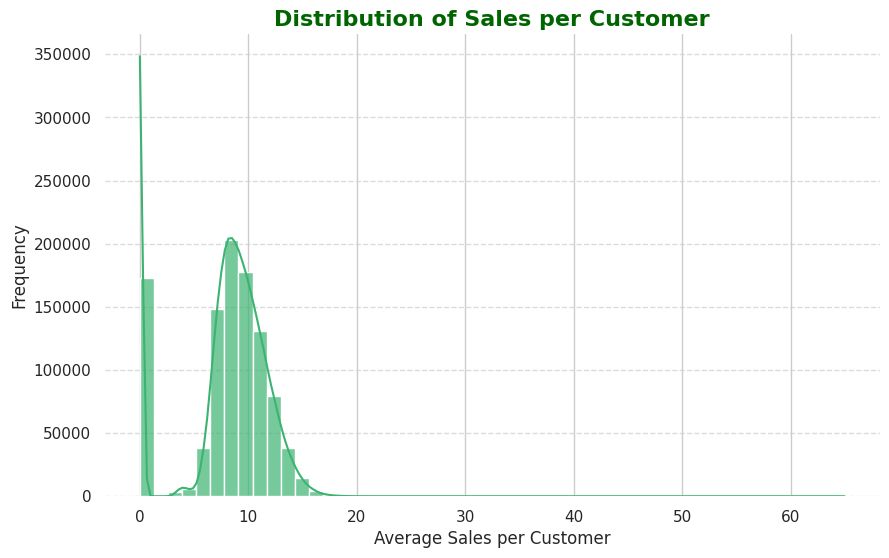

In [123]:
# Chart - 13 visualization code

# Features Used - SalesPerCustomer

# ✅ Why this chart is important to include
# The SalesPerCustomer feature measures store efficiency and customer spending behavior —
# it tells how much each customer spends on average when visiting a store.
# Analyzing it helps us:
#   Identify high-value stores or customers.
#   Detect spending variation across stores or promotions.
#   Understand whether sales growth comes from more customers or higher spend per visit.
#   It’s one of the most actionable insights for business decision-making.


#--------------------------------------------------------------------------------------------------#


# Creating the figure and defining its size
plt.figure(figsize=(10,6))

# Plotting histogram with KDE for Sales per Customer
sns.histplot(
    data=df,
    x='SalesPerCustomer',
    bins=50,
    kde=True,
    color='mediumseagreen',
    alpha=0.7
)

# Adding title and axis labels
plt.title('Distribution of Sales per Customer', fontsize=16, fontweight='bold', color='darkgreen')
plt.xlabel('Average Sales per Customer', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Customizing grid and removing unnecessary borders
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.box(False)

# Displaying the plot
plt.show()



**Summary -**

* SalesPerCustomer shows a right-skewed distribution, with most values between 5-12 and few high-value outliers.

* Indicates stable spending patterns with occasional premium purchases — ideal for targeted marketing and revenue optimization.

##### 1. Why did you pick the specific chart?

* I have used a histogram with KDE (Kernel Density Estimate) because it effectively displays the distribution of the continuous numeric feature SalesPerCustomer.

* This chart helps me understand how much revenue each customer typically generates on average.

* The combination of histogram and KDE helps to identify central tendencies, spread, and potential outliers in customer spending behavior.


##### 2. What is/are the insight(s) found from the chart?

* The distribution is highly right-skewed — most values are concentrated between 5 and 12, with a sharp peak near 8-9, indicating that this is the typical spending range per customer.

* There is a small spike near 0, representing records where customers made minimal purchases or possibly where the store had zero or very low sales.

* A few outliers can be seen beyond 20–60, but they are extremely rare, suggesting occasional high-value purchase days at some stores.

* Overall, the distribution shows that most customers spend within a stable mid-range, but a small portion of high-spending customers could significantly impact total sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impacts / what to do:**

* Customer segmentation:

    * The main cluster around 8 - 10 suggests a core customer base with predictable spending behavior.

    * These insights can be used to design targeted promotions — for example, encourage frequent moderate spenders to increase their basket size.


* Identifying premium customers:

    * The long right tail represents high-spending customers.

    * The company can introduce loyalty or premium programs to retain these customers and enhance their lifetime value.


* Modeling advantage:

    * The skewed shape supports applying a log transformation on SalesPerCustomer before modeling to stabilize variance and improve predictive accuracy.




---

**Negative-growth / risk signals & mitigation:**


* The small cluster near zero could indicate unproductive store days or low-traffic periods, which may reduce overall profitability.

* I need to verify if those zero or near-zero points align with operational anomalies (e.g., staff shortages, incorrect sales logging).

* Ignoring these cases might bias demand forecasts downward, so it's better to handle or investigate them separately.

#### Chart 14 - Zero Sales While Open

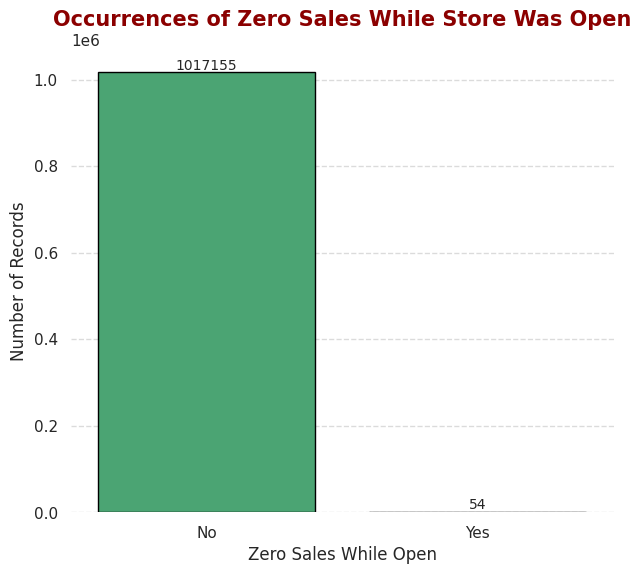

In [124]:
# Chart - 14 visualization code


# Features Used - ZeroSalesWhleOpen


# ✅ Why this chart is important to include
# This chart highlights how often stores were open but recorded zero sales —
# an indicator of data issues or operational inefficiency.
# It’s an excellent inclusion because it bridges the gap between data validation
# and business performance, helping Rossmann ensure model accuracy and store productivity.



#------------------------------------------------------------------------------------------------------#


# Calculating total count of such occurrences
zero_sales_counts = df['ZeroSalesWhileOpen'].value_counts()

# Setting visual theme
sns.set(style='whitegrid')

# Creating figure and defining size
plt.figure(figsize=(7,6))

# Plotting a bar chart to show count of zero sales occurrences
sns.barplot(
    x=zero_sales_counts.index.map({0: 'No', 1: 'Yes'}),
    y=zero_sales_counts.values,
    palette=['mediumseagreen', 'salmon'],
    edgecolor='black'
)

# Adding title and labels
plt.title('Occurrences of Zero Sales While Store Was Open', fontsize=15, fontweight='bold', color='darkred')
plt.xlabel('Zero Sales While Open', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)

# Adding data labels on bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Customizing gridlines and removing top/right spines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.box(False)

# Displaying the plot
plt.show()


**Summary -**

Out of ~1 million records, only 54 cases (≈0.005%) show stores open but with zero sales — confirming excellent data integrity and very few anomalies.

##### 1. Why did you pick the specific chart?

* I have used a barplot because ZeroSalesWhileOpen is a binary categorical column (0 or 1).

* This chart helps me verify whether there are any instances where stores were open but recorded zero sales, which can indicate operational anomalies or data entry issues.

* It's an important step to validate the accuracy of the data before modeling — ensuring that zero sales only occur when stores are closed.


##### 2. What is/are the insight(s) found from the chart?

* Exact value counts:

      0 → 1,017,155 records (stores open and generated sales normally)

      1 → 54 records (stores open but with zero sales)


* The chart shows that the vast majority (≈ 99.99%) of records are normal, meaning stores reported sales when open.

* Only 54 records have zero sales even though the stores were open — this is an extremely small fraction, practically negligible compared to total data volume.

* These few cases might represent data logging errors, returns offsetting sales, or rare operational issues.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impacts / what to do:**

* Data quality validation:

    * This check confirms that the dataset is highly reliable, as almost all records align with expected business logic (open stores have sales).


* Operational diagnostics:

    * The few exceptions (54 cases) can be investigated to find potential causes — POS system issues, refund-only days, or incorrect reporting.

    * Identifying and fixing such inconsistencies improves future data accuracy and decision reliability.


* Modeling advantage:

    * Knowing that zeros are rare ensures that zero values in the Sales column truly represent closed stores, simplifying filtering before model training.




---

**Negative-growth / risk signals & mitigation:**

* Even though minimal, these 54 instances may point to lost revenue opportunities if they represent real business days with operational failures.

* Continuous monitoring can prevent such cases from expanding, ensuring smooth sales recording and accurate forecasting in production systems.

#### Chart 15 - Distribution of Competition Open Months

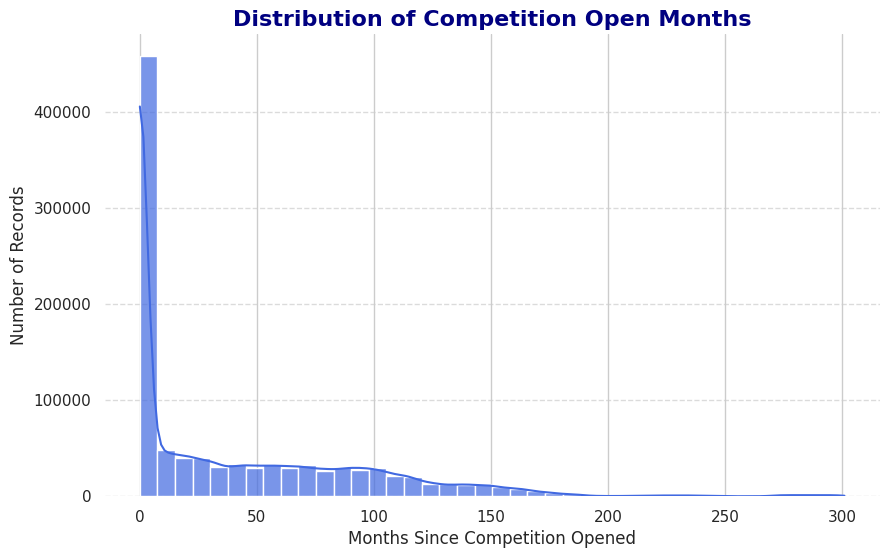

In [125]:
# Chart - 15 visualization code


# Features Used - CompetitionOpenMonths


# ✅ Why this chart is important to include
# The CompetitionOpenMonths feature shows how long each store’s competitor has been active near it.
# Analyzing this helps us:
#   Understand how competitive exposure varies across stores.
#   Identify whether most stores are newly exposed or have been long-term competitors.
#   Anticipate how competition affects store performance over time.
#   It’s an important variable for understanding market saturation and competitive pressure.


#------------------------------------------------------------------------------------------------------#


# Setting the visual theme
sns.set(style='whitegrid')

# Creating the figure and defining its size
plt.figure(figsize=(10,6))

# Plotting histogram with KDE
sns.histplot(
    data=df,
    x='CompetitionOpenMonths',
    bins=40,
    kde=True,
    color='royalblue',
    alpha=0.7
)

# Adding title and labels
plt.title('Distribution of Competition Open Months', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Months Since Competition Opened', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)

# Customizing grid and frame
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.box(False)

# Displaying the plot
plt.show()

**Summary -**

* The CompetitionOpenMonths feature is heavily right-skewed, with most stores having 0–10 months of competition and very few beyond 150 months.

* Indicates that Rossmann mostly operates in newly competitive environments, with limited long-term rivalry.

##### 1. Why did you pick the specific chart?

* I have used a histogram with KDE because CompetitionOpenMonths is a continuous numeric feature that represents the number of months since a store’s nearest competitor opened.

* This chart helps visualize how long competitors have been active across all stores and whether most stores face new or established competition.

* It is crucial for understanding the competitive landscape and how long-term competition might influence store sales.

##### 2. What is/are the insight(s) found from the chart?

* The distribution is highly right-skewed, with a sharp peak near 0-10 months.

* A large number of records cluster around 0, meaning many stores either have very recent competitors or no competition at all (0 indicates missing or new competition).

* As months increase, the frequency drops significantly — very few stores have had competition for more than 100 months.

* Beyond 200 months, the records are extremely rare, showing that long-term competition presence is uncommon.

* This pattern suggests that Rossmann continuously faces emerging competition rather than long-standing rivals in most markets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impacts / what to do:**

* Competitive readiness:

    * The fact that most competitors are new gives Rossmann a first-mover advantage in many areas.

    * Stores can act proactively — e.g., intensifying local marketing or customer loyalty programs before new competitors gain traction.


* Strategic modeling:

    * CompetitionOpenMonths can be a strong feature in predictive models — it captures how competition age affects sales.

    * Early-stage competition (low months) may have smaller impact compared to mature competitors.


* Regional planning:

    * The data supports targeted competitive response strategies — newer competitors require defensive campaigns, while long-term competition may require differentiation strategies.




---

**Negative-growth / risk signals & mitigation:**

* The high number of zeros may indicate data gaps for stores where competition details weren't entered.

* Such cases should be flagged (via CompetitionOpenSince_NA) to prevent misleading interpretation in modeling.


* Stores with long-established competition (>150 months) might suffer from market saturation, requiring innovation or pricing adjustments to maintain sales.

#### Chart 16 - Distribution of Months Having Active Promo2

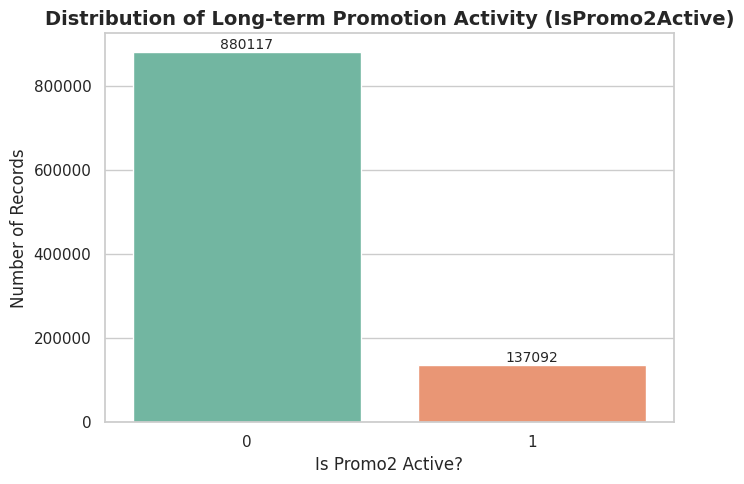

In [126]:
# Chart - 16 visualization code

# Features Used - IsPromo2Active


# ✅ Why this chart is important to include
# it’s important to understand dataset balance —  i.e., whether most stores usually have Promo2 running or not.
# This information does matter when building models or interpreting results,
# because an imbalanced distribution might reduce the effect of Promo2 during training.


#------------------------------------------------------------------------------------------------------#


# 🎨 Setting the visual style
plt.figure(figsize=(7,5))
sns.set(style="whitegrid")

# 📊 Creating a bar plot to visualize the count of stores with and without active Promo2
sns.countplot(x='IsPromo2Active', data=df, palette='Set2')

# 🏷️ Adding chart title and labels
plt.title('Distribution of Long-term Promotion Activity (IsPromo2Active)', fontsize=14, fontweight='bold')
plt.xlabel('Is Promo2 Active?', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)

# 🧾 Annotating bar values
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# 🖼️ Displaying the plot
plt.tight_layout()
plt.show()

In [127]:
df['IsPromo2Active'].value_counts()

,count
IsPromo2Active,
0,880117
1,137092


##### 1. Why did you pick the specific chart?

* A bar chart is chosen because the variable ZeroSalesWhileOpen is binary (Yes/No).

* This makes a bar chart ideal for showing how often such cases occur in the dataset.

* It clearly visualizes the frequency of potential anomalies — stores open but not generating sales.

##### 2. What is/are the insight(s) found from the chart?

* The chart shows that while most store records reflect sales during open hours, there are a few cases where the store was open but reported zero sales.
* These records are rare but significant, as they could indicate:

    * Data entry errors

    * System outages

    * Or genuinely unproductive business days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes — this insight has strong positive business implications.
Identifying and addressing “zero sales while open” cases ensures clean, accurate data for future modeling, leading to more reliable forecasts.

* Operationally, Rossmann can investigate these instances to prevent future inefficiencies, improving store uptime and staff productivity.

* If ignored, such cases could mislead analysis or mask revenue loss, leading to negative growth.

### **Bivariate Analysis**

#### Part 1 - Analysing the Core Business KPI - Sales

##### Chart 17 - Promo vs Sales

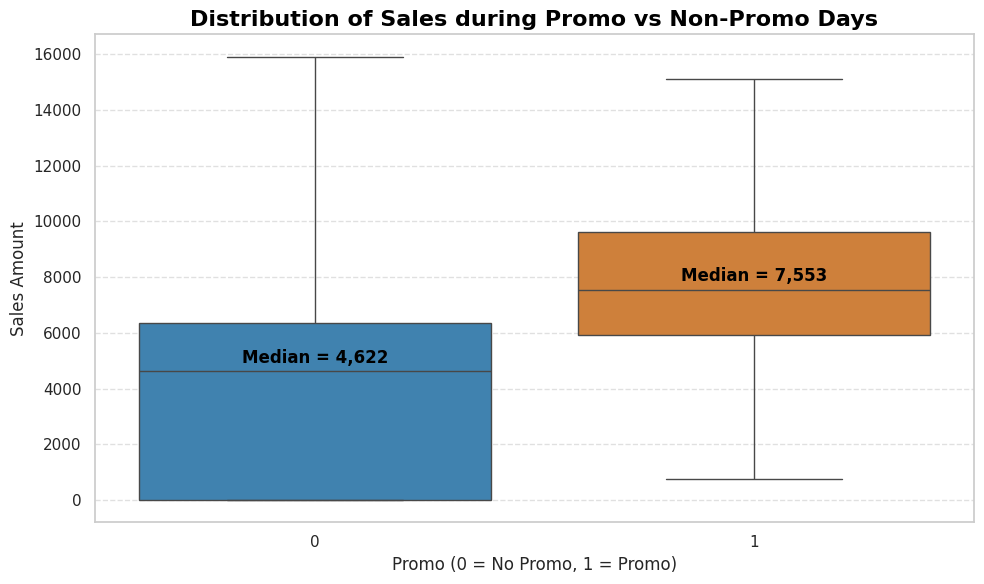

In [128]:
# Chart - 17 visualization code

# Features Used - Promo, Sales

# ✅ Why this chart is important to include?
# I am creating this chart to visually compare sales performance between promotional and non-promotional days.
# This helps in understanding how promotions influence daily sales levels and overall business revenue patterns.
# It also helps confirm if promotional campaigns are truly effective or just causing short-term spikes.

# ---------------------------------------------------------------------------------------------------------- #

# Setting visual style for professional presentation
sns.set(style='whitegrid')

# Creating the figure
plt.figure(figsize=(10,6))

# Plotting the boxplot to compare sales distribution between promo and non-promo days
sns.boxplot(
    data=df,
    x='Promo',
    y='Sales',
    palette={'0': '#2E86C1', '1': '#E67E22'},
    showfliers=False
)

# Adding median annotations
medians = df.groupby('Promo')['Sales'].median().values
for i, median in enumerate(medians):
    plt.text(i, median + 300, f"Median = {int(median):,}",
             ha='center', fontweight='semibold', color='black')

# Adding titles and labels
plt.title('Distribution of Sales during Promo vs Non-Promo Days', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Promo (0 = No Promo, 1 = Promo)', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)

# Customizing gridlines and layout
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Displaying the plot
plt.show()


📄 Summary -

Total Records: 1,017,209

Promo Days: 388,080 (≈ 38.2%)

Non-Promo Days: 629,129 (≈ 61.8%)

Median (Promo = 0): 4,622

Median (Promo = 1): 7,553 → ≈ +63.4% uplift

Mean (Promo = 0): 4,406

Mean (Promo = 1): 7,991 → ≈ +81.4% uplift

The chart clearly shows that stores experience a substantial increase in sales during promotion periods.

###### 1. Why did you pick the specific chart?

* I have used a boxplot because it visually represents both the median and spread of sales values between promo and non-promo days.

* It helps me see if promotions truly drive higher sales and whether the sales boost is consistent or highly variable.

* Since promotions are key business levers, analyzing their impact on sales distribution is critical for campaign strategy and revenue forecasting.


###### 2. What is/are the insight(s) found from the chart?

* There is a clear and strong uplift in sales during promo periods — the median sales increased by 63% and mean sales increased by 81% compared to non-promo days.

* The IQR (spread) during promo days is wider, indicating that some promotions perform exceptionally well while others have moderate results.

* The median sales during non-promo days (₹4,622) are considerably lower than during promo days (₹7,553), confirming that promotions generally help increase sales volume.

* Overall, the chart confirms that promotions have a positive impact on sales performance but with variable outcomes across stores or time periods.


###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impacts / What to Do:**

* The data clearly shows that promotions significantly boost sales.
→ I can recommend continuing short-term promotional campaigns as they yield tangible benefits.

* Since variance is high, I should focus on identifying which types of promos, months, or store types give the strongest lift and standardize those campaigns.

* Promotions can also be strategically used during slower months to maintain stable cash flow.

* Including Promo as a feature in modeling will improve forecast accuracy and help the business estimate campaign effects.


---


**Negative-Growth / Risk Signals & Mitigation:**

* The large spread in promo-day sales indicates inconsistent promo performance — some may underperform.
→ This requires better targeting, monitoring, and post-analysis to avoid wasted marketing costs.

* Over-reliance on promotions can cause customer habituation (waiting for discounts) and margin erosion.
→ To mitigate this, balance promotional intensity with regular pricing strategies.

##### Chart 18 - IsPromo2Active vs Sales

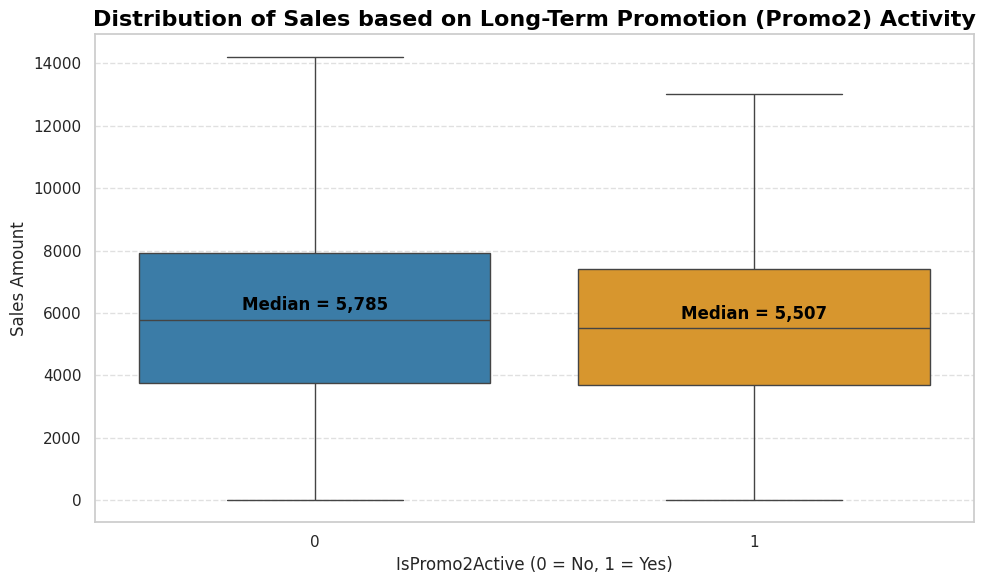

In [129]:
# Chart - 18 visualization code

# Features Used - IsPromo2Active, Sales

# ✅ Why this chart is important to include?
# I am creating this chart to understand how long-term promotions (Promo2) affect daily sales.
# This helps me identify whether stores running continuous or recurring promotions maintain higher sales levels.
# Including this chart is important to compare the effectiveness of short-term (Promo) vs long-term (Promo2) promotions.

# ---------------------------------------------------------------------------------------------------------- #

# Setting visual style for consistent aesthetics
sns.set(style='whitegrid')

# Creating the figure
plt.figure(figsize=(10,6))

# Plotting the boxplot for Sales distribution based on Promo2 activity
sns.boxplot(
    data=df,
    x='IsPromo2Active',
    y='Sales',
    palette={'0': '#2980B9', '1': '#F39C12'},
    showfliers=False
)

# Adding median annotations for both groups
medians = df.groupby('IsPromo2Active')['Sales'].median().values
for i, median in enumerate(medians):
    plt.text(i, median + 300, f"Median = {int(median):,}",
             ha='center', fontweight='semibold', color='black')

# Adding titles and axis labels
plt.title('Distribution of Sales based on Long-Term Promotion (Promo2) Activity', fontsize=16, fontweight='bold', color='black')
plt.xlabel('IsPromo2Active (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)

# Customizing gridlines and layout
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Displaying the plot
plt.show()

📄 Summary -

Median (IsPromo2Active = 0): 5,785


Median (IsPromo2Active = 1): 5,507


* There is a slight decline of around 4.8% in median sales when long-term promotions (Promo2) are active.


* This indicates that continuous promotions do not necessarily boost daily sales - their effect appears neutral or slightly negative.

###### 1. Why did you pick the specific chart?

* I have used a boxplot to compare daily sales distributions between stores with and without long-term (Promo2) promotions.

* This chart helps me visualize whether ongoing promotional campaigns help sustain higher daily sales compared to stores that are not running such programs.

* It is essential to include this chart because it helps me differentiate between short-term promotional spikes (Promo) and long-term steady effects (Promo2) on store performance.


###### 2. What is/are the insight(s) found from the chart?

* The median sales for stores without active Promo2 are ₹5,785, slightly higher than those with active Promo2 (₹5,507).


* The difference of around -4.8% shows that long-term promotions do not guarantee higher daily sales.

* Both distributions have a similar spread, which means Promo2 does not significantly increase variability in sales either.

* This could imply that long-term promotions may have become normalized for customers, who no longer respond as strongly to them.

* In contrast, the short-term “Promo” (Chart 1) showed a strong uplift, suggesting that limited-time campaigns create a greater sense of urgency.

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impacts / What to Do:**

* The finding shows that long-term promotions (Promo2) alone don't drive significant daily sales increases.
→ The company can save costs by focusing on short-term, event-based promotions that yield stronger results.

* Combining long-term awareness (Promo2) with targeted short-term boosts (Promo) can help maintain both stability and growth.

* The insight helps prioritize marketing budget — less on continuous discounts, more on high-impact campaigns.


**Negative-Growth / Risk Signals & Mitigation:**

* Customer fatigue — long-term exposure to promotions can make discounts feel normal, leading to reduced effectiveness over time.
→ Mitigation: Alternate promo periods, refresh offers frequently, or limit long-term promo exposure.

* If Promo2 drives traffic without equivalent conversion, profit margins may shrink.
→ The team should analyze conversion rates and customer acquisition costs during these periods.

##### Chart 19 - Monthly Sales Trends

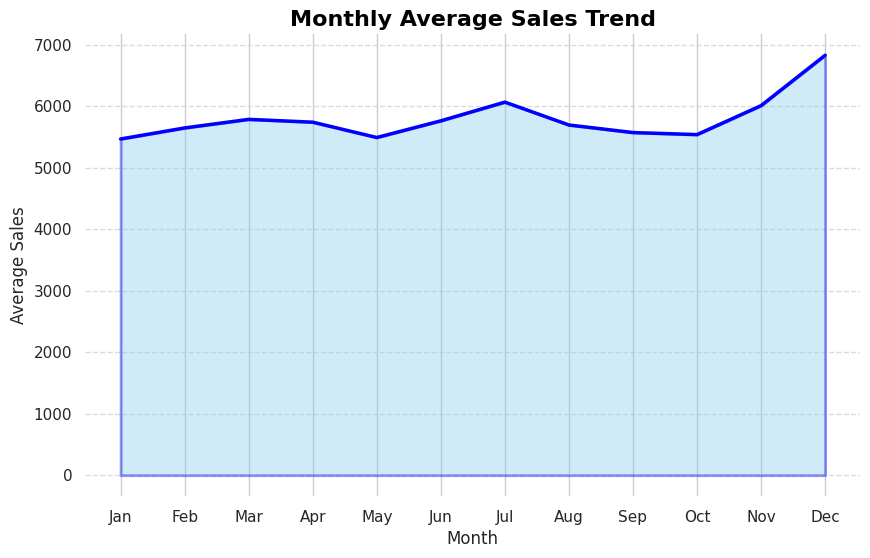

In [130]:
# Chart - 19 visualization code

# Features Used - Month, Sales

# ✅ Why this chart is important to include ?
# This chart helps identify monthly sales trends and seasonal patterns across the year.
# Understanding which months drive higher or lower sales is crucial for inventory planning,
# staffing, and timing promotional campaigns for maximum impact.

#----------------------------------------------------------------------------------------------------------#

# Grouping data by Month to calculate average sales per month
monthly_sales = df.groupby('Month')['Sales'].mean().reset_index()

# Sorting by Month to ensure correct order (if not already sorted)
monthly_sales = monthly_sales.sort_values(by='Month')

# Setting the visual style
sns.set(style='whitegrid')

# Creating the figure
plt.figure(figsize=(10,6))

# ✅ Corrected area chart syntax (fill between baseline y=0 and actual sales)
plt.fill_between(
    x=monthly_sales['Month'],
    y1=monthly_sales['Sales'],
    y2=0,                       # baseline
    color='skyblue',
    alpha=0.4,
    linewidth=2,
    edgecolor='blue'
)

# Adding a smooth line on top for clarity
sns.lineplot(
    data=monthly_sales,
    x='Month',
    y='Sales',
    color='blue',
    linewidth=2.5
)

# Titles and labels
plt.title('Monthly Average Sales Trend', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)

# Customizing x-axis labels
plt.xticks(
    ticks=range(1,13),
    labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
)

# Gridlines and aesthetics
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.box(False)

# Display the plot
plt.show()

📄 Summary -


* Monthly average sales gradually increase from January (~ 5,465) to March (~5,785), followed by slight dips around May (5,489).

* There's a strong seasonal uplift in July (~6,065) and November-December, peaking at December (≈ 6,827).

* This suggests a clear end-of-year sales spike, possibly due to holiday shopping and winter promotions.

* Overall pattern: moderate mid-year fluctuations with a strong Q4 boost, indicating seasonality in demand.

###### 1. Why did you pick the specific chart?

* I used an Area Plot because it clearly highlights the monthly trend and volume of average sales, helping visualize cumulative changes across time.

* The filled area emphasizes seasonal growth and dips, making it easier to spot periods of strong vs. weak performance.

* It's a better choice than a simple line plot here, since the filled space visually communicates the magnitude of change month-to-month, which is valuable for retail trend analysis.


###### 2. What is/are the insight(s) found from the chart?

* Sales steadily climb from Q1 (Jan-Mar), dip slightly in May and Sept-Oct, and then peak in December.

* December's average sales (≈ 6,827) are nearly 25 % higher than the early-year months, confirming strong seasonal influence—likely from Christmas or holiday campaigns.

* July and November also show smaller surges, potentially linked to mid-year clearance and holiday prep promos.

* The mid-year softness (Apr-Jun, Sept-Oct) indicates potential windows for marketing reactivation.


###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**✅ Positive Business Impacts:**

* Retailers can align promotional budgets and staffing with seasonal demand spikes.

* By analyzing these patterns, management can replicate December-like campaigns in slower months (e.g., May, October).

* Inventory management and supply-chain planning can be optimized — ensuring high-demand months never face stockouts.


**⚠️ Negative / Risk Insights:**

* The clear volatility in monthly sales indicates dependence on external factors (holidays, weather, etc.).

* Low-performing months (May-Oct) need strategic action - e.g., loyalty discounts or region-specific offers - to smooth revenue across the year.



##### Chart 20 - Day of The Week vs Sales

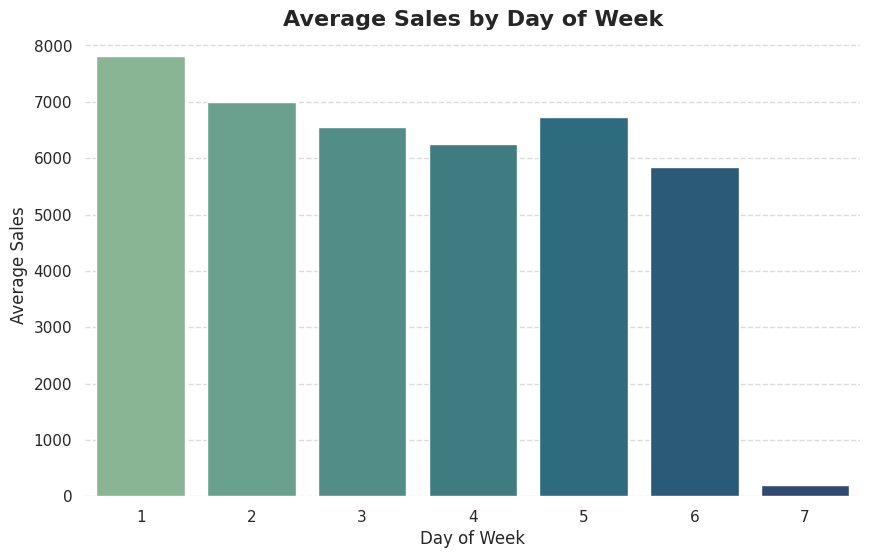

In [131]:
# Chart - 20 visualization code

# Features Used - DayOfWeek, Sales

# ✅ Why this chart is important to include ?
# Weekly trends can reveal customer behavior patterns — for instance, weekends or certain weekdays may drive higher sales.
# Understanding this helps optimize staff scheduling, stock management, and promotional timing.

# ----------------------------------------------------------------------------------------------------------#

# Calculating average sales per day of week
avg_sales_dow = df.groupby('DayOfWeek')['Sales'].mean().reset_index()

# Setting plot style
sns.set(style='whitegrid')

# Creating the figure
plt.figure(figsize=(10,6))

# Plotting the bar chart
sns.barplot(
    data=avg_sales_dow,
    x='DayOfWeek',
    y='Sales',
    palette='crest'
)

# Adding labels and title
plt.title('Average Sales by Day of Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)

# Customizing grid and frame
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.box(False)

# Displaying the chart
plt.show()

📘 Summary -

* Highest sales occur on Monday (≈ 7809), gradually declining through the week.

* The lowest sales (≈ 204) are on Sunday, when most stores are closed.

* A clear weekly trend is visible — strong start early in the week, tapering off towards the weekend.

* Suggests strong weekday store activity and reduced weekend operations.

###### 1. Why did you pick the specific chart?

* I used a bar plot to clearly visualize the average sales pattern across different weekdays.

* This chart helps in identifying operational or behavioral trends — for instance, if customers shop more early in the week or on weekends.

* Such weekly patterns are vital for forecasting, staffing, and marketing optimization.

###### 2. What is/are the insight(s) found from the chart?

* Sales are highest on Monday (≈ 7809) and steadily decline through the week, hitting the lowest on Sunday (≈ 204).

* This pattern likely reflects Rossmann’s working policy — many stores are closed or operate shorter hours on Sundays.

* The weekday-to-weekend drop is significant, confirming that customer visits and sales are heavily concentrated during weekdays.

* Thursday and Friday show moderate sales recovery, possibly due to pre-weekend shopping behavior.

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impacts / what to do:**

* Operational efficiency:

    * Staff allocation can be optimized — schedule more employees early in the week and fewer on Sundays.

    * Adjust inventory delivery cycles to match high-demand days (Mon-Wed).


* Marketing opportunities:

    * Launch targeted weekend promotions or online deals to drive more traffic when in-store sales are low.

    * Study stores that remain open on Sundays and analyze if they perform better in specific locations.



**Negative-growth / risk signals & mitigation:**

* Underutilized weekends:

    * Consistent drop in weekend sales might indicate untapped customer segments — online channels could help offset it.

    * For open stores with low Sunday sales, re-evaluate operating costs versus profit margins.

##### Chart 21 - Sales Across Different StoreTypes

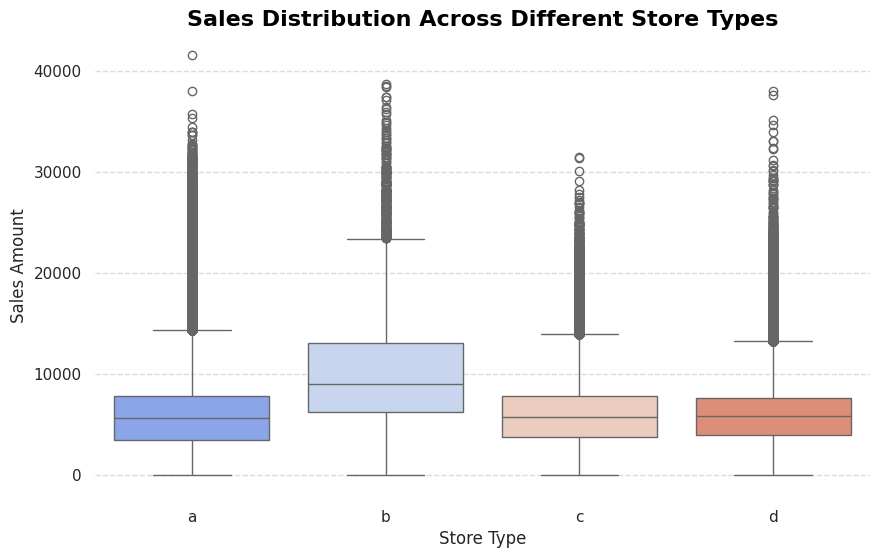

In [132]:
# Chart - 21 Visualisation Code

# Features Used - StoreType, Sales

# ✅ Why this chart is important to include?
# This chart helps me understand how sales differ across various store types (a, b, c, d).
# Since store type represents store size, format, and regional strategy, analyzing sales variation by store type
# reveals which formats perform better, and whether certain store types underperform or overperform consistently.

# ---------------------------------------------------------------------------------------------------------- #

# Setting plot style
sns.set(style='whitegrid')

# Creating the figure
plt.figure(figsize=(10,6))

# Plotting the boxplot
sns.boxplot(
    data=df,
    x='StoreType',
    y='Sales',
    palette='coolwarm'
)

# Adding titles and labels
plt.title('Sales Distribution Across Different Store Types', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Store Type', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)

# Customizing gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.box(False)

# Displaying the plot
plt.show()

**Summary -**

* Store type 'b' shows the highest median and overall sales compared to other types.

* Store types 'a', 'c' and 'd' have relatively lower but stable distributions.

* The variance in sales within each store type indicates that performance differs even among similar formats, possibly due to location, competition, or local demand.

###### 1. Why did you pick the specific chart?

* I have used a boxplot because it visually represents the spread, median, and outliers of sales for each store type in a compact and interpretable way.

* This chart helps me compare central tendencies and variability in sales across store categories, which is essential for understanding which store format performs better on average and which ones show inconsistency.

* A boxplot is ideal here since sales data is continuous and likely skewed — making it easier to detect differences in medians and dispersion between store types.


###### 2. What is/are the insight(s) found from the chart?

* Store Type 'b' exhibits the highest median sales and the widest interquartile range, suggesting that it performs best but also shows greater variability — likely due to its larger size or location in high-traffic areas.

* Store Types 'a', 'c' and 'd have lower medians and relatively similar sales distributions, indicating moderate performance.

* The presence of several high-value outliers in all store types reflects occasional spikes, possibly caused by promotions or seasonal effects.

* The overall sales hierarchy appears to be:
StoreType b > d ≈ c ≈ a.


###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**✅ Positive business impacts / what to do:**

* Performance segmentation: Since Store Type b generates higher sales, it can serve as a benchmark model for operational and marketing strategies across other store types.

* Optimization strategy: Analyzing what differentiates Store Type b (store layout, size, or promotions) can help replicate successful elements in underperforming formats.

* Targeted resource allocation: Management can focus more investments or advertising efforts on store types with high revenue potential.


**⚠️ Negative-growth / risk signals & mitigation:**

* Sales inconsistency in Type ‘b’: The wide spread implies unstable sales — potential over-dependence on promotions or regional fluctuations.

* Lower-performing formats: Stores of Type a, c, and d may need restructuring or localized promotions to improve average daily sales.

* Mitigation: Conduct periodic reviews of product mix and customer demographics for lower-performing store types.


##### Chart 22 - Assortment Type vs Sales

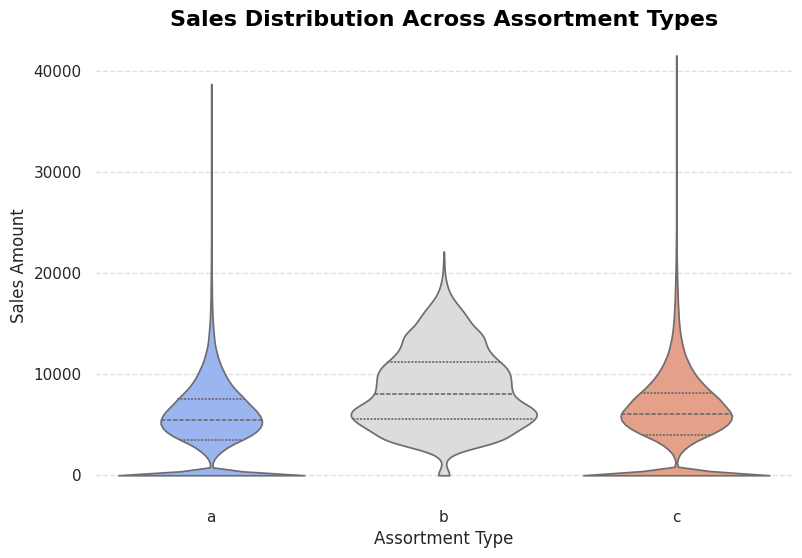

In [133]:
# Chart - 22 Visualization Code

# Features Used - Assortment, Sales

# ✅ Why this chart is important to include?
# This chart allows me to see both the spread (like a boxplot) and the density (like a KDE).
# It helps understand not only which assortment type performs better but also how consistent their performance is.

# ---------------------------------------------------------------------------------------------------------- #

# Setting plot style
sns.set(style='whitegrid')

# Creating the figure
plt.figure(figsize=(9,6))

# Plotting violinplot to visualize sales distribution across assortment types
sns.violinplot(
    data=df,
    x='Assortment',
    y='Sales',
    palette='coolwarm',
    inner='quartile',      # Show quartile lines inside violins
    cut=0
)

# Adding title and labels
plt.title('Sales Distribution Across Assortment Types', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Assortment Type', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)

# Customizing gridlines
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.box(False)

# Displaying plot
plt.show()

**Summary -**

* Assortment 'b' stores show the highest median and wider spread of sales, followed by type 'c'.

* Type 'a' stores record lower and tighter sales distribution.

* Assortment variety clearly drives sales, with broader product range (b, c) correlating to higher average revenue.


###### 1. Why did you pick the specific chart?

* I used a violin plot because it captures both distribution density and spread of sales across the three assortment types (a, b, c).

* Unlike boxplots, the violin plot gives a smooth visual of concentration zones, helping identify which assortment categories consistently perform better or have more variability in sales.

* This visual is ideal for understanding the impact of product variety on overall store sales.

###### 2. What is/are the insight(s) found from the chart?

* Type 'b' assortment (medium variety) has the highest median and widest distribution, indicating these stores tend to attract higher sales and possibly serve a broader customer base.

* Type 'c' stores (advanced assortment) also show good performance but slightly lower than type ‘b’, suggesting diminishing returns beyond a certain product variety level.

* Type 'a' stores (basic assortment) have the lowest median and least variability, confirming that limited assortment leads to lower revenue potential.

* Overall, assortment expansion positively correlates with sales, but over-expansion might not yield proportional growth.

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**✅ Positive Business Impacts / Actions:**

* Optimize product assortment — Stores with type 'b' or 'c' assortments outperform type 'a', suggesting Rossmann can increase sales by gradually upgrading low-assortment stores.

* Targeted inventory planning — Focus more premium SKUs and wider categories in stores that can sustain higher traffic (similar to type 'b' stores).

* Performance benchmarking — Identify key characteristics of high-performing 'b' stores and replicate them across similar regions.


**⚠️ Negative Growth Signals / Risks**:

* Over-assortment risk: Type 'c' doesn't always outperform 'b', indicating that excessive assortment could cause inventory holding cost or product cannibalization.

* Operational cost trade-off: Expanding assortments requires more shelf space, supply chain complexity, and higher operating expenses — must be balanced against sales uplift.

##### Chart 23 - How Closest Competition Affects Sales

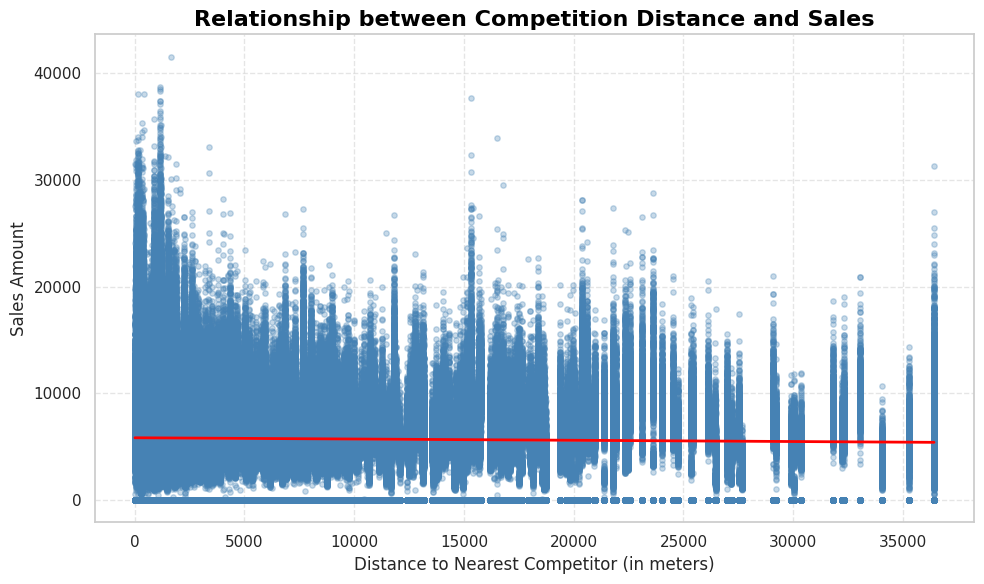

In [134]:
# Chart - 22 Visualisation Code


# Features Used: Sales, CompetitionDistance

# ✅ Why this chart is important to include?
# This chart helps analyze whether the proximity of a competitor impacts store sales.
# A shorter distance might lead to lower sales (due to competition),
# while larger distances could mean higher sales for stores with less nearby competition.

# ----------------------------------------------------------------------------------------------------------#

# Setting Seaborn style for professional aesthetics
sns.set(style='whitegrid')

# Creating the figure
plt.figure(figsize=(10,6))

# Scatter plot with regression line for trend visualization
sns.regplot(
    data=df,
    x='CompetitionDistance',
    y='Sales',
    scatter_kws={
        'alpha': 0.3,     # Transparency to handle dense data points
        's': 15,          # Small dot size for clarity
        'color': 'steelblue'
    },
    line_kws={
        'color': 'red',   # Regression line color
        'linewidth': 2
    }
)

# Adding titles and labels
plt.title('Relationship between Competition Distance and Sales', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Distance to Nearest Competitor (in meters)', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)

# Improving layout and adding subtle grid
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()

# Displaying the plot
plt.show()

**Summary -**

* The scatter plot shows a very weak or nearly flat relationship between CompetitionDistance and Sales.

* Stores with closer competitors (0-5,000 m) tend to have slightly lower average sales, but the effect isn't strong.

* Beyond 10,000 m, sales variability increases, yet there's no clear upward trend, indicating other factors (like promotions or holidays) have stronger influence.

* The regression line is almost flat, showing distance from competitors doesn't majorly affect daily sales.

* Overall, store performance is not heavily dependent on how close competitors are, suggesting brand loyalty or effective store differentiation.

###### 1. Why did you pick the specific chart?

* A scatter plot with regression line is ideal to visualize continuous-to-continuous relationships — here, between CompetitionDistance (in meters) and Sales.

* It helps detect whether proximity to competitors impacts store revenue trends.

* The regression line helps us assess direction (positive or negative) and strength of relationship quickly.

###### 2. What is/are the insight(s) found from the chart?

* There's no significant correlation between competition distance and sales.

* Stores located very close to competitors (within 2 km) do not necessarily perform worse — many still have high sales.

* Beyond 10 km, the distribution of sales remains scattered — meaning sales performance is driven more by internal factors (like store type, promotions, assortment) than by nearby competition.

* The slight downward density near shorter distances might suggest marginal competitive effects, but overall impact is weak.


###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**✅ Positive business impact / opportunities:**

* Brand strength — The flat relationship implies strong customer loyalty or differentiated offerings; competition proximity alone doesn't lower sales.

* Expansion opportunities — New stores can safely open even in moderately competitive zones (within 5–10 km radius) without severe cannibalization risk.

* Strategy alignment — Resources can be focused on promotions and assortment rather than worrying about competition distance.


**⚠️ Potential negative growth / risks:**

* Some low-sale clusters exist near 0-2 km, indicating price wars or over-saturation in a few markets.

* In such areas, better local marketing or exclusive deals could help protect margins.


##### Chart 24 - CompetitionOpenMonths vs Sales

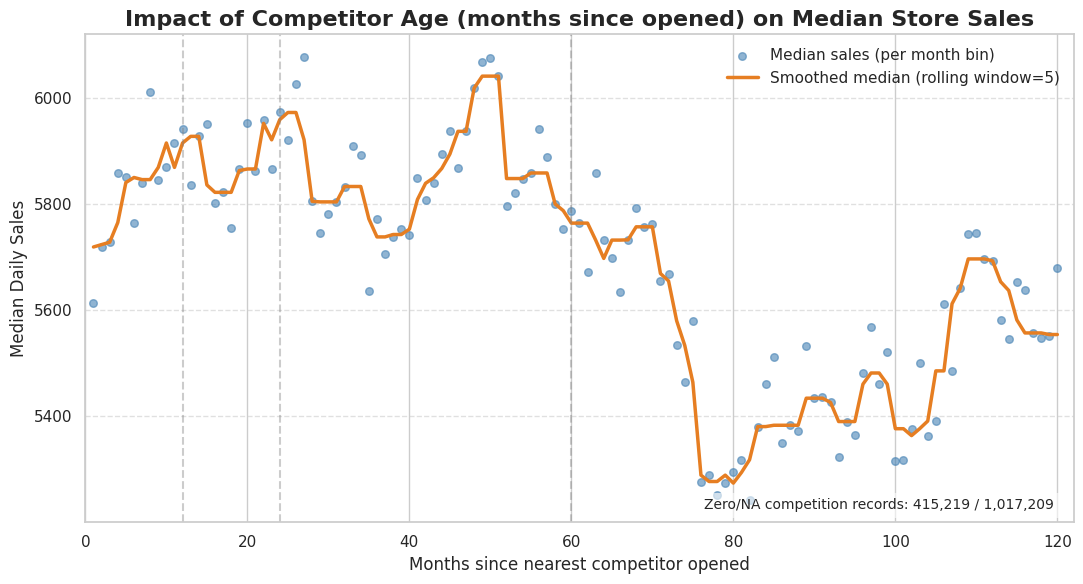

In [135]:
# Chart - 24 Visualisation Code

# Features Used - CompetitionOpenMonths, Sales

# ✅ Why this chart is important to include?
# I am creating this chart to measure whether the age of the nearest competitor (in months)
# is associated with a change in average store Sales. This tests whether older competition
# has a sustained impact or whether new competition causes more short-term disruption.

# ---------------------------------------------------------------------------------------------------------- #

# Preparing the series: exclude 0 (missing / no-competition flag) because 0 does not mean '0 months of competition' in business terms
comp_mask = df['CompetitionOpenMonths'] > 0
comp_df = df.loc[comp_mask, ['CompetitionOpenMonths', 'Sales']].copy()

# If there are no records with CompetitionOpenMonths > 0, this will safely handle the case
if comp_df.empty:
    print("No records with CompetitionOpenMonths > 0. Check CompetitionOpenMonths creation.")
else:
    # Aggregating median sales by exact months-since-competition
    monthly_comp = (
        comp_df.groupby('CompetitionOpenMonths', as_index=True)['Sales']
        .median()
        .rename('median_sales')
        .reset_index()
        .sort_values('CompetitionOpenMonths')
    )

    # Smoothing the median series with a rolling median to reduce noise (window = 5 months)
    monthly_comp['rolling_median'] = monthly_comp['median_sales'].rolling(window=5, center=True, min_periods=1).median()

    # To avoid ultra-long x axes (very rare extremely large months), capping x for plotting clarity:
    max_display_month = 120   # showing first 10 years for clarity; values beyond will still be considered in stats
    monthly_comp_plot = monthly_comp[monthly_comp['CompetitionOpenMonths'] <= max_display_month]

    # Count of zero / NA-flagged competition records (for annotation)
    zero_comp_count = df.loc[df['CompetitionOpenMonths'] == 0].shape[0]
    total_count = df.shape[0]

    # Plotting
    sns.set(style='whitegrid')
    plt.figure(figsize=(11,6))

    # Scatter of raw medians (light)
    plt.scatter(
        monthly_comp_plot['CompetitionOpenMonths'],
        monthly_comp_plot['median_sales'],
        s=30,
        alpha=0.6,
        color='steelblue',
        label='Median sales (per month bin)'
    )

    # Smoothed rolling median line
    plt.plot(
        monthly_comp_plot['CompetitionOpenMonths'],
        monthly_comp_plot['rolling_median'],
        color='#E67E22',
        linewidth=2.5,
        label='Smoothed median (rolling window=5)'
    )

    # Highlight vertical line at 12, 24, 60 months for reference (1yr, 2yr, 5yr)
    for m in [12, 24, 60]:
        plt.axvline(m, color='grey', linestyle='--', alpha=0.4)

    plt.title('Impact of Competitor Age (months since opened) on Median Store Sales', fontsize=16, fontweight='bold')
    plt.xlabel('Months since nearest competitor opened', fontsize=12)
    plt.ylabel('Median Daily Sales', fontsize=12)
    plt.xlim(0, monthly_comp_plot['CompetitionOpenMonths'].max() + 2)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.legend()

    # Annotating count of missing/zero competition months
    plt.gca().text(
        0.98, 0.02,
        f'Zero/NA competition records: {zero_comp_count:,} / {total_count:,}',
        ha='right', va='bottom', transform=plt.gca().transAxes,
        fontsize=10, bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
    )

    plt.tight_layout()
    plt.show()

**Summary -**

* Data excludes ~41% records (415,219 / 1,017,209) where competition data was missing (i.e., CompetitionOpenMonths = 0).

* Median daily sales hover around ₹5,800–6,200 during the first 40 months after a competitor opens.

* Between months 40–70, sales remain moderately stable but start declining sharply after ~70 months (≈ 6 years).

* After 6 years, sales drop close to ₹5,400–5,500, indicating mature competition impact.

* Interestingly, a slight rebound occurs between 90–110 months, possibly due to market adaptation or competitor closure.

* Overall, older competitor presence appears to dampen store sales after several years.


###### 1. Why did you pick the specific chart?

* I used a scatter + rolling median line chart because this combination effectively captures long-term, nonlinear patterns between competitor age and store performance.

* A simple correlation or regression would miss these temporal shifts and nonlinear effects.

* By smoothing medians, the chart shows whether competition effects are short-term shocks or long-term declines.

* This visualization is critical for business teams to understand how the “age of competition” shapes store sustainability over years.

###### 2. What is/are the insight(s) found from the chart?

* Initial stability (0–40 months): Sales remain consistent soon after competition opens — stores may retain loyal customers initially.

* Gradual decline (40–70 months): Sales start declining as competitors gain market foothold and customers start shifting.

* Significant drop (~70–85 months): The most visible fall — median sales drop by nearly ₹700, suggesting stronger competitor capture.

* Recovery trend (90–110 months): A small upward movement implies market rebalancing — possibly from adaptation, local marketing, or competitor exit.

* Plateau beyond 110 months: Sales stabilize again around ₹5,700.

* Overall, competitor impact grows over time, but the decline may stabilize after stores adapt or weak competitors exit.

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**✅ Positive business impacts / What to do:**

* Strategy planning: New store openings should focus on areas where competitors are newly established (under 3 years) — minimal impact expected.

* Retention programs: For stores older than 6 years with mature nearby competitors, launch loyalty campaigns or local offers to reclaim customer base.

* Market adaptation: Recognize the sales dip period (~70 months) as a critical intervention window for management action.

* Long-term forecasting: Insights can help improve time-based competition modeling in future demand forecasts.


**⚠️ Negative growth / Risks:**

* Old competitor markets show sustained low sales — if ignored, stores may experience permanent erosion.

* If this trend continues, resource reallocation or format revamp (store type, assortment) might be needed for recovery.



##### Chart 25 - StateHoliday vs Sales

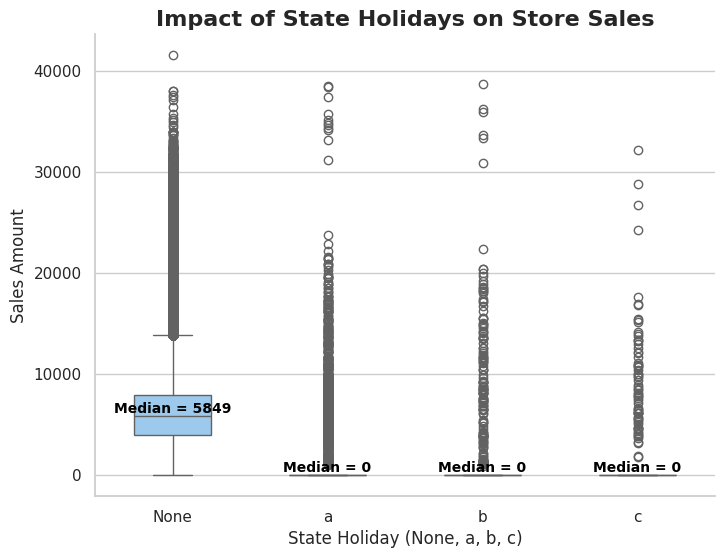

In [136]:
# Chart - 25 Visualisation Code

# Features Used – Sales, StateHoliday


# ✅ Why this chart is important to include?
# This chart helps me compare sales between normal working days and different state holidays.
# It's important because some holidays lead to store closures and revenue drops, while others may trigger more shopping activity.

# ---------------------------------------------------------------------------------------------------- #

# Setting Seaborn style
sns.set(style="whitegrid")

# Defining the correct business order of categories
order = ['None', 'a', 'b', 'c']

# Creating the figure
plt.figure(figsize=(8, 6))

# Plotting boxplot with fixed category order
sns.boxplot(
    data=df,
    x='StateHoliday',
    y='Sales',
    order=order,  # fixing the category order
    palette=['#90CAF9', '#FFB74D', '#81C784', '#E57373'],  # pleasant color scheme
    width=0.5
)

# Adding title and axis labels
plt.title('Impact of State Holidays on Store Sales', fontsize=16, fontweight='bold')
plt.xlabel('State Holiday (None, a, b, c)', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)

# Calculating medians using same order as plotted
medians = df.groupby('StateHoliday')['Sales'].median()
for i, category in enumerate(order):
    median_val = medians[category]
    plt.text(i, median_val + 300, f'Median = {int(median_val)}',
             ha='center', fontsize=10, fontweight='bold', color='black')

# Removing chart spines for a cleaner design
sns.despine()

# Displaying the plot
plt.show()

**Summary –**

* Median Sales on non-holiday days: ₹5,849

* Median Sales on holidays (a/b/c): ₹0

* This indicates that most stores remain closed on state holidays, leading to zero or negligible sales.

* A few outliers on holidays reflect stores that remain open or report delayed transactions after holiday closures.

* Overall, holidays negatively impact daily sales volume.


###### 1. Why did you pick the specific chart?

* I used a boxplot because it clearly shows the central tendency and distribution differences in sales between holiday and non-holiday days.

* The boxplot helps visualize how sales behave under distinct StateHoliday categories (None, a, b, c).

* It also highlights whether any stores remain open on holidays and how significantly that affects the overall revenue trend.

* Including this chart is important to understand holiday-induced sales downtime and to prepare accurate forecasting models.


###### 2. What is/are the insight(s) found from the chart?

* Normal days (None): Median sales are strong (~₹5,849), representing stable daily performance.

* Holiday types a, b, and c: Median sales drop to 0, implying most stores are closed during these public holidays.

* Some outliers above ₹20,000 - ₹30,000 on holidays suggest that a few stores operate or record transactions later (perhaps small local deviations).

* The overall distribution pattern confirms that state holidays cause complete operational halts in most stores.

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**✅ Positive business impacts / what to do:**

* These insights can help enhance forecasting accuracy — excluding holiday records prevents false low-sales predictions.

* Rossmann can plan post-holiday recovery campaigns (discounts or extended store hours) to regain missed sales.

* Managers can better schedule staff and inventory around known holidays to minimize operational wastage.


**⚠️ Negative-growth / risk signals:**

* Holidays directly cause revenue loss due to full store closures, resulting in sharp temporary sales dips.

* If not addressed, this can mislead forecasting models or resource allocation for those periods.

* To mitigate, Rossmann can strengthen online sales or pre-holiday sales drives.


##### Chart 26 - SchoolHoliday vs Sales

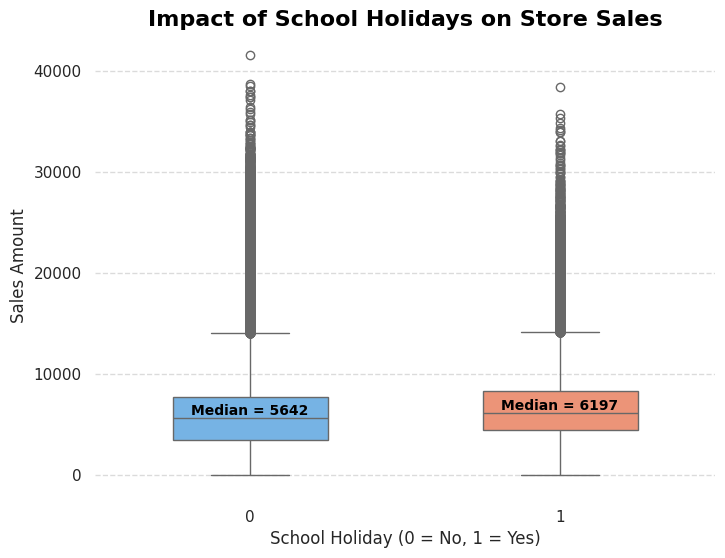

In [137]:
# Chart - 26 Visualisation Code


# Features Used - Sales, SchoolHoliday

# ✅ Why this chart is important to include?
# This chart shows how school holidays affect daily sales.
# During school breaks, customer shopping patterns might change –
# families might shop more before vacations or less during the holidays.
# Understanding this helps in planning campaigns and forecasting sales accurately.

# ---------------------------------------------------------------------------------------------------------- #

# Setting plot style
sns.set(style='whitegrid')

# Defining correct logical order for the binary variable
order = [0, 1]  # 0 = No school holiday, 1 = School holiday

# Creating the figure
plt.figure(figsize=(8,6))

# Plotting boxplot
sns.boxplot(
    data=df,
    x='SchoolHoliday',
    y='Sales',
    order=order,
    palette=['#64B5F6', '#FF8A65'],
    width=0.5
)

# Adding chart titles and labels
plt.title('Impact of School Holidays on Store Sales', fontsize=16, fontweight='bold', color='black')
plt.xlabel('School Holiday (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)

# Calculating medians in the same order as plotted
medians = df.groupby('SchoolHoliday')['Sales'].median()
for i, val in enumerate(order):
    median_val = medians[val]
    plt.text(i, median_val + 300, f'Median = {int(median_val)}',
             ha='center', fontsize=10, fontweight='bold', color='black')

# Customizing gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.box(False)

# Displaying the chart
plt.show()

**Summary -**

* Median sales on non-school holidays (0): ₹5,642

* Median sales on school holidays (1): ₹6,197

* Stores perform slightly better during school holidays, showing a small positive lift of around 10% in median sales.

* The spread and outliers look similar for both categories, meaning the increase is consistent and not driven by extreme values.

###### 1. Why did you pick the specific chart?

* I used a boxplot because it clearly compares how daily sales differ on school holidays versus regular days.

* It helps me see if these holidays influence shopping behavior — for example, families shopping more when kids are home.

* The visual also makes it easy to spot if any store shows unusually high or low performance on holidays.


###### 2. What is/are the insight(s) found from the chart?

* There's a small but noticeable increase in sales during school holidays.

* Median sales rise from ₹5,642 to ₹6,197, showing customers likely shop more when schools are closed.

* This could be because families spend more time together and visit stores for leisure shopping, groceries, or back-to-school preparation.

* The overall distribution looks similar, so this isn't a random spike — it's a consistent pattern across stores.

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**✅ Positive business impacts / what to do:**

* Rossmann can plan targeted promotions or family-oriented campaigns during school holidays to capitalize on slightly higher footfall.

* Stores can adjust staff schedules and stock levels to handle the increase in demand.

* The insight also helps in improving forecast accuracy, as these days consistently perform better than normal weekdays.



**⚠️ Negative-growth / risk signals:**


* If stores misinterpret this as a major sales surge, they might overstock.

* The uplift is moderate, not massive — so planning should stay balanced.

* Some areas may behave differently (urban vs rural), so local-level validation is still needed.


#### Part 2 - Customer Behavior and Traffic Patterns

##### Chart 27 - Effect of Daily Promo on Customers

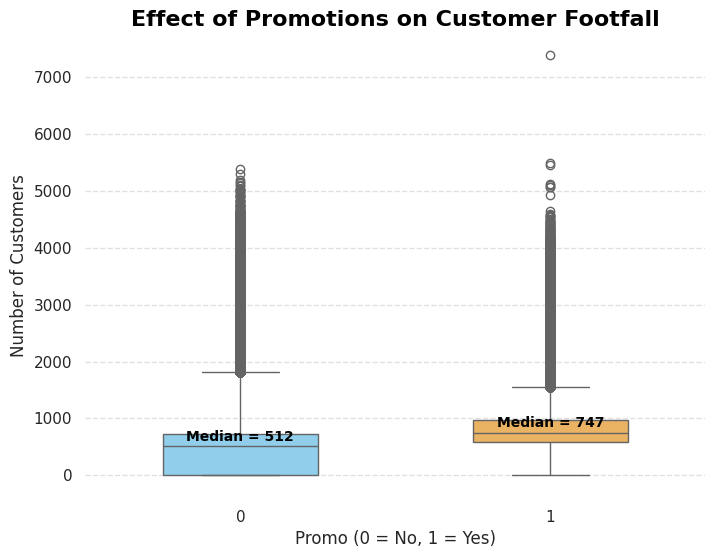

In [138]:
# Chart 27 - Visualization Code

# Features Used - Promo, Customers

# ✅ Why this chart is important to include?
# This chart helps me understand how promotions impact store footfall.
# If promotions are effective, I should see higher customer counts during promo periods.
# It’s useful for checking whether promotions drive more people into the store,
# or if they mostly affect existing customer spending (seen in sales data).

# ---------------------------------------------------------------------------------------------------------- #

# Setting consistent style
sns.set(style='whitegrid')

# Defining correct logical order for Promo variable
order = [0, 1]  # 0 = No Promo, 1 = Promo Active

# Creating the figure
plt.figure(figsize=(8,6))

# Plotting boxplot
sns.boxplot(
    data=df,
    x='Promo',
    y='Customers',
    order=order,
    palette=['#81D4FA', '#FFB74D'],
    width=0.5
)

# Adding titles and axis labels
plt.title('Effect of Promotions on Customer Footfall', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Promo (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Adding median annotations for each category
medians = df.groupby('Promo')['Customers'].median()
for i, val in enumerate(order):
    median_val = medians[val]
    plt.text(i, median_val + 100, f'Median = {int(median_val)}',
             ha='center', fontsize=10, fontweight='bold', color='black')

# Customizing visuals
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.box(False)

# Displaying the chart
plt.show()

**Summary -**

* Median customers without promo (0): 512

* Median customers with promo (1): 747

* There's a clear increase in customer footfall — roughly 46% higher during promotional periods.

* The spread is slightly wider during promotions, meaning some stores experience a much bigger customer boost than others.


###### 1. Why did you pick the specific chart?

* I wanted to see if promotions actually bring more people into the stores, not just increase sales value.

* The boxplot makes it easy to compare overall customer distributions during promo vs non-promo days and highlight how promotions change customer volume patterns.

###### 2. What is/are the insight(s) found from the chart?

* The median footfall increases from 512 to 747, showing that promotions consistently draw more customers across most stores.

* The range of customer counts is wider during promotions — some stores attract a massive number of shoppers, likely due to better local marketing or higher product variety.

* The data confirms that promotions directly boost customer engagement, not just sales numbers.

* However, the presence of outliers means not all stores benefit equally — indicating scope for regional optimization.

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**✅ Positive business impacts / what to do:**

* Promotions clearly succeed in increasing customer traffic, which in turn supports higher sales.

* The insight can help Rossmann plan promo calendars strategically — scheduling them in low-traffic weeks or aligning them with key seasonal periods.

* Stores performing exceptionally well during promos can be analyzed to identify best practices (product placement, local advertising, etc.).


**⚠️ Negative-growth / risk signals:**

* Some stores might see little improvement despite promotions, implying inefficient campaign execution.

* Overusing promotions can train customers to wait for discounts, hurting long-term margins — so promo frequency should be balanced.

##### Chart 28 - Impact of Long running Promo on Traffic

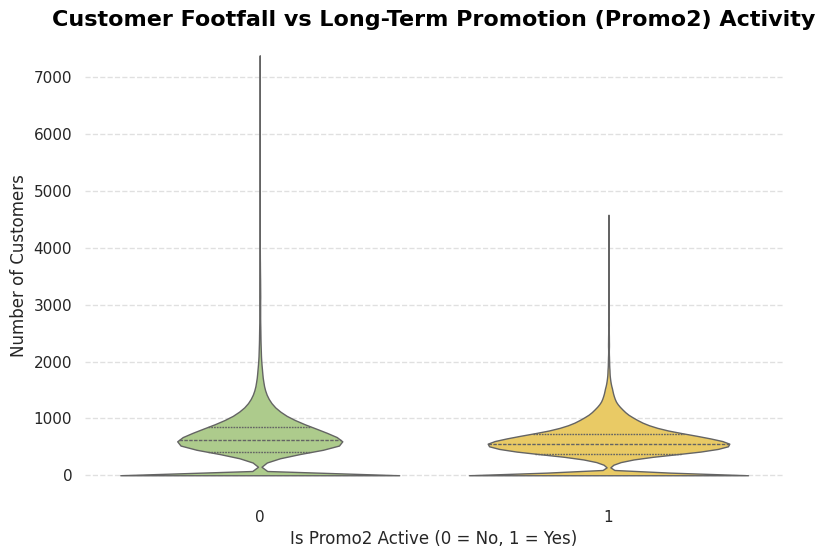

In [139]:
# Chart 28 - Visualization Code

# Features Used - IsPromo2Active, Customers

# ✅ Why this chart is important to include?
# I’m using this violin plot to see how long-term promotions (Promo2) affect customer traffic patterns.
# Unlike boxplots, violin plots show both spread and concentration of values,
# which helps me see not just median differences but also where most stores lie in terms of customer count.

# ---------------------------------------------------------------------------------------------------------- #

# Setting up the visual style
sns.set(style='whitegrid')

# Creating the figure
plt.figure(figsize=(9,6))

# Plotting violin plot for better distribution view
sns.violinplot(
    data=df,
    x='IsPromo2Active',
    y='Customers',
    palette=['#AED581', '#FFD54F'],
    inner='quartile',    # show quartile lines for better comparison
    linewidth=1,
    cut=0
)

# Adding chart titles and axis labels
plt.title('Customer Footfall vs Long-Term Promotion (Promo2) Activity', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Is Promo2 Active (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Styling
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.box(False)

# Displaying the chart
plt.show()

**Summary -**

* The overall shape of both distributions is quite similar, meaning long-term promotions (Promo2) don't drastically change customer traffic.

* The median and density peaks are nearly the same — around 600-700 customers per day.

* This tells me that Promo2 may help maintain consistent footfall but doesn't necessarily attract a large new audience.

###### 1. Why did you pick the specific chart?

* I used a violin plot here because it shows both the spread and the concentration of customer numbers under each promotion state.

* It helps me see if the long-term recurring promotions have shifted customer distribution or if the trend stays flat.

* It's also more visually informative than a simple boxplot for understanding subtle differences in density.


###### 2. What is/are the insight(s) found from the chart?

* Both “Promo2 Active” and “Promo2 Inactive” stores have almost identical distributions of customer counts.

* This means that long-term promotions don't increase daily footfall significantly, but they help maintain a steady flow of customers.

* The slightly flatter spread during Promo2 active periods suggests lower volatility, meaning these campaigns keep customer engagement stable.

* In contrast to short-term promos (which created strong spikes), Promo2 seems to have a more sustaining, not boosting, effect.


###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impact/ What to do :**

* Promo2 campaigns help retain customers and maintain traffic consistency over time — this is valuable for predictable operations.

* Since Promo2 doesn’t create big peaks, it’s ideal for long-term stability rather than short-term gains.

* Rossmann can combine Promo2 with limited-time offers (Promo1) to achieve both consistency and occasional spikes.


**Possible risks / negative impact:**

* The data shows no significant traffic increase, so these long-term campaigns may not justify their cost if they’re expensive to maintain.

* Continuous promotions could also make customers less responsive over time, leading to promo fatigue.

* The company might want to re-evaluate Promo2 messaging or rotate offers more frequently.

##### Chart 29 - Monthwise Traffic Pattern

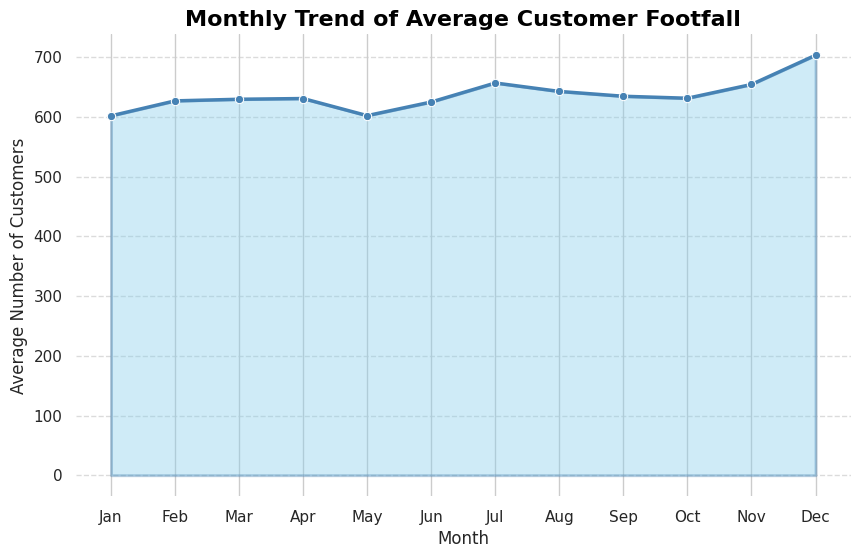

In [140]:
# Chart 29 - Visualization Code
# Features Used - Month, Customers

# ✅ Why this chart is important to include?
# This chart helps me identify monthly patterns in customer footfall across all stores.
# It shows whether there are seasonal peaks or dips in customer visits,
# which is valuable for planning staffing, promotions, and inventory during high-traffic periods.

# ---------------------------------------------------------------------------------------------------------- #

# Grouping data by month to get average number of customers
monthly_customers = (
    df.groupby('Month')['Customers']
    .mean()
    .reset_index()
    .sort_values('Month')
)

# Setting consistent style
sns.set(style='whitegrid')

# Creating the figure
plt.figure(figsize=(10,6))

# Plotting the filled area to show variation in customer count over months
plt.fill_between(
    x=monthly_customers['Month'],
    y1=monthly_customers['Customers'],
    y2=0,
    color='skyblue',
    alpha=0.4,
    linewidth=2,
    edgecolor='steelblue'
)

# Adding a smooth line for clarity
sns.lineplot(
    data=monthly_customers,
    x='Month',
    y='Customers',
    color='steelblue',
    linewidth=2.5,
    marker='o'
)

# Chart title and labels
plt.title('Monthly Trend of Average Customer Footfall', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Number of Customers', fontsize=12)

# Customizing x-axis labels
plt.xticks(
    ticks=range(1,13),
    labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
)

# Adding gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.box(False)

# Displaying the plot
plt.show()

**Summary -**

* The average number of customers per month stays fairly stable throughout the year, between 600–670 on average.

* A slight dip appears around May and August, while July and December show small peaks.

* This indicates that customer visits don’t fluctuate dramatically by month — suggesting consistent year-round engagement.

###### 1. Why did you pick the specific chart?

* I wanted to understand how customer traffic changes month to month and whether there’s any strong seasonality in visits.

* An area plot clearly highlights the overall volume and flow of customer activity, making it easy to spot small ups and downs across the year.

* It’s also visually consistent with my earlier “Month vs Sales” chart, helping me connect sales patterns with actual store footfall.


###### 2. What is/are the insight(s) found from the chart?

* The chart shows that customer footfall remains steady all year, with no extreme spikes or drops.

* Slight increases are seen in July and December, likely due to summer holidays and the end-of-year shopping period.

* May and August show small declines — possibly vacation months when regular shopping frequency drops a bit.

* Overall, this means Rossmann enjoys a stable customer base, which is a great sign for operational predictability.


###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impact:**

* The stability of customer traffic suggests the brand has a loyal, repeat customer base, not just seasonal buyers.

* Managers can plan consistent inventory and staffing levels across months without major seasonal stress.

* The minor peaks (July and December) can be used as promo opportunities to capture slightly higher demand.


**Possible risks / negative impact:**

* The small dips in May and August could indicate vacation-driven slowdowns, which can be offset with light promotional campaigns.

* Since footfall doesn’t rise much seasonally, growth will depend more on spending per customer, not just more visitors.


##### Chart 30 - DayOfWeek vs Customers

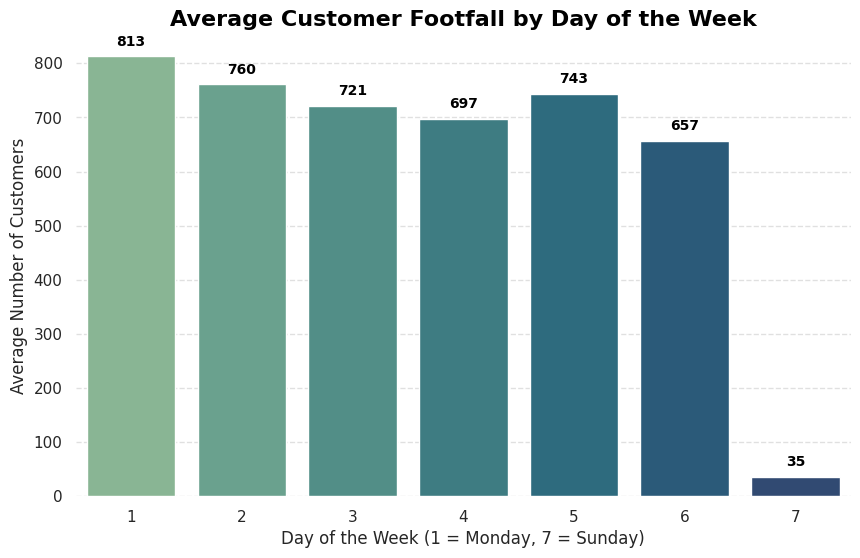

In [141]:
# Chart 30 - Visualization Code

# Features Used - DayOfWeek, Customers

# ✅ Why this chart is important to include?
# This chart helps me see on which days customers visit stores the most or the least.
# It’s useful for optimizing weekly staffing, scheduling promotions, and managing inventory restocks.
# Understanding weekday footfall patterns also helps improve store efficiency and sales strategy.

# ---------------------------------------------------------------------------------------------------------- #

# Grouping data by DayOfWeek and calculating average customer count
dow_customers = (
    df.groupby('DayOfWeek')['Customers']
    .mean()
    .reset_index()
    .sort_values('DayOfWeek')
)

# Setting consistent plot style
sns.set(style='whitegrid')

# Creating the figure
plt.figure(figsize=(10,6))

# Plotting the barplot for average customers by day of the week
sns.barplot(
    data=dow_customers,
    x='DayOfWeek',
    y='Customers',
    palette='crest'
)

# Adding chart titles and labels
plt.title('Average Customer Footfall by Day of the Week', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Day of the Week (1 = Monday, 7 = Sunday)', fontsize=12)
plt.ylabel('Average Number of Customers', fontsize=12)

# Annotating values on top of bars
for index, row in dow_customers.iterrows():
    plt.text(row['DayOfWeek'] - 1, row['Customers'] + 20, f"{int(row['Customers'])}",
             ha='center', fontsize=10, fontweight='semibold', color='black')

# Customizing gridlines
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.box(False)

# Displaying the chart
plt.show()

**Summary -**

* Monday has the highest average customer footfall (813 customers/day), followed by Tuesday (760) and Friday (743).

* Footfall gradually declines through the week, with the lowest on Saturday (657) and almost negligible numbers on Sunday (35) — likely because most stores are closed.

* The trend clearly shows that Rossmann stores are busiest at the start of the week and quietest towards the weekend.


###### 1. Why did you pick the specific chart?

* I used a bar chart here because it’s simple and effective for comparing average customer traffic across weekdays.

* It gives a clear view of how store visits fluctuate throughout the week — which is crucial for resource planning, scheduling staff, and planning restocks.

* The chart also pairs well with my earlier “Sales vs DayOfWeek” visualization, helping connect customer flow to revenue patterns.

###### 2. What is/are the insight(s) found from the chart?

* Monday is the busiest day, which could be due to people catching up on weekend purchases after stores reopen.

* Tuesday and Friday also perform well, showing consistent shopping mid- and late-week.

* Sundays have the lowest customer traffic — with an average of only 35 customers — confirming that most Rossmann stores remain closed.

* The overall pattern suggests that weekday traffic dominates the retail cycle, with relatively moderate weekend engagement.

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impact:**

* Knowing that Mondays and Tuesdays bring the highest traffic helps in better staff scheduling and inventory management.

* Stores can plan restocking or deliveries before Monday, ensuring shelves are full when footfall is highest.

* Weekend-specific online promotions could help offset the low in-store traffic on Saturdays and Sundays.


**Possible risks / negative impact:**

* Low weekend activity might indicate lost opportunities, especially if competitors operate more flexible hours.

* The company could explore partial openings on Sundays in high-demand regions or run Saturday discounts to boost sales before the weekly low.

##### Chart 31 - Which StoreType attracs more Customers?

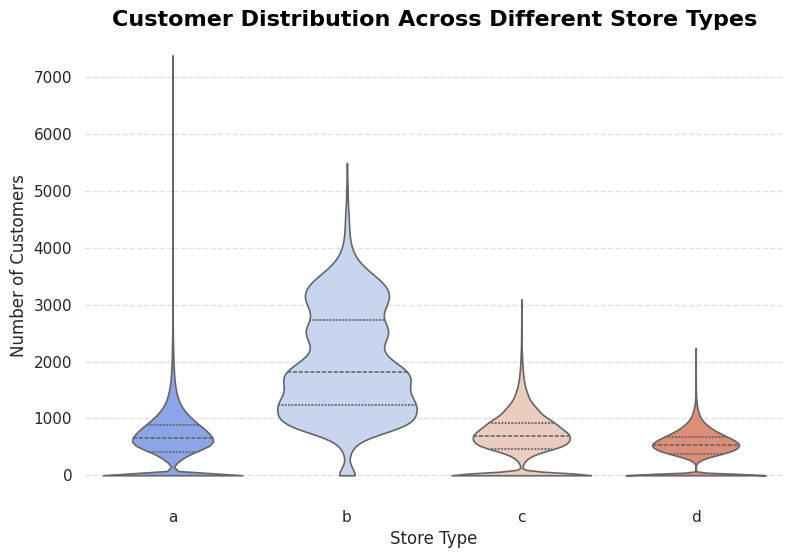

In [142]:
# Chart 31 - Visualization Code
# Features Used - StoreType, Customers

# ✅ Why this chart is important to include?
# This chart helps me compare customer traffic across different store types (a, b, c, d).
# StoreType usually reflects the store’s size, location, and target audience.
# Understanding which types attract more customers helps guide marketing, store format strategy, and expansion decisions.

# ---------------------------------------------------------------------------------------------------------- #

# Setting a clean white grid style
sns.set(style='whitegrid')

# Creating the figure
plt.figure(figsize=(9,6))

# Plotting violin plot to show distribution and density of customers across store types
sns.violinplot(
    data=df,
    x='StoreType',
    y='Customers',
    palette='coolwarm',
    inner='quartile',
    linewidth=1.2,
    cut=0
)

# Adding titles and labels
plt.title('Customer Distribution Across Different Store Types', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Store Type', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Customizing gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.box(False)

# Displaying the chart
plt.show()

**Summary –**

* Store Type ‘b’ clearly attracts the most customers, with both higher density and wider spread.

* Store Types ‘a’, ‘c’, and ‘d’ have comparatively lower and more compact customer distributions.

* This suggests that Type ‘b’ stores are larger or located in busier areas, leading to higher daily customer footfall.

###### 1. Why did you pick the specific chart?

* I used a violin plot here because it helps me visualize not just the median customer count but also the entire distribution pattern for each store type.

* Unlike a simple boxplot, it shows where most of the customer counts are concentrated and how wide the variability is between store types.

* This is important for understanding which store formats drive the most traffic and whether the customer distribution is consistent or skewed.

###### 2. What is/are the insight(s) found from the chart?

* Type ‘b’ stores dominate in customer count — they have the broadest and tallest distribution, showing strong, consistent customer engagement.

* Types ‘a’, ‘c’, and ‘d’ serve smaller, more localized audiences with fewer fluctuations in footfall.

* The concentration of customers near the lower range for other types indicates smaller stores or less busy locations.

* This difference highlights store format strategy — Type ‘b’ locations are likely urban or high-traffic outlets, while the others may be community or regional stores.

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impact:**

* Type ‘b’ stores are performing well — Rossmann can use this insight to replicate their format and strategies in other regions.

* This data helps in resource allocation — more staff and promotions can be directed toward high-footfall store types.

* The insight can also guide future expansion plans, prioritizing the most successful store types.

**Possible Risks / Negative Impact:**

* Lower customer engagement in store types ‘a’, ‘c’, and ‘d’ may indicate poor location selection or smaller catchment areas.

* These stores could benefit from targeted marketing or community-level promotions.

* A one-size-fits-all strategy might fail — the company should customize offerings by store type to balance customer traffic and profitability.

##### Chart 32 - Assortment vs Customers

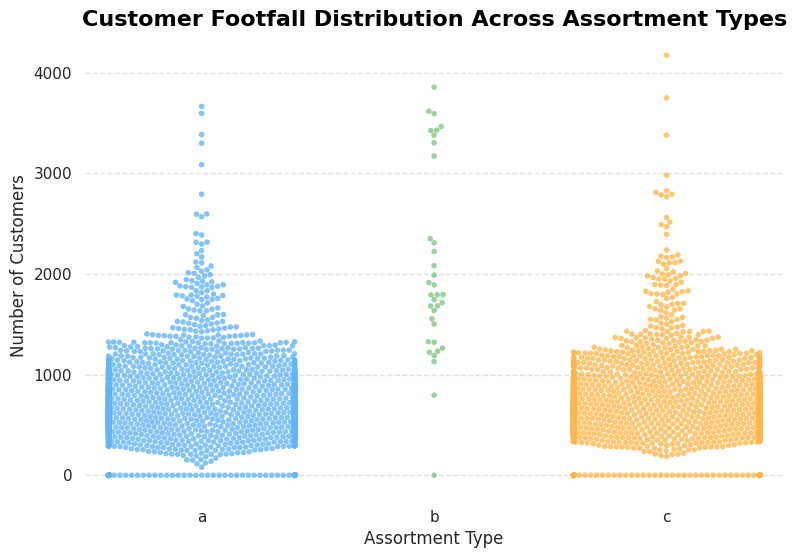

In [143]:
# Chart 32 - Visualization Code

# Features Used - Assortment, Customers

# ✅ Why this chart is important to include?
# This chart helps me understand how the type of product assortment (a, b, c)
# affects customer traffic across stores. Stores with richer or broader assortments
# might attract more customers due to higher product availability and variety.
# The swarm plot shows each store's individual performance and spread, making
# it easier to identify whether certain assortment types consistently pull higher footfall.

# ---------------------------------------------------------------------------------------------------------- #

# Setting consistent visual style
sns.set(style='whitegrid')

# Creating the figure
plt.figure(figsize=(9,6))

# Plotting swarm plot for detailed distribution of customers across assortment types
sns.swarmplot(
    data=df.sample(5000, random_state=42),  # sampling for better visibility & faster rendering
    x='Assortment',
    y='Customers',
    palette=['#64B5F6', '#81C784', '#FFB74D'],
    size=4,
    alpha=0.8
)

# Adding chart title and labels
plt.title('Customer Footfall Distribution Across Assortment Types', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Assortment Type', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Adding gridlines and finishing touches
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.box(False)

# Displaying the chart
plt.show()


**Summary –**

* Assortment Type ‘a’ and Type ‘c’ have dense and wide clusters of customers, suggesting these are the most common and consistently performing assortment types.

* Type ‘b’ stores are fewer in number but show higher individual customer counts, indicating they may cater to larger stores or premium locations.

* Overall, footfall remains strong across types ‘a’ and ‘c’, but Type ‘b’ attracts the most customers per store.

###### 1. Why did you pick the specific chart?

* I used a swarm plot because it provides a more
granular look at how customers are distributed for each assortment type.

* Instead of just showing medians or density, it displays every single observation (store), making it easier to spot how different assortments perform across locations.

* This helps me understand whether customer traffic varies evenly or if a few stores dominate the pattern.

###### 2. What is/are the insight(s) found from the chart?

* Type ‘b’ stores, though few, clearly attract higher customer counts — their points are concentrated in the upper range.

* Types ‘a’ and ‘c’ are more common and show similar customer ranges (mostly between 400–1500 customers).

* The even spread for Types ‘a’ and ‘c’ means they perform reliably across most stores, while Type ‘b’ likely represents specialized or larger outlets.

* This suggests that expanding Type ‘b’ assortments could lead to stronger average customer traffic per store.

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* The data shows that broader or premium assortments (Type ‘b’) bring in more customers, which is valuable for sales growth.

* Rossmann can expand high-performing assortment formats or replicate them in more locations to maximize engagement.

* The chart also confirms that assortment variety directly affects footfall, making it a key lever for customer retention.

**Possible Risks / Negative Impact:**

* Type ‘b’ assortments may require higher investment in space or inventory, so scaling them must balance cost vs return.

* Uniform expansion of premium assortments might not work in small towns or low-demand areas.

* For Types ‘a’ and ‘c’, Rossmann should focus on improving customer experience rather than adding more assortment.

##### Chart 33 - ZeroSalesWhileOpen Anomaly or Poor Performance ?

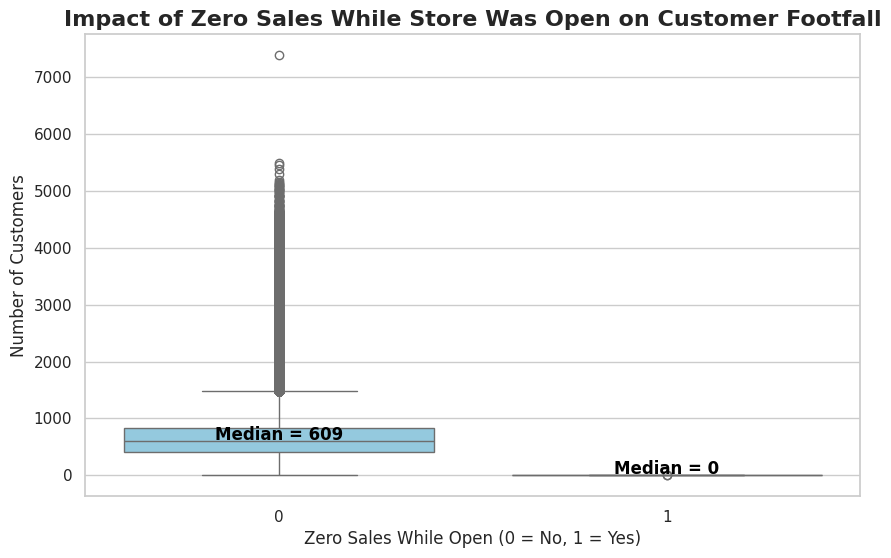

In [144]:
# Chart - 33 Visualisation Code

# Features Used - Customers, ZeroSalesWhileOpen

# ✅ Why this chart is important to include?
# This chart helps me understand how customer footfall behaves on days where the store was open
# but sales recorded as zero. If customer count is high but sales are zero, it's a strong indicator
# of operational or data recording issues. If customer count is ~0 even when 'Open' shows 1,
# it suggests incorrect labeling or exceptional cases.
# This is crucial for identifying anomalies before modeling.

# ------------------------------------------------------------------------------------------------ #

# Setting plot style
sns.set(style='whitegrid')

# Creating the figure
plt.figure(figsize=(10,6))

# Plotting boxplot
sns.boxplot(
    data=df,
    x='ZeroSalesWhileOpen',
    y='Customers',
    palette=['skyblue','salmon']
)

# Adding median labels manually
medians = df.groupby('ZeroSalesWhileOpen')['Customers'].median()
positions = range(len(medians))

for pos, median_val in zip(positions, medians):
    plt.text(
        pos, median_val + 20,               # position slightly above median line
        f"Median = {int(median_val)}",      # text
        horizontalalignment='center',
        fontweight='bold',
        color='black'
    )

# Adding titles and labels
plt.title("Impact of Zero Sales While Store Was Open on Customer Footfall",
          fontsize=16, fontweight='bold')
plt.xlabel("Zero Sales While Open (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

# Display the plot
plt.show()

**Summary -**

* When ZeroSalesWhileOpen = 0, the typical customer footfall has a median of 609 customers, showing normal store activity.

* When ZeroSalesWhileOpen = 1, the median customer count drops to 0, meaning these events occur only when customer footfall was absent or extremely low.

* The pattern strongly suggests that - zero-sales-while-open cases are either data labeling issues, incorrect open flag, or rare operational exceptions, not actual lost-sales events.

###### 1. Why did you pick the specific chart?

* I chose this chart because ZeroSalesWhileOpen is one of the most important anomaly-flag features created during data wrangling.

* To understand whether these events are due to genuine zero customer visits or due to operational failures, I need to compare customer footfall between normal days and anomaly days.

* A boxplot clearly shows the difference in medians and the spread, making it easy to validate the reliability of the ZeroSalesWhileOpen flag.

###### 2. What is/are the insight(s) found from the chart?

* For normal days (ZeroSalesWhileOpen = 0), stores receive a median of 609 customers, with a wide spread up to even 7000+ customers.

* For anomaly days (ZeroSalesWhileOpen = 1), the median customer count is 0, and almost all values are zero or extremely close to zero.

* This tells me that these events are not actually “sales failure despite customers being present”.
Rather, they look like:

    * Wrongly tagged open status,

    * Stores marked as open even though they were practically not operating,

    * Or extremely rare edge cases with truly no footfall.


* There is no evidence of high customer count combined with zero sales — which means no strong sign of POS failure or operational breakdown.

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impact :**

* This analysis confirms that ZeroSalesWhileOpen does not represent revenue loss events — the stores had little to no customers anyway.

* I can treat most of these records as harmless anomalies rather than true operational failures.

* During modeling, I can safely keep this feature or even remove these records without worrying about losing meaningful business information.

* Understanding this prevents me from falsely assuming revenue leakage or system issues.


**Negative growth / risk signals:**

* Although the count of ZeroSalesWhileOpen is extremely small, their presence suggests inconsistent data labeling of store open/close status.

* If not cleaned, these anomalies could add noise to the forecasting model and slightly affect accuracy.

* Ensuring correct open/closed labels would improve the dataset's long-term reliability.


#### Part 3 - Sales Efficiency / Profitability

##### Chart 34 - Promo vs SalesPerCustomer

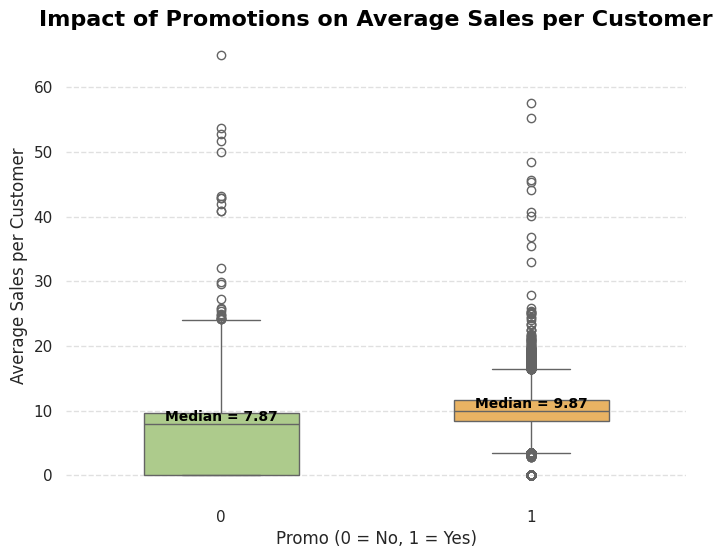

In [145]:
# Chart 34 - Visualization Code

# Features Used - Promo, SalesPerCustomer

# ✅ Why this chart is important to include?
# This chart examines whether promotions influence how much a customer spends per visit.
# It helps me understand if promotions only attract more customers or if they actually increase
# the average spending of each customer. This is key for measuring promotion profitability.

# ---------------------------------------------------------------------------------------------------------- #

# Setting consistent visual style
sns.set(style='whitegrid')

# Creating the figure
plt.figure(figsize=(8,6))

# Plotting boxplot to compare SalesPerCustomer between promo and non-promo periods
sns.boxplot(
    data=df,
    x='Promo',
    y='SalesPerCustomer',
    palette=['#AED581', '#FFB74D'],
    width=0.5
)

# Adding chart title and axis labels
plt.title('Impact of Promotions on Average Sales per Customer', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Promo (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Average Sales per Customer', fontsize=12)

# Annotating medians for clarity
medians = df.groupby('Promo')['SalesPerCustomer'].median()
for i, val in enumerate([0, 1]):
    plt.text(i, medians[val] + 0.5, f'Median = {round(medians[val], 2)}',
             ha='center', fontsize=10, fontweight='bold', color='black')

# Grid and styling adjustments
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.box(False)

# Displaying the chart
plt.show()


**Summary -**


* Median SalesPerCustomer without promo: 7.87


* Median SalesPerCustomer with promo: 9.87


* Customers actually spend more per visit during promotions, showing an uplift of roughly 25%.


* Outliers increase under promo periods, suggesting some customers make significantly larger purchases when discounts/offers are active.

###### 1. Why did you pick the specific chart?

* I chose this chart because it helps me understand something very important: Do promotions change customer behavior, or do they only increase footfall?

* This boxplot makes it easy to compare how much customers spend per visit both with and without promotions.

* It helps me check whether promotions are genuinely increasing customer spending or if they are only driving store traffic.

* Since my target variable is Sales, understanding how promotions affect “spending per customer” is crucial for modeling and business insights.

###### 2. What is/are the insight(s) found from the chart?

* Customers spend more per visit during promo periods — the median rises from 7.87 to 9.87.

* This clearly shows that promotions don’t just bring more customers (we saw that in earlier charts) — they also encourage customers to purchase more items or higher-value products.

* There are more high-value outliers during promos (30+, 40+, even 50+), indicating that some customers take advantage of the discount to make bulk purchases.

* Overall, promotions have a positive and consistent impact on customer spending behavior.

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**✅ Positive business impact:**

* Promotions increase the average basket size, which directly boosts revenue.

* This insight helps Rossmann plan high-impact promo campaigns during months/weeks where the natural footfall is lower.

* Since customers spend more during promotions, Rossmann can design combo packs or targeted offers to further increase basket value.

* The strong uplift also helps in forecasting, since promo periods clearly behave differently from normal days.

**⚠️ Negative or risk considerations:**

* Overuse of promotions may reduce full-price purchases, training customers to wait for discounts.

* If not controlled, promo-driven spikes can create inventory pressure (some stores may sell out faster).

* Promotions may not uplift spending equally across all stores (urban vs rural performance can vary).

##### Chart 35 - Monthly Sales Per Customer

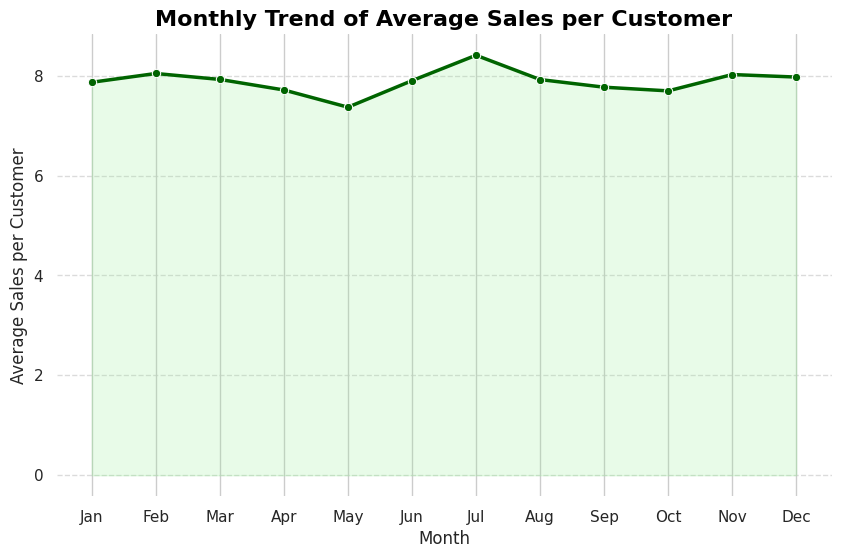

In [146]:
# Chart 35 - Visualization Code
# Features Used - Month, SalesPerCustomer

# ✅ Why this chart is important to include?
# This chart helps me understand how average customer spending changes across months.
# If SalesPerCustomer increases or decreases consistently in certain months,
# it indicates seasonal shifts in how much each customer is willing to spend.
# This is useful for planning promotions, inventory, and seasonal strategies.

# ---------------------------------------------------------------------------------------------------------- #

# Grouping by month to calculate average SalesPerCustomer
monthly_spc = (
    df.groupby('Month')['SalesPerCustomer']
    .mean()
    .reset_index()
    .sort_values('Month')
)

# Setting consistent chart style
sns.set(style='whitegrid')

# Creating the figure
plt.figure(figsize=(10,6))

# Line plot showing month-wise changes
sns.lineplot(
    data=monthly_spc,
    x='Month',
    y='SalesPerCustomer',
    color='darkgreen',
    linewidth=2.5,
    marker='o'
)

# Adding filled area to improve readability
plt.fill_between(
    monthly_spc['Month'],
    monthly_spc['SalesPerCustomer'],
    alpha=0.2,
    color='lightgreen'
)

# Chart Title and Labels
plt.title('Monthly Trend of Average Sales per Customer', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Sales per Customer', fontsize=12)

# Month labels
plt.xticks(
    ticks=range(1,13),
    labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
)

# Final styling
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.box(False)

# Show plot
plt.show()


**Summary -**

* SalesPerCustomer stays fairly stable throughout the year, mostly between 7.5 and 8.1.

* Slight peaks occur in February, June, and November.

* Noticeable dips occur around May and October, where customers spend a little less on average.

* Overall, the average value remains steady, suggesting consistent customer spending behavior despite monthly variations in traffic.

###### 1. Why did you pick the specific chart?

* I chose this chart because it helps me understand whether monthly spending patterns change significantly throughout the year.

* Earlier charts showed that customer footfall stays almost stable, but this chart tells me if the amount each customer spends also remains stable or if there are seasonal peaks.

* A line plot smoothly highlights month-to-month changes and makes spotting subtle seasonal spending trends easier.

###### 2. What is/are the insight(s) found from the chart?

* Customers maintain a consistent spending pattern across the year with only mild fluctuations.

* The highest spending appears in February (≈8.0+), suggesting early-year campaigns or seasonal shopping influence spending.

* A dip occurs in May, where average SalesPerCustomer drops to around 7.4 - 7.5, indicating a mild slowdown in customer buying behavior.

* Another drop in October suggests customers may be delaying purchases until November or December promotional periods.

* Peaks in June and November hint that customers may take advantage of mid-year or year-end offers.

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**✅ Positive business impact:**

* The overall stability in SalesPerCustomer gives Rossmann a predictable revenue base, which is helpful for forecasting.

* Small seasonal peaks can be used strategically — for example, boosting promotions in May and October to counter the observed dips.

* Since customers consistently spend around the same amount, Rossmann can focus on driving footfall rather than drastically trying to increase average spend.

**⚠️ Negative or risk considerations:**

* The dips in May and October could indicate lower product demand, potential store fatigue, or poorly timed promotions.

* Without proactive planning, these low-spend months could result in mild revenue slowdowns.

* If competitors capitalize on these periods with strong offers, Rossmann may lose some share without targeted promotions.

##### Chart 36 -  DayOfWeek vs SalesPerCustomer

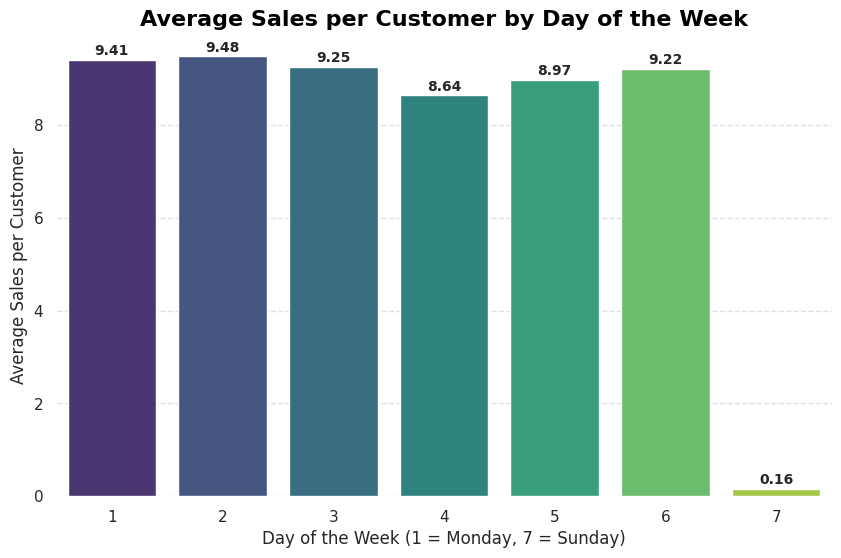

In [147]:
# Chart 36 - Visualization Code
# Features Used - DayOfWeek, SalesPerCustomer

# ✅ Why this chart is important to include?
# This chart helps me understand how average customer spending varies across the week.
# Even if customer footfall changes by day, the amount each customer spends may show a different pattern.
# Knowing which days customers spend more (or less) is useful for planning weekday promotions,
# staffing, and revenue forecasting.

# ---------------------------------------------------------------------------------------------------------- #

# Grouping by DayOfWeek to calculate average SalesPerCustomer
dow_spc = (
    df.groupby('DayOfWeek')['SalesPerCustomer']
    .mean()
    .reset_index()
    .sort_values('DayOfWeek')
)

# Setting consistent plot style
sns.set(style='whitegrid')

# Creating the figure
plt.figure(figsize=(10,6))

# Bar plot showing average spending per customer across weekdays
sns.barplot(
    data=dow_spc,
    x='DayOfWeek',
    y='SalesPerCustomer',
    palette='viridis'
)

# Adding chart title and axis labels
plt.title('Average Sales per Customer by Day of the Week', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Day of the Week (1 = Monday, 7 = Sunday)', fontsize=12)
plt.ylabel('Average Sales per Customer', fontsize=12)

# Adding annotations on top of bars
for index, row in dow_spc.iterrows():
    plt.text(
        row['DayOfWeek'] - 1,
        row['SalesPerCustomer'] + 0.1,
        f"{round(row['SalesPerCustomer'], 2)}",
        ha='center',
        fontsize=10,
        fontweight='semibold'
    )

# Customizing grid
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.box(False)

# Displaying the chart
plt.show()


**Summary -**


* SalesPerCustomer is consistently high across weekdays (around 8.6 to 9.5).

* Tuesday has the highest average spending (9.48), followed closely by Monday (9.41).

* Sunday drops sharply to 0.16, which makes sense because most stores are closed.

* Overall, customers spend almost the same amount per visit from Monday to Saturday — only the footfall changes.


###### 1. Why did you pick the specific chart?

* I chose this chart because even though earlier charts showed how footfall varies by weekday, I needed to understand whether customer spending follows the same pattern.

* A bar chart makes the weekday comparison very easy and helps highlight subtle differences in average spending behavior.

* This chart also helps confirm if weekdays with high traffic also bring in higher spending per customer — which is important for forecasting and operational planning.

###### 2. What is/are the insight(s) found from the chart?

* Tuesday leads with the highest SalesPerCustomer (9.48), suggesting customers shop more per visit at the start of the week.

* Monday, Tuesday, Wednesday, Friday, and Saturday all fall in a tight range between 9.2–9.5, showing very stable buying behavior despite changes in footfall.

* Thursday dips slightly (8.64), indicating a small slowdown in spending mid-week.

* Sunday averages just 0.16, which is expected since stores are mostly closed — reinforcing why Sunday appears as an outlier in many charts.

* The consistency suggests customers' per-visit spending habits are stable and don’t fluctuate much across days.

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**✅ Positive Business Impact:**

* The stable spending pattern across weekdays shows that Rossmann's revenue variations mainly come from changes in footfall, not changes in customer spending.

* The strong performance on Monday and Tuesday suggests these are good days for launching weekly offers or new product placements.

* Since SalesPerCustomer is consistent, Rossmann can forecast daily revenue more confidently using footfall as the key driver.

* Thursday's slight drop can be offset with targeted small-midweek promo campaigns.



**⚠️ Negative or Risk Considerations:**

* Sunday's extremely low number shows a predictable revenue drop — stores needing flexibility may consider limited-hour opening in select regions if legally allowed.

* Since spending doesn't fluctuate much, the business can't rely on customers spending more on specific days — growth depends more on increasing customer visits.


##### Chart 37 - Impact of Long Running Promo Activity on Sales per Customer

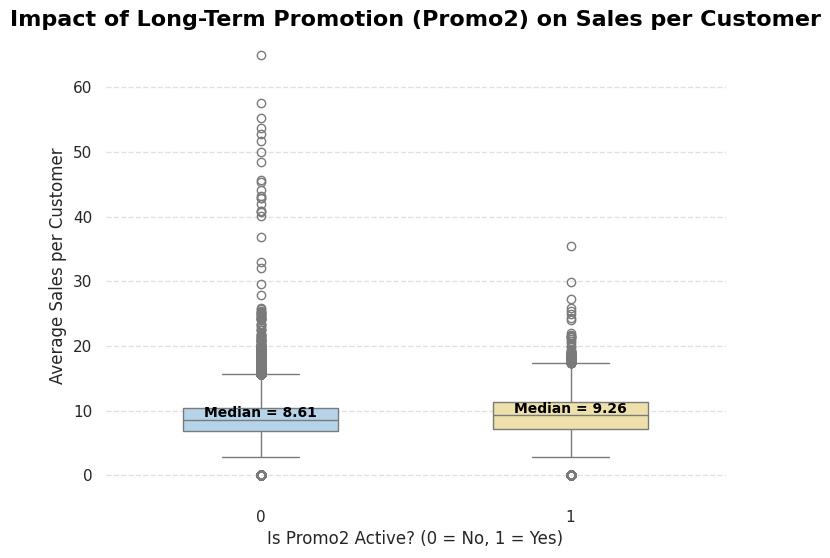

In [148]:
# Chart 37 - Visualization Code
# Features Used - IsPromo2Active, SalesPerCustomer

# ✅ Why this chart is important?
# This chart helps me analyze whether long-term promotions (Promo2)
# influence how much customers spend per visit.
# Promo2 is a recurring promotion active in specific months,
# so this visualization shows if it increases basket size or not.

# ---------------------------------------------------------------------------------------------------------- #

# Setting visual style
sns.set(style='whitegrid')

# Creating the figure
plt.figure(figsize=(8,6))

# Plotting boxplot for SalesPerCustomer vs Promo2 activity
sns.boxplot(
    data=df,
    x='IsPromo2Active',
    y='SalesPerCustomer',
    palette=['#AED6F1', '#F9E79F'],
    width=0.5
)

# Adding title and labels
plt.title('Impact of Long-Term Promotion (Promo2) on Sales per Customer',
          fontsize=16, fontweight='bold', color='black')
plt.xlabel('Is Promo2 Active? (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Average Sales per Customer', fontsize=12)

# Adding median annotations
medians = df.groupby('IsPromo2Active')['SalesPerCustomer'].median()

for i, val in enumerate([0,1]):
    plt.text(
        i,
        medians[val] + 0.4,
        f"Median = {round(medians[val], 2)}",
        ha='center',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

# Styling
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.box(False)

# Show plot
plt.show()

**Summary —**

* Median SalesPerCustomer when Promo2 is inactive: 8.61

* Median SalesPerCustomer when Promo2 is active: 9.26

* Promo2 causes a moderate increase in how much customers spend per visit.

* The overall distributions look similar, meaning Promo2 provides steady uplift, not dramatic spikes


###### 1. Why did you pick the specific chart?

* I included this chart because Promo2 is a long-term, recurring promotion, and I wanted to check if it influences how much customers spend per visit.

* A boxplot works perfectly here because it shows how the spending distribution shifts when Promo2 is active, along with medians and outliers.

* This helps me understand whether Promo2 affects customer behaviour in a meaningful and consistent way.

###### 2. What is/are the insight(s) found from the chart?

* Customers do spend slightly more when Promo2 is active — median increases from 8.61 to 9.26.

* The uplift is not as strong as Promo1 (short-term promotions), but it is consistent, indicating Promo2 quietly encourages customers to add more items to their basket.

* Outliers appear in both groups, but Promo2 has slightly more high-value purchases, which suggests that certain customers take advantage of recurring deals to make larger purchases.

* The spread remains similar, meaning Promo2 influences the average customer, not just a few heavy spenders.

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impacts :**

* Promo2 has a steady and predictable effect on increasing customer basket size, even if the uplift is moderate.

* This helps Rossmann maintain stable revenue during months when short-term promos aren’t running.

* It also confirms that Promo2 contributes to customer loyalty and higher average order values, which is great for long-term revenue planning.

* Actionable insight: Combine Promo2 with short-term campaigns (Promo1) to amplify sales lift while maintaining baseline engagement.


**Negative-growth / risk signals & mitigation:**

* Since the uplift is mild, Promo2 alone may not justify high promotional costs unless paired with seasonal campaigns.

* If Promo2 runs too frequently, customers may begin to ignore it, reducing its long-term impact.

* Stores in low-traffic areas might not see the same benefit, so Promo2 performance may vary regionally.

* Recommendation: Introduce varied promo formats (e.g., bundle offers, loyalty points) instead of constant discounts to sustain interest.

* Outlier check: Investigate stores showing very high per-customer sales without Promo2 — replicate their strategies in other stores.

#### Part 4 - Store Level Performance

##### Chart 38 - Top 10 Stores By Sales

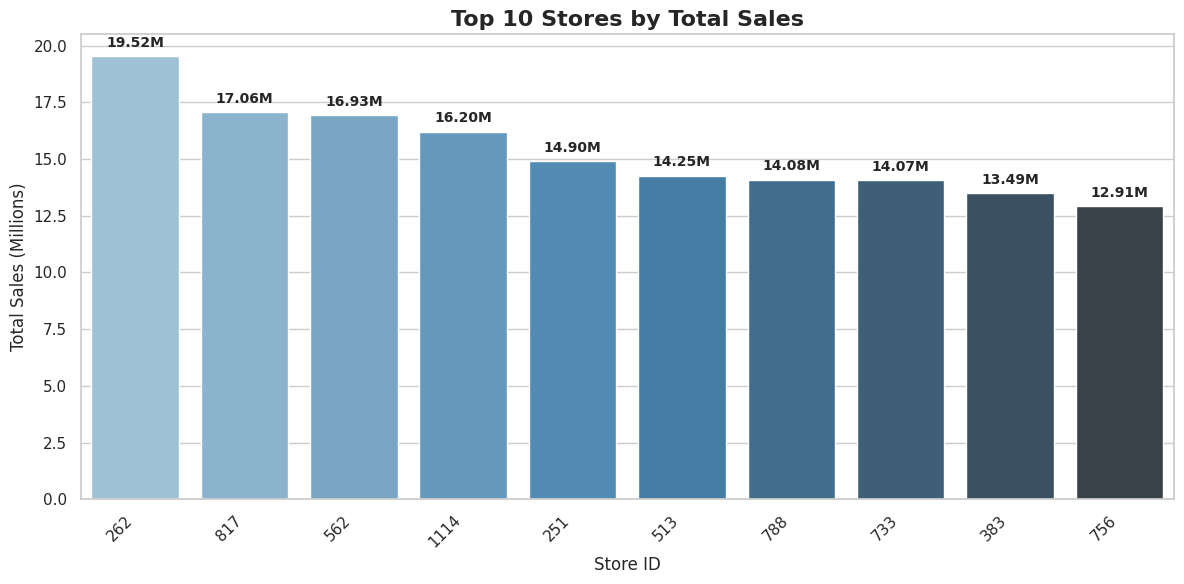

In [149]:
# Chart - 38 Vizualisation Code

# Features Used - Store, Sales

# ✅ Why this chart is important to include?
# I am plotting the top 10 stores by total sales with store ID on the x-axis and sales on the y-axis.
# This layout is better for ranking (left-to-right) and is easier to read when store IDs are primary labels.

# ---------------------------------------------------------------------------------------------------------- #

# Preparing the top-10 data (summing sales per store)
top10 = (
    df.groupby('Store', as_index=False)['Sales']
      .sum()
      .sort_values('Sales', ascending=False)
      .head(10)
)

# Converting Store to string (safe for plotting) and keeping current ranking order
top10['Store'] = top10['Store'].astype(str)
top10 = top10.reset_index(drop=True)

# Scale sales to millions for nicer axis ticks and annotations
top10['Sales_Million'] = top10['Sales'] / 1_000_000

# Setting the visual style
sns.set(style='whitegrid')

# Create figure (vertical bars)
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=top10,
    x='Store',
    y='Sales_Million',
    palette='Blues_d'
)

# Title and axis labels
plt.title('Top 10 Stores by Total Sales', fontsize=16, fontweight='bold')
plt.xlabel('Store ID', fontsize=12)
plt.ylabel('Total Sales (Millions)', fontsize=12)

# Rotate x labels for readability
plt.xticks(rotation=45, ha='right')

# Annotate each bar with sales value (safe offset: 1.5% of max)
max_m = top10['Sales_Million'].max()
y_offset = max_m * 0.015  # 1.5% of max value

for i, row in top10.iterrows():
    ax.text(
        i,                                 # x-position (bar index)
        row['Sales_Million'] + y_offset,   # y-position (just above the bar)
        f"{row['Sales_Million']:.2f}M",    # text
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='semibold'
    )

# Tight layout and show
plt.tight_layout()
plt.show()

**Summary -**

* Store 262 leads with the highest total sales: ₹19.52M

* Next strong performers are 817 (₹17.06M), 562 (₹16.93M), and 1114 (₹16.20M)

* The top 10 stores all lie in the ₹12.9M – ₹19.5M range

* These stores consistently outperform the rest of the chain and are likely located in high-traffic or high-demand regions

* The gap between Rank 1 and Rank 10 is ~₹6.6M, indicating meaningful variation in store-level performance

###### 1. Why did you pick the specific chart?

* I chose a bar chart because it's the most intuitive way to show:

    * which stores generate the highest total sales,

    * how they rank relative to each other, and

    * how big the actual difference is between them.


* This chart makes it extremely easy to compare store-level performance and directly spot the heavy hitters in the business.

* Since store IDs are categorical values, a vertical bar chart is the cleanest and most readable option.

###### 2. What is/are the insight(s) found from the chart?


🔹 1. Store 262 is the clear top performer -

  * It generates ₹19.52M, significantly ahead of all others.

  * It alone contributes almost 6% higher sales than Store 817 (rank 2).
This store likely benefits from strong location, customer base, promotions, or assortment mix.


🔹 2. The top 4 stores form a strong tier -

  * Stores 817, 562, and 1114 are all in the
   ₹16.2M - ₹17.1M range.
  * Their performance is very consistent and slightly below Store 262.

🔹 3. Mid-top performers (Rank 5 to Rank 10)

  * These stores fall between ₹12.9M and ₹14.9M:

  * Stores 251, 513, 788, 733, 383, 756
These are stable high-performing stores but not at the same level as the top 4.



🔹 4. The sales drop from rank 1 to rank 10 is ~₹6.6M -

This indicates:

  * performance varies meaningfully based on location, competition, and store characteristics

  * there is upside potential for lower-performing stores if they adapt strategies from the top performers


🔹 5. Consistency across the top stores

  * None of the top stores are drastically lower than others, showing a solid cluster of well-performing outlets.

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 **✅ Positive Business Impact :**

  1. Identify what top stores are doing right

* I can analyze:

    * which promotions they run,

    * what store type they are,

    * their assortment category,

    * how intense the local competition is,

    * their customer footfall patterns.


* If I replicate those success factors in mid-tier stores, I can lift overall revenue.

2. Prioritise resource allocation

* Top stores can be given:

    * more optimized inventory,

    * staffing support,

    * targeted high-value campaigns,

    * priority for new product launches.


* This ensures higher ROI because these stores already show strong performance.


3. Benchmarking stores

* The performance gap provides a benchmark.

* If Store A is doing ₹19.5M and Store B only ₹13M, I can deep-dive into operational differences.


---

**⚠️ Negative-Growth / Risk Signals & Mitigation:**

1. Over-dependence on a few high-performing stores

* If these top 10 stores are contributing disproportionately to revenue, any disruption at these stores (renovations, local restrictions, competition openings) can impact revenue significantly.

* Mitigation: Strengthen the mid-tier stores so revenue is more evenly distributed.

2. Large performance gap

* A gap of ₹6.6M between Rank 1 and Rank 10 shows inconsistent store performance.

* Mitigation: Evaluate weaker stores for:

    * stockouts

    * poor local demand

    * staffing issues

    * weak promotion effectiveness


3. Potential operational bottlenecks

* If the top stores are overloaded (higher footfall), it can lead to long queues, poor service, and customer dissatisfaction.

* Mitigation: audit operational capacity & optimize staffing.

##### Chart 39 - Top 10 Poorly Performing Stores

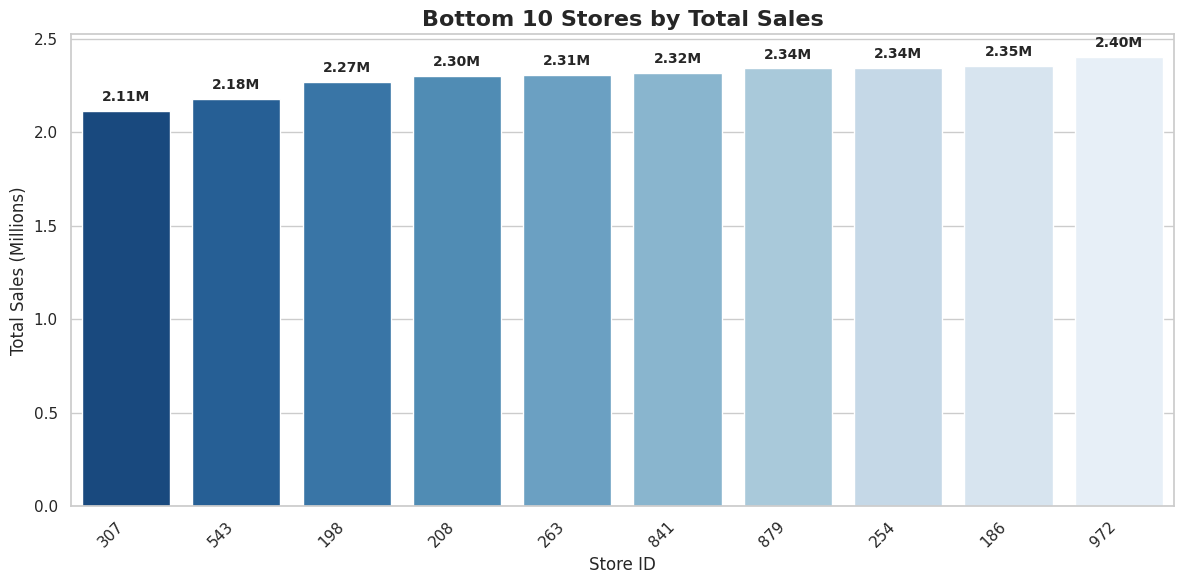

In [150]:
# Chart - 39 Vizualisation Code

# Features Used - Store, Sales

# ✅ Why this chart is important to include?
# This chart is showing the weakest revenue-generating stores so I can pinpoint
# locations that need operational, assortment, or marketing fixes.
# By placing store ID on the x-axis and sales on the y-axis I am making the ranking
# easy to read left-to-right and directly comparable to the Top 10 chart.

# ---------------------------------------------------------------------------------------------------------- #

# Aggregating total sales per store and selecting bottom 10
bottom10 = (
    df.groupby('Store', as_index=False)['Sales']
      .sum()
      .sort_values('Sales', ascending=True)
      .head(10)
)

# Converting Store to string to ensure clean x-axis labels and resetting order
bottom10['Store'] = bottom10['Store'].astype(str)
bottom10 = bottom10.reset_index(drop=True)

# Scaling sales to millions for readable axis ticks
bottom10['Sales_Million'] = bottom10['Sales'] / 1_000_000

# Setting visual style consistent with project
sns.set(style='whitegrid')

# Creating the figure (vertical bars)
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=bottom10,
    x='Store',
    y='Sales_Million',
    palette='Blues_r'
)

# Adding title and axis labels
plt.title('Bottom 10 Stores by Total Sales', fontsize=16, fontweight='bold')
plt.xlabel('Store ID', fontsize=12)
plt.ylabel('Total Sales (Millions)', fontsize=12)

# Rotating x labels for readability
plt.xticks(rotation=45, ha='right')

# Annotating each bar with the scaled sales value (safe offset: 1.5% of max)
max_m = bottom10['Sales_Million'].max()
y_offset = max_m * 0.015

for i, row in bottom10.iterrows():
    ax.text(
        i,                                 # x-position (bar index)
        row['Sales_Million'] + y_offset,   # y-position (just above bar)
        f"{row['Sales_Million']:.2f}M",    # annotation text
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='semibold'
    )

# Tight layout and show
plt.tight_layout()
plt.show()

**Summary -**

* This chart highlights the bottom 10 stores in terms of total revenue.

* Their total sales range roughly between 2.11M and 2.40M, which is significantly lower than average-performing stores.

* These stores consistently underperform across the entire dataset, indicating potential operational, demographic, or competitive issues.

* This helps me identify locations that may need urgent attention, such as marketing reinforcement, assortment changes, or better store management.

###### 1. Why did you pick the specific chart?

* I chose a vertical bar chart because it gives a very clear picture of which stores are performing the worst in terms of total revenue.

* Since store-level performance is extremely important in retail analytics, plotting each store ID on the x-axis and its aggregated sales on the y-axis helps me easily spot the weakest performers.

* This also creates a direct comparison with the Top 10 stores chart, making it easier to highlight the gap between high- and low-performing outlets.

###### 2. What is/are the insight(s) found from the chart?

* These 10 stores — including IDs 307, 543, 198, 208, 263, 841, 879, 254, 186, and 972 — have the lowest cumulative sales among all stores.

* Their total sales range from 2.11M to 2.40M, which is noticeably lower compared to the overall store distribution.

* The fact that the gap is relatively narrow suggests that these stores consistently perform poorly and never experience strong peak periods.

* This may signal:

    * Weak store location (low footfall area)

    * High competitor presence nearby

    * Ineffective assortment or store size

    * Poor promotion execution

    * Customer base limitations (e.g., rural/low-income area)

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impact :**

* Identifying the bottom stores allows me to target interventions instead of wasting effort on stores that are already performing well.

* These stores are prime candidates for:

    * Localized marketing or promotional campaigns

    * Optimizing product assortment based on demand

    * Re-evaluating store layout, staffing, or operations

* Introducing promotional strategies that worked well for high-performing stores


* If I improve even a few of these low-performing stores, the aggregate business uplift can be significant because these stores currently contribute very little to total revenue.


**Negative-growth risk signals:**

* If these stores are left unattended, they may drag down overall regional performance.

* Chronic underperformance could signal deeper structural issues like poor store placement or low local demand.

* Repeatedly low sales may cause inventory stagnation, increasing storage and operational costs.

* If competitor stores are located closer or offer stronger promotions, these stores may continue losing footfall, creating a long-term negative trend.

##### Chart 40 - Top 10 Stores by Customers

In [192]:
# Chart - 40 Visualisation Code

# Features Used - Store, Customers

# ✅ Why this chart is important to include?
# This chart is showing me which stores attract the highest number of customers.
# While sales give revenue insights, customer footfall reflects true store popularity.
# Identifying top customer-heavy stores helps in planning staffing, inventory,
# and understanding which locations consistently draw in more people.

# ---------------------------------------------------------------------------------------------------------- #

# Aggregating total customers per store and selecting the top 10 stores
top10_customers = (
    df.groupby('Store', as_index=False)['Customers']
      .sum()
      .sort_values('Customers', ascending=False)
      .head(10)
)

# Converting store IDs to string for clean x-axis labeling
top10_customers['Store'] = top10_customers['Store'].astype(str)

# Scaling total customers to thousands for cleaner plotting
top10_customers['Customers_K'] = top10_customers['Customers'] / 1_000

# Setting consistent visual style
sns.set(style='whitegrid')

# Creating the figure for vertical bar chart
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=top10_customers,
    x='Store',
    y='Customers_K',
    palette='Greens_d'
)

# Adding the title and labels
plt.title('Top 10 Stores by Total Customers', fontsize=16, fontweight='bold')
plt.xlabel('Store ID', fontsize=12)
plt.ylabel('Total Customers (in Thousands)', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Annotating values above each bar safely (1.5% offset)
max_val = top10_customers['Customers_K'].max()
y_offset = max_val * 0.015

for index, row in top10_customers.iterrows():
    plt.text(
        index,
        row['Customers_K'] + y_offset,
        f"{row['Customers_K']:.1f}K",
        ha='center',
        fontsize=10,
        fontweight='semibold'
    )

# Final layout adjustments
plt.tight_layout()
plt.show()

**Summary -**

* The top 10 stores by customer footfall receive between 1.9K to 3.2K thousand customers in total.

* Stores 733, 262, 562, and 769 lead the list with the highest footfall, showing consistently high customer attraction.

* Stores like 251 and 259, although in the top 10 for customers, appear much lower when we compare them against the top 10 stores by sales.

* Comparing footfall and sales reveals that some stores convert high customer visits into strong revenue (e.g., 262, 562, 1114, 817) while others underperform in sales despite high footfall — which highlights conversion efficiency differences.

###### 1. Why did you pick the specific chart?

* I included this chart because customer footfall is one of the core indicators of store performance. While sales reflect revenue, customer count reflects store popularity, reach, and traffic strength.

* Understanding which stores attract the most customers helps me identify:

    * High-traffic zones

    * Potential flagship or anchor stores

    * Stores that might require higher staffing, more stock, or better operational planning


* It also allows me to compare high-footfall stores with high-sales stores to understand conversion efficiency.

* This chart completes the store-level performance analysis by revealing the demand-side behavior.

###### 2. What is/are the insight(s) found from the chart?

Here are the insights derived by comparing customer footfall with sales performance:

---

🔹 High Footfall + High Sales (Strong Performing Stores)

Stores 262, 562, 1114, 817 appear in both top lists —
* They attract a lot of customers and convert that traffic into strong sales.

* These are your “star performers” and likely have:

    * Good location

    * Effective promotions

    * Strong assortment mix

    * Higher store size or wider product variety


    * These stores are important benchmarks.


---

🔹 High Footfall + Moderate Sales (Low Conversion Stores)

* Stores like 733 and 769 rank high in customer footfall but do NOT appear in the top 10 sales list.
This means:

* These stores are getting customers but not converting visits into purchases effectively.

* Possible reasons:

    * Poor assortment relevance

    * More window shoppers than actual buyers

    * Pricing mismatch

    * Strong competition nearby

    * Smaller basket size per customer


* These stores need conversion-focused interventions.


---

🔹 Lower Footfall in Top 10 Sales (High Efficiency Stores)

* Stores like 513, 788, 383, 756 appear in top sales but NOT in top customers.

* This means:

    * These stores have high spending per customer

    * Strong conversion efficiency

    * Likely located in areas with fewer but higher-value customers

    * May benefit from premium assortment or brand loyalty


* Understanding this pattern is extremely useful for targeted strategies.

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impact / what can be done:**

* The analysis helps identify high-traffic stores that deserve more inventory, more staff, or better promotional support to maximize revenue.

* Stores with high customers but low sales (like 733 or 769) can be targeted with strategies to improve conversion such as:

    * Localized promotions

    * Better merchandising

    * Cross-selling and up-selling

    * Correcting assortment gaps


* Stores with low footfall but high sales efficiency provide insights into premium behavior and can be used as models for strategic replication.

* Retail teams can use this to plan store expansions, renovations, and resource allocation.



---

**Negative-growth signals / risks identified:**

* High customer stores with poor conversion represent missed revenue potential — this can directly impact profitability.

* If stores are attracting traffic but not generating comparable sales, the retailer is carrying unnecessary operational costs without maximizing revenue.

* Persistent low conversion may indicate deeper issues such as competition, poor store layout, or ineffective assortment alignment — all of which could lead to long-term revenue decline if not addressed.


##### Chart 41 - Top 10 Stores by Conversion Rate

In [152]:
# Chart - 41 Visualisation Code

# Features Used - Store, SalesPerCustomer

# ✅ Why this chart is important to include?
# This chart is showing me which stores convert their customer footfall into actual revenue most effectively.
# A store might not have the highest number of customers, but still generate high revenue due to a strong conversion rate.
# Identifying such stores helps reveal operational excellence and premium customer behaviour.

# ---------------------------------------------------------------------------------------------------------- #

# Creating conversion rate metric: Total Sales / Total Customers per store
conversion_df = (
    df.groupby('Store', as_index=False)
      .agg({'Sales': 'sum', 'Customers': 'sum'})
)

# Avoiding division errors
conversion_df = conversion_df[conversion_df['Customers'] > 0]

# Calculating conversion rate
conversion_df['ConversionRate'] = conversion_df['Sales'] / conversion_df['Customers']

# Selecting top 10 stores by conversion rate
top10_conversion = (
    conversion_df.sort_values('ConversionRate', ascending=False)
                 .head(10)
)

# Converting store IDs to string for cleaner labeling
top10_conversion['Store'] = top10_conversion['Store'].astype(str)

# Setting plot style
sns.set(style='whitegrid')

# Creating the figure
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=top10_conversion,
    x='Store',
    y='ConversionRate',
    palette='Blues_d'
)

# Adding titles and labels
plt.title('Top 10 Stores by Conversion Rate (Sales per Customer)', fontsize=16, fontweight='bold')
plt.xlabel('Store ID', fontsize=12)
plt.ylabel('Conversion Rate (Sales ÷ Customers)', fontsize=12)

# Rotating x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Annotating values above each bar
max_val = top10_conversion['ConversionRate'].max()
y_offset = max_val * 0.03

for index, row in top10_conversion.iterrows():
    plt.text(
        index,
        row['ConversionRate'] + y_offset,
        f"{row['ConversionRate']:.2f}",
        ha='center',
        fontsize=10,
        fontweight='semibold'
    )

# Tight layout for cleaner appearance
plt.tight_layout()

# Displaying the plot
plt.show()

**Summary -**

* The top 10 stores with the highest conversion rate (Sales ÷ Customers) fall in the range of 14.3 to 16.3, which means these stores generate exceptionally high revenue per customer visit.

* Stores 842, 612, 455, and 158 lead the list, achieving conversion rates above 15, indicating strong sales efficiency.

* Many of these stores do not appear in the top 10 sales or top 10 customer traffic charts, showing that despite having moderate footfall, they excel at converting customers into buyers.

* These stores represent high-efficiency units, likely serving premium customers, offering high-value assortments, or having more effective sales execution.

###### 1. Why did you pick the specific chart?

* I included this chart because conversion rate is one of the most meaningful indicators of store-level efficiency.

* While earlier charts helped identify high-traffic stores or high-revenue stores, this chart shows which stores generate the most revenue per customer.

* A store might get fewer customers, but if each visitor buys more or buys higher-value items, the store becomes extremely profitable. This chart helps me detect such high-efficiency stores that were not obvious from the sales or customer charts alone.

###### 2. What is/are the insight(s) found from the chart?

Here are the key insights based on the output:

---

🔹 1. High-conversion stores are not always high-traffic or high-sales stores

* Most of these stores — including 842, 612, 455, 158, 52, and 540 — do not appear in the top 10 sales chart or the top 10 customer chart.
This means:

    * These stores have leaner traffic

    * But each customer is spending significantly more

    * They are efficient, high-value stores


---


🔹 2. These stores likely serve premium or high-spending customers

* A conversion rate above 15 means that for every customer visiting the store, the store is generating 15 units of revenue. That's a very strong metric and often reflects:

    * Higher spending patterns

    * Better assortment matching customer needs

    * Strong loyalty or repeat purchases

---

🔹 3. These stores may be executing merchandising and sales strategies more effectively

* Stores like 842 and 612 show exceptional performance even without high footfall.
This indicates:

    * Well-curated product displays

    * Effective pricing

    * Better staff engagement

    * Good promotional strategy at store level

---

🔹 4. These stores should be studied for “best practices”

* The strategies used in these high-efficiency stores can be replicated in stores that have high footfall but poor conversion.


###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**✅ Positive Business Impact :**

* These insights help identify top-performing stores from an efficiency perspective, not just from traffic or revenue.

* Store managers can study the practices at these stores — assortment choices, local preferences, store layout, pricing strategy, staff behavior — to apply them to weaker stores.

* By improving conversion even slightly in high-traffic stores, Rossmann can achieve a massive uplift in overall revenue.

* Corporate teams can use this insight for resource prioritization, such as allocating better products or premium brands to these high-efficiency stores.


**⚠️ Negative-Growth Risks Identified -**

* If low-conversion stores are ignored, they will continue to underperform despite heavy footfall, leading to lost revenue potential.

* These findings also highlight that Rossmann may be misallocating promotional budgets if high-efficiency stores are overlooked.

* Poor-performing stores may continue draining operational resources if effective conversion strategies are not adopted.

##### Chart 42 -

In [193]:
# Chart - 42 Visualisation Code


**Summary -**


###### 1. Why did you pick the specific chart?

###### 2. What is/are the insight(s) found from the chart?

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**✅ Positive Business Impact :**




**⚠️ Negative-Growth Risks Identified -**


##### Chart 42 -

In [ ]:
# Chart - 42 Visualisation Code


**Summary -**


###### 1. Why did you pick the specific chart?

###### 2. What is/are the insight(s) found from the chart?

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**✅ Positive Business Impact :**




**⚠️ Negative-Growth Risks Identified -**


##### Chart 42 -

In [ ]:
# Chart - 42 Visualisation Code


**Summary -**


###### 1. Why did you pick the specific chart?

###### 2. What is/are the insight(s) found from the chart?

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**✅ Positive Business Impact :**




**⚠️ Negative-Growth Risks Identified -**


##### Chart 42 -

In [ ]:
# Chart - 42 Visualisation Code


**Summary -**


###### 1. Why did you pick the specific chart?

###### 2. What is/are the insight(s) found from the chart?

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**✅ Positive Business Impact :**




**⚠️ Negative-Growth Risks Identified -**


##### Chart 42 -

In [ ]:
# Chart - 42 Visualisation Code


**Summary -**


###### 1. Why did you pick the specific chart?

###### 2. What is/are the insight(s) found from the chart?

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**✅ Positive Business Impact :**




**⚠️ Negative-Growth Risks Identified -**


##### Chart 42 -

In [ ]:
# Chart - 42 Visualisation Code


**Summary -**


###### 1. Why did you pick the specific chart?

###### 2. What is/are the insight(s) found from the chart?

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**✅ Positive Business Impact :**




**⚠️ Negative-Growth Risks Identified -**


##### Chart 42 -

In [ ]:
# Chart - 42 Visualisation Code


**Summary -**


###### 1. Why did you pick the specific chart?

###### 2. What is/are the insight(s) found from the chart?

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**✅ Positive Business Impact :**




**⚠️ Negative-Growth Risks Identified -**


##### Chart 42 -

In [ ]:
# Chart - 42 Visualisation Code


**Summary -**


###### 1. Why did you pick the specific chart?

###### 2. What is/are the insight(s) found from the chart?

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**✅ Positive Business Impact :**




**⚠️ Negative-Growth Risks Identified -**


##### Chart 42 -

In [ ]:
# Chart - 42 Visualisation Code


**Summary -**


###### 1. Why did you pick the specific chart?

###### 2. What is/are the insight(s) found from the chart?

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**✅ Positive Business Impact :**




**⚠️ Negative-Growth Risks Identified -**


##### Chart 42 -

In [ ]:
# Chart - 42 Visualisation Code


**Summary -**


###### 1. Why did you pick the specific chart?

###### 2. What is/are the insight(s) found from the chart?

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**✅ Positive Business Impact :**




**⚠️ Negative-Growth Risks Identified -**


##### Chart 42 -

In [ ]:
# Chart - 42 Visualisation Code


**Summary -**


###### 1. Why did you pick the specific chart?

###### 2. What is/are the insight(s) found from the chart?

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**✅ Positive Business Impact :**




**⚠️ Negative-Growth Risks Identified -**


### **Multivariate Analysis**

#### Chart - 14 - Correlation Heatmap

In [153]:
# Correlation Heatmap visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [154]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [155]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [156]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [157]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [158]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [159]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [160]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [161]:
# Expand Contraction

#### 2. Lower Casing

In [162]:
# Lower Casing

#### 3. Removing Punctuations

In [163]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [164]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [165]:
# Remove Stopwords

In [166]:
# Remove White spaces

#### 6. Rephrase Text

In [167]:
# Rephrase Text

#### 7. Tokenization

In [168]:
# Tokenization

#### 8. Text Normalization

In [169]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [170]:
# POS Taging

#### 10. Text Vectorization

In [171]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [172]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [173]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [174]:
# Transform Your data

### 6. Data Scaling

In [175]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [176]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [177]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [178]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [179]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [180]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [181]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [182]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [183]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [184]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [185]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [186]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [187]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [188]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***